In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns #!!!! sorry but I modified my exts-ml environment by installing seaborn 0.11... hope it won't cause trouble :-)
import random
import os
import re
%matplotlib inline

# TASK A. : Importing and cleaning the dataset

Link to description of all data fields:
  https://static.openfoodfacts.org/data/data-fields.txt

In [2]:
file_path= os.path.join('.','Data', 'en.openfoodfacts.org.products.tsv')
file_path

'.\\Data\\en.openfoodfacts.org.products.tsv'

In [3]:
first_df = pd.read_csv(file_path, sep='\t', low_memory=False)  #changing low_memory argument parses better

In [4]:
pd.set_option('display.max_columns', None) #want to be able to visualize all columns by scrolling
first_df.head(5)

code                                                url  \
0  0000000003087  http://world-en.openfoodfacts.org/product/0000...   
1  0000000004530  http://world-en.openfoodfacts.org/product/0000...   
2  0000000004559  http://world-en.openfoodfacts.org/product/0000...   
3  0000000016087  http://world-en.openfoodfacts.org/product/0000...   
4  0000000016094  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   
2          NaN      NaN       NaN            NaN   Torn & Glasser   
3          NaN      NaN       NaN            NaN        Grizzlies   
4          NaN      NaN       NaN            NaN   Bob's Red Mill   

       brands_tags categories categories_tags categories_en origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   
2     torn-glasser        NaN             NaN           NaN     NaN   
3        grizzlies        NaN             NaN           NaN     NaN   
4   bob-s-red-mill        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   
2          NaN                  NaN                       NaN    NaN   
3          NaN                  NaN                       NaN    NaN   
4          NaN                  NaN                       NaN    NaN   

  labels_tags labels_en emb_codes emb_codes_tags first_packaging_code_geo  \
0         NaN       NaN       NaN            NaN                      NaN   
1         NaN       NaN       NaN            NaN                      NaN   
2         NaN       NaN       NaN            NaN                      NaN   
3         NaN       NaN       NaN            NaN                      NaN   
4         NaN       NaN       NaN            NaN                      NaN   

  cities cities_tags purchase_places stores countries    countries_tags  \
0    NaN         NaN             NaN    NaN     en:FR         en:france   
1    NaN         NaN             NaN    NaN        US  en:united-states   
2    NaN         NaN             NaN    NaN        US  en:united-states   
3    NaN         NaN             NaN    NaN        US  en:united-states   
4    NaN         NaN             NaN    NaN        US  en:united-states   

    countries_en                                   ingredients_text allergens  \
0         France                                                NaN       NaN   
1  United States  Bananas, vegetable oil (coconut oil, corn oil ...       NaN   
2  United States  Peanuts, wheat flour, sugar, rice flour, tapio...       NaN   
3  United States  Organic hazelnuts, organic cashews, organic wa...       NaN   
4  United States                                    Organic polenta       NaN   

  allergens_en traces traces_tags traces_en     s

In [6]:
first_df.shape #consistent with https://www.kaggle.com/openfoodfacts/world-food-facts

(356027, 163)

## Missing values and duplicates:

### NaNs and duplicates along **rows**


In [7]:
first_df.dropna(how='all', inplace=True)
first_df.shape #no, there are no rows that are 100% NaN.

(356027, 163)

In [8]:
first_df.duplicated().sum() # no, there are no completely duplicated rows

0

### NaNs in each **column**


Just browsing the dataset, the number of NaNs is striking; it looks like some nutrition facts concern "rare ingredients" that haven't been measured/reported in that many cases.

--> **create a dictionary of the number of NaNs per column** (there are probably easier ways to do this, but I happened to be reading about how fantastic and useful Python dictionaries can be, so I wanted to learn to use them... :-) :-) :-) :-))

In [9]:
na_dict={}
for column in first_df.columns:
    nas = first_df[column].isnull().sum() #!!! careful!! this will highlight NaNs, but not cells containing inadequate data! 
    na_dict[column] = nas   

In [10]:
df_nans = pd.DataFrame(na_dict.items(), columns=['Column', 'Nber of NaNs'])
df_nans.sort_values(by='Nber of NaNs', ascending=False)

Column  Nber of NaNs
162                      water-hardness_100g        356027
52                        nutrition_grade_uk        356027
98                       -nervonic-acid_100g        356027
97                         -erucic-acid_100g        356027
96                           -mead-acid_100g        356027
94                        -elaidic-acid_100g        356027
67                        -butyric-acid_100g        356027
68                        -caproic-acid_100g        356027
41                             no_nutriments        356027
47                 ingredients_from_palm_oil        356027
50     ingredients_that_may_be_from_palm_oil        356027
77                     -lignoceric-acid_100g        356027
78                        -cerotic-acid_100g        356027
157                          chlorophyl_100g        356027
80                       -melissic-acid_100g        356027
161                      glycemic-index_100g        356027
73                       -palmitic-acid_100g        356026
74                        -stearic-acid_100g        356026
69                       -caprylic-acid_100g        356026
79                       -montanic-acid_100g        356026
72                       -myristic-acid_100g        356026
70                         -capric-acid_100g        356025
71                         -lauric-acid_100g        356023
107                            -maltose_100g        356021
115                         nucleotides_100g        356018
89                    -arachidonic-acid_100g        356018
108                      -maltodextrins_100g        356016
93                          -oleic-acid_100g        356012
95                        -gondoic-acid_100g        356011
114                      serum-proteins_100g        356010
..                                       ...           ...
160                  nutrition-score-uk_100g        101171
66                        saturated-fat_100g         92204
102                              sugars_100g         76841
101                       carbohydrates_100g         76807
65                                  fat_100g         76530
43                                 additives         72202
42                               additives_n         72160
46               ingredients_from_palm_oil_n         72160
49   ingredients_that_may_be_from_palm_oil_n         72160
34                          ingredients_text         72134
117                              sodium_100g         66333
116                                salt_100g         66288
112                            proteins_100g         61866
63                               energy_100g         60660
13                               brands_tags         29070
12                                    brands         29050
7                               product_name         17512
31                                 countries           275
33                              countries_en           275
32                            countries_tags           275
58                                 states_en            52
57                               states_tags            52
56                                    states            52
1                                        url            26
0                                       code            26
4                           created_datetime            10
3                                  created_t             3
2                                    creator             3
6                     last_modified_datetime             0
5                            last_modified_t             0

[163 rows x 2 columns]

**This `na_dict` highlights that there are many columns lacking data entirely.**

-- > these empty columns can be dropped directly with `dropna()`

In [11]:
first_df.dropna(axis=1, how='all', inplace=True)
first_df.shape

(356027, 147)

I believe we can **further remove columns with mostly NaN values**, cuz they're not going to yield anything statistically usable.
(The highly scientific rationale for choosing the threshold of 1000 non-null values (~ 0.3% of the raw data) used below is: given the large number of variables in this dataset, would I even bother to look at a variable with less than 1000 values...? :-) :-) :-) I know, it is quite arbitrary :-).


In [12]:
maxrow = first_df.shape[0]
for column in first_df.columns:
    if (maxrow - first_df[column].isnull().sum()) <=1000:
        first_df.drop(columns = column, inplace=True)
first_df.shape        

(356027, 96)

--> "Column cleaning" based on number of NaN values yields a df with 96 columns (instead of 163).
Let's drop some more columns we're not going to use: see `col_to_clean` list below.

In [13]:
cols_to_clean = ['pnns_groups_1', 
                 'pnns_groups_2', 
                 'image_url', 
                 'image_small_url',  
                 'emb_codes', 
                 'emb_codes_tags', 
                 'first_packaging_code_geo', 
                 'cities_tags',
                 'purchase_places', 
                 'stores'
                ]
first_df.drop(columns = cols_to_clean, inplace=True)
first_df.shape

(356027, 86)

### **NaN values** in remaining columns: keep, replace, delete..?

- For text (object) variables: NaN could be replaced with empty string, but it doesn't help much at this stage *(just keep in mind that "NaN" can appear as a value in a list of `unique()` values :-) ).*
- For numerical `nr_of_smth_n` or `nutrient_100g` variables: I decided **not** to systematically remove or replace NaN with 0, simply because especially for nutrition values, **NaN cannot be taken to be zero by default**. The absence of value most likely means that the variable simply hasn't been measured, so inferring that value=0 would in most cases completely skew the data.

*--> deal with NaNs in each specific case (as they're conveniently ignored by `describe()` or plotting functions, they don't interfere with EDA)*


## **Data types:** _have the columns been parsed properly?_

In [14]:
first_df.info() #the number of "non-null objects" for each variable completes/confirms the NaN analysis above

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356027 entries, 0 to 356026
Data columns (total 86 columns):
code                                          356001 non-null object
url                                           356001 non-null object
creator                                       356024 non-null object
created_t                                     356024 non-null object
created_datetime                              356017 non-null object
last_modified_t                               356027 non-null object
last_modified_datetime                        356027 non-null object
product_name                                  338515 non-null object
generic_name                                  57714 non-null object
quantity                                      119285 non-null object
packaging                                     89959 non-null object
packaging_tags                                89959 non-null object
brands                                        326977 non-null ob

**dtypes mostly correspond to data, except a few "details":**
- `code` is supposed to correspond to bar code (EAN) of products, and should have been numerical integer instead of object... to be investigated (see below)
- all nutritional values` _100g` are numerical floats64 values, which is perfectly expected
- columns with `_n` (number of ingredients, additives, etc), as well as nutrition-score columns, should be integers rather than floats... (but that's not the end of the world, as they're not categorical variables)
- `_datetime` and Unix date `_t` columns: they should obviously not be strings (object) ---> dealt with separately in **Task D**

I tried to convert some float64 columns to int with a dictionary, but I learned that *it doesn't work because NaNs have float dtype, and NaNs cannot be converted to int*. :-)

`first_df = first_df.astype({'additives_n':'int', 
                            'ingredients_from_palm_oil_n':'int',
                            'ingredients_that_may_be_from_palm_oil_n':'int',
                            'nutrition-score-fr_100g':'int',
                            'nutrition-score-uk_100g':'int'})
`

This has no impact on later calculations, as NaNs are ignored in `describe()` etc.

## **`code` variable:** is it a unique key?

- so far the variable is not numeric... should it be converted to numeric? Are all entries in the column strings of numbers?
- are the `code` values unique ? I suspect we might run into problems with leading zeros for example.


In [15]:
first_df['code'].isnull().sum() #26
first_df['code'].str.match('[0-9]+').sum() # 356001 so that means that apart from NaN values, all values in this column are strings of digits!

356001

In [16]:
first_df['code'].str.len().min() #result 2
first_df['code'].str.len().max() #result 40 ==> so the length range of code strings is 2-40 --> which creates problems when converting to int! (I think :-) ) .

40.0

In [17]:
len(first_df.code.unique()) #that's 365001 different strings of digits + NaN = 365002

356002

In [18]:
code_to_numeric = first_df['code'].astype(float)
#code_to_numeric = pd.to_numeric(first_df['code'])  This doesn't work, error: "Integer out of range. at position 112010"

In [19]:
len(code_to_numeric.unique()) # 355818: that's less than when code=character string! ..due to leading zeros?

355818

In [20]:
code_to_numeric.duplicated().sum() #tot 209
dupl_idx = code_to_numeric[code_to_numeric.duplicated(keep=False)].index #with keep=False so that we can see all the entries
first_df['num_code'] = code_to_numeric
first_df.iloc[dupl_idx, :].sort_values(by='num_code') #to have a closer look "side by side" at entries with same code: errors? true duplicates?

code                                                url  \
470           00011778  http://world-en.openfoodfacts.org/product/0001...   
9953           0011778  http://world-en.openfoodfacts.org/product/0011...   
6        0000000016117  http://world-en.openfoodfacts.org/product/0000...   
498           00016117  http://world-en.openfoodfacts.org/product/0001...   
540           00024600  http://world-en.openfoodfacts.org/product/0002...   
47       0000000024600  http://world-en.openfoodfacts.org/product/0000...   
64       0000000031233  http://world-en.openfoodfacts.org/product/0000...   
588           00031233  http://world-en.openfoodfacts.org/product/0003...   
157      0000000058001  http://world-en.openfoodfacts.org/product/0000...   
666           00058001  http://world-en.openfoodfacts.org/product/0005...   
112008         0104456  http://world-en.openfoodfacts.org/product/0104...   
1621          00104456  http://world-en.openfoodfacts.org/product/0010...   
112465         0129725  http://world-en.openfoodfacts.org/product/0129...   
10661         00129725  http://world-en.openfoodfacts.org/product/0012...   
121646         0635646  http://world-en.openfoodfacts.org/product/0635...   
67935         00635646  http://world-en.openfoodfacts.org/product/0063...   
178      0000000673358  http://world-en.openfoodfacts.org/product/0000...   
68706         00673358  http://world-en.openfoodfacts.org/product/0067...   
313180          689243   http://world-en.openfoodfacts.org/product/689243   
68900         00689243  http://world-en.openfoodfacts.org/product/0068...   
136360         0722810  http://world-en.openfoodfacts.org/product/0722...   
80725         00722810  http://world-en.openfoodfacts.org/product/0072...   
102391        00837996  http://world-en.openfoodfacts.org/product/0083...   
157256         0837996  http://world-en.openfoodfacts.org/product/0837...   
173269         0888707  http://world-en.openfoodfacts.org/product/0888...   
107003        00888707  http://world-en.openfoodfacts.org/product/0088...   
353594          929806  http://world-en.openfoodfacts.org/product/9298...   
108741        00929806  http://world-en.openfoodfacts.org/product/0092...   
110619        00988639  http://world-en.openfoodfacts.org/product/0098...   
356009          988639   http://world-en.openfoodfacts.org/product/988639   
...                ...                                                ...   
296470   5010225001503  http://world-en.openfoodfacts.org/product/5010...   
117615  05010225001503  http://world-en.openfoodfacts.org/product/0501...   
117828  05400141350470  http://world-en.openfoodfacts.org/product/0540...   
303982   5400141350470  http://world-en.openfoodfacts.org/product/5400...   
193908             NaN                                                NaN   
193944             NaN                                                NaN   
193950             NaN                                                NaN   
193960             NaN                                                NaN   
193993             NaN                                                NaN   
194001             NaN                                                NaN   
194003             NaN                                                NaN   
194009             NaN                                                NaN   
194055             NaN                                                NaN   
194084             NaN                                                NaN   
194086             NaN                                                NaN   
194090             NaN                                                NaN   
194092             NaN                                                NaN   
194102             NaN                                                NaN   
194104             NaN                                                NaN   
194111             NaN                                                NaN   
194114        

**Results from analyzing `code` column:**

- yes duplicate `code` values are due to different number of leading zeros in string format
- but duplicates are not just rows (partly) duplicated by mistake: `code` really corresponds to bar code and some products have been entered in different countries
  --> so I decided to **keep the duplicates**, because of the `country` category :-) (some of the duplicated products lack a product name or have it in a different place.. tbc)
- we can definitely drop the last rows with NaN in `code` column: they're all French entries with mostly empty/wrongly entered data :-) 
- after that we can drop the `code` variable (since we have `num_code` instead)
- we should also **keep the `num_code` column**, because we can later use it as a **unique key** together with `product_name` (where available and after removing duplicates)

In [21]:
first_df.drop(first_df[first_df['code'].isnull()].index, axis=0, inplace=True) #removing the series of 26 rows with code = NaN
first_df.drop(columns=['code'], inplace=True)
first_df.shape

(356001, 86)

## **`url`** variable: are the values unique?
*(one would expect one url per bar code...? since that's how products can be unequivocally found on the /world-en.openfoodfacts.org website)*

In [22]:
url_regex = 'http://world-en.openfoodfacts.org/product/'
first_df.url.str.contains(url_regex).sum()  #they're all openfoodfacts.org weblinks

356001

In [23]:
len(first_df.url.unique())  #yes they're unique! 356001 values

356001

**This shows that:**

- all entries in `url` column are hyperlinks to openfoodfacts.org website
- the `url` variable has **unique** values, despite duplicates in bar codes *(due to last part of url, after product code there is sometimes also text from product description)*

--> they could be used as a key

## **`creator` variable:** have db contributor names been consistently entered so that we could use them as category?

- check how many unique creators there are
- sort them to check for possible typos that would unnecessarily increase number of unique values

In [24]:
first_df.creator = first_df.creator.str.lower()
len(first_df.creator.unique()) #3889 unique values
first_df.sort_values(by='creator')
creator_df = pd.DataFrame(first_df.creator.value_counts())
creator_df['percent'] = pd.DataFrame(first_df.creator.value_counts(normalize=True)*100)
creator_df

creator    percent
usda-ndb-import              169868  47.715998
openfoodfacts-contributors    45805  12.866645
kiliweb                       36379  10.218878
date-limite-app               12679   3.561537
openfood-ch-import            11469   3.221647
tacite                         7918   2.224170
sebleouf                       6444   1.810123
tacinte                        4809   1.350850
javichu                        2768   0.777532
stephane                       2760   0.775285
teolemon                       2455   0.689611
agamitsudo                     2180   0.612363
twoflower                      1981   0.556464
jeanbono                       1879   0.527812
foodorigins                    1763   0.495228
segundo                        1546   0.434272
miles67off                     1425   0.400283
kyzh                           1202   0.337642
kakao                          1059   0.297474
bleakpatch                     1048   0.294384
aleene                         1039   0.291856
phoenix                         939   0.263766
bcatelin                        871   0.244664
hangy                           871   0.244664
jacob80                         683   0.191855
anticultist                     621   0.174439
neptuno                         600   0.168540
andre                           581   0.163203
beniben                         501   0.140731
smias                           476   0.133709
...                             ...        ...
ellemra                           1   0.000281
franck-auffray                    1   0.000281
mygrenouille                      1   0.000281
rooibox                           1   0.000281
guyomar                           1   0.000281
alena42                           1   0.000281
lepetitkorrigan                   1   0.000281
shirow                            1   0.000281
picoche                           1   0.000281
zaza222                           1   0.000281
eockben                           1   0.000281
robopetr                          1   0.000281
thiamath                          1   0.000281
bazinovitch                       1   0.000281
malia                             1   0.000281
raarts                            1   0.000281
genducap                          1   0.000281
paulrink                          1   0.000281
peccher                           1   0.000281
zyll26                            1   0.000281
tomadeb                           1   0.000281
richardremek                      1   0.000281
gtquang                           1   0.000281
absolutrnr                        1   0.000281
camrub06                          1   0.000281
king1988                          1   0.000281
gatto                             1   0.000281
ghenadie58                        1   0.000281
rowin                             1   0.000281
tomtomp                           1   0.000281

[3888 rows x 2 columns]

In [25]:
creator_df['percent'][:3].sum()

70.80152135686156

In [26]:
(creator_df['creator']==1).sum() #that's 1799 rows = half of the contributors!

1799

This means that there are a few big contributors (see `creator_df` above), responsible for populating most of the db.

The **top 3, representing 71% of data**:
1. usda-ndb-import
2. openfoodfacts-contributors
3. kiliweb

And then there are lots of small contributors with sometimes "creative" names :-)

**!!About 50% of the unique `creator` entries are from contributors that have only contributed once** (I could however not spot an example of systematic misspelling that would have required correction).
- We could create a database of `creator`s.
- **we'll use `creator` in Task D**

## **The `countries` variables:**

*Can we later use them to group foods by which country they're sold in?*

In [27]:
countr_cols = first_df.columns[first_df.columns.str.contains('countr')]
first_df.loc[:,countr_cols].sample(200) #to understand what these countries columns contain, and how they might differ

countries     countries_tags    countries_en
79783               US   en:united-states   United States
41592               US   en:united-states   United States
335143  United Kingdom  en:united-kingdom  United Kingdom
282575          Suisse     en:switzerland     Switzerland
210732          France          en:france          France
234264          France          en:france          France
198093          France          en:france          France
287020          Suisse     en:switzerland     Switzerland
200528          France          en:france          France
185517       Australia       en:australia       Australia
321189          France          en:france          France
208629          France          en:france          France
98289               US   en:united-states   United States
14704               US   en:united-states   United States
198564          France          en:france          France
175477              US   en:united-states   United States
121751              US   en:united-states   United States
223897          France          en:france          France
267044          France          en:france          France
327562          Suisse     en:switzerland     Switzerland
146348           en:FR          en:france          France
37276               US   en:united-states   United States
16777            en:FR          en:france          France
18655               US   en:united-states   United States
343821           en:FR          en:france          France
348898           en:NL     en:netherlands     Netherlands
355658      Madagascar      en:madagascar      Madagascar
153126              US   en:united-states   United States
195518          France          en:france          France
15884               US   en:united-states   United States
...                ...                ...             ...
335067          France          en:france          France
311256         Hungary         en:hungary         Hungary
322958           en:FR          en:france          France
348903          France          en:france          France
169380              US   en:united-states   United States
101923  United Kingdom  en:united-kingdom  United Kingdom
131148              US   en:united-states   United States
353555              US   en:united-states   United States
214000          France          en:france          France
93424               US   en:united-states   United States
176126              US   en:united-states   United States
48982               US   en:united-states   United States
129770              US   en:united-states   United States
88692               US   en:united-states   United States
140271              US   en:united-states   United States
261612          France          en:france          France
241895          France          en:france          France
343140           en:FR          en:france          France
119370              US   en:united-states   United States
270917          France          en:france          France
49566               US   en:united-states   United States
231019          France          en:france          France
276595    en:FR,France          en:france          France
225174          France          en:france          France
74193               US   en:united-states   United States
208410          France          en:france          France
210558          France          en:france          France
48120               US   en:united-states   United States
151553       Australia       en:australia       Australia
317964          Suisse     en:switzerland     Switzerland

[200 rows x 3 columns]

In [28]:
for column in countr_cols:
    print(column + '    ' + 'nber of unique values:' + str(len(first_df[column].unique())) + '   nber of nas:  ' + str(first_df[column].isnull().sum()))

countries    nber of unique values:1632   nber of nas:  275
countries_tags    nber of unique values:779   nber of nas:  275
countries_en    nber of unique values:778   nber of nas:  275


=> these country columns are messy and redundant, looks like the most useful/ consistent one is `countries_en`. (Because all countries seem to be in English and won't need translation).
- What are the `countries_en` values? Single countries or lists?
- Could we use them as is, or do we need to do some editing?
- are the 275 nas in the same samples?

In [29]:
first_df['countries_en'].unique()[:50]

array(['France', 'United States', 'United Kingdom',
       'France,United States', 'Canada', 'Switzerland', 'Spain',
       'Germany', 'Slovenia', 'Bangladesh', 'Italy', 'Romania',
       'Australia', 'Portugal', 'France,United Kingdom',
       'Belgium,France,Netherlands,United Kingdom', 'Guadeloupe',
       'United Kingdom,United States', 'Dominican Republic',
       'Canada,United States', 'Netherlands', 'Australia,France',
       'Canada,France,Switzerland,United States', 'Ireland',
       'France,Réunion', 'Taiwan', 'Australia,Belgium,Switzerland',
       'France,Germany', 'Brazil', 'Belgium,France',
       'Australia,United States', 'Mexico', 'Saudi Arabia',
       'United Arab Emirates', 'Iraq', 'Kuwait', 'Moldova', 'France,Iraq',
       'New Caledonia', nan, 'Singapore', 'Finland',
       'Sweden,United States', 'French Polynesia', 'France,Switzerland',
       'Australia,New Zealand,Singapore,Thailand,United States',
       'France,French Polynesia', 'Panama', 'Costa Rica',
   

 -> while some values are indeed single countries, some are a long string representing a list of countries separated by commas... 
 
 **are these "multi-country" lists loners, or do they represent a lot of the dataset?**

In [30]:
first_df['countries_en'].value_counts(normalize=True)[:50] # which shows that +/- the top 15 values/countries cover more than 95% of the data

United States                 0.486776
France                        0.348473
Switzerland                   0.041976
Germany                       0.023810
Spain                         0.015543
United Kingdom                0.014314
Belgium                       0.008254
Australia                     0.006187
Russia                        0.004447
France,Switzerland            0.004194
Italy                         0.004028
Canada                        0.002735
Belgium,France                0.002134
Portugal                      0.002075
Netherlands                   0.001765
France,United Kingdom         0.001630
Austria                       0.001130
Czech Republic                0.001122
Brazil                        0.001001
Sweden                        0.000959
Japan                         0.000942
France,Germany                0.000914
France,United States          0.000832
Hungary                       0.000815
Serbia                        0.000767
Denmark                  

**This means that the first US + European countries amount to almost 100% of the data; by splitting `country_en` strings at ',' once or twice, we'd have single countries that statistically represent almost all the data** _(and can be used for grouping)_

**!! keep in mind:**
- data represents packaged food, mostly sold in supermarkets
- US and France (+CH to some extent) are the predominant contributors to database, so we're largely comparing these countries 
- this gives a good idea of the translation effort, if needed

In [31]:
first_df[(first_df.countries.isnull() &first_df['countries_tags'].isnull() & first_df['countries_en'].isnull())].shape #so the NaNs in these columns correspond to exactly the same entries

(275, 86)

**The 275 NAs (see above) are in the same entries.**
--> decided to discard them, since most of them also lack product name, ingredients, nutrition values, etc

In [32]:
first_df.drop(first_df[(first_df.countries.isnull() &first_df['countries_tags'].isnull() & first_df['countries_en'].isnull())].index, axis=0, inplace=True)
first_df.shape

(355726, 86)

### Converting the `country_en` variable to single countries (subgroups)

Maybe it's not the most pythonistic way to do this, but here's the rationale for how I decided to convert the `countries_en` values to usable categories for grouping:
- based on the distribution of the `countries_en` values, almost 100% of data is represented by 1-country lists (with a few 2-countries, and then very few 3-countries ones)
--> use str.split with n_splits= 2, and expand = True (I reasoned that more splits would add complexity but hardly any useful information)
- to integrate the 3 expanded columns "on the fly", define new columns with index from expanded split string
- column 0 should never have null values (if we have removed the NaN rows above) and can be used as is for grouping
- but column 1 and 2 will have a lot of None values, although some useful countries for grouping 
--> "fill the values to the right" when there are None values, so that columns 1 and 2 can be used for grouping as well
- columns 0, 1 and 2 (automatically named after expand) should be renamed with a dict to country_1, country_2 and country_3

In [33]:
def split_column (df, col_to_split, nb_splits):
    for i in range(nb_splits+1):
        df[i] = df[col_to_split].str.split(',', n=nb_splits, expand=True)[i]
        df[i] = df[i].str.strip()
    

In [34]:
split_column(first_df, 'countries_en', 2)


In [35]:
#"fill- right" procedure
first_df[1] = np.where(first_df[1].isnull(), first_df[0],first_df[1] )
first_df[2] = np.where(first_df[2].isnull(), first_df[1],first_df[2] ) 

In [36]:
first_df = first_df.drop(columns=countr_cols)
first_df.shape # sounds right, we've dropped 3 cols, but we've created 3 new ones :-)

(355726, 86)

In [37]:
#renaming the country columns that until now were called 0, 1 and 2
countr_dict = {0: 'country_1',
               1: 'country_2',
                2: 'country_3'}
first_df.rename(columns=countr_dict, inplace=True)
first_df.head(2)

url  \
0  http://world-en.openfoodfacts.org/product/0000...   
1  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   

       brands_tags categories categories_tags categories_en origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   

  labels_tags labels_en                                   ingredients_text  \
0         NaN       NaN                                                NaN   
1         NaN       NaN  Bananas, vegetable oil (coconut oil, corn oil ...   

  allergens traces traces_tags traces_en  serving_size  additives_n  \
0       NaN    NaN         NaN       NaN           NaN          NaN   
1       NaN    NaN         NaN       NaN  28 g (1 ONZ)          0.0   

                                           additives additives_tags  \
0                                                NaN            NaN   
1   [ bananas -> en:bananas  ]  [ vegetable-oil -...            NaN   

  additives_en  ingredients_from_palm_oil_n ingredients_from_palm_oil_tags  \
0          NaN                          NaN                            NaN   
1          NaN                          0.0                            NaN   

   ingredients_that_may_be_from_palm_oil_n  \
0                                      NaN   
1                                      0.0   

  ingredients_that_may_be_from_palm_oil_tags nutrition_grade_fr  \
0                                        NaN                NaN   
1                                        NaN                  d   

                                              states  \
0  en:to-be-completed, en:nutrition-facts-to-be-c...   
1  en:to-be-completed, en:nutrition-facts-complet...   

                                         states_tags  \
0  en:to-be-completed,en:nutrition-facts-to-be-co...   
1  en:to-be-completed,en:nutrition-facts-complete...   

                                           states_en main_category  \
0  To be completed,Nutrition facts to be complete...           NaN   
1  To be completed,Nutrition facts completed,Ingr...           NaN   

  main_category_en  energy_100g  fat_100g  saturated-fat_100g  \
0              NaN          NaN       NaN                 NaN   
1              NaN       2243.0     28.57               28.57   

   monounsaturated-fat_100g  polyunsaturated-fat_100g  trans-fat_100g  \
0                       NaN                       NaN             NaN   
1                       NaN                       NaN             0.0   

   cholesterol_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0               NaN                 NaN          NaN         NaN   
1             0.018               64.29        14.29         3.6   

   proteins_100g  salt_100g  sodium_100g  alcohol_100g  vitamin-a_100g  \
0            NaN        NaN          NaN           NaN             NaN   
1           3.57        0.0          0.0           NaN             0.0   

   vitamin-d_100g  vitamin-e_100g  vitamin-c_100g  vitamin-b1_100g  \
0             NaN             NaN             NaN              NaN   
1             NaN             NaN     

## `product_name` and `generic_name` variables

Quick evaluation of their contents (or absence thereof), to see if it can be used to describe/ identify products/foods at the end of an analysis.
NaN counts on raw df showed :

- `product_name`     338515 non-null object (ie 17512 NaNs)
- `generic_name`     57714 non-null object (ie less consistently filled in)

*in other words, to answer questions like "which foods", it would be nice to know what we're dealing with :-)*


In [38]:
first_df.duplicated(subset='product_name').sum() #106664 entries with duplicated product names - includes NaNs!

len(first_df['product_name'].unique()) #tot 249062, so this + duplicated gives tot rows of df, 355726

249062

In [39]:
dupli_prod_index = first_df[first_df.duplicated(subset='product_name', keep=False)].index 
dupli_prod_index.shape #it's 133471 long (106664 duplicated + some NaNs means there are about 100000 that are duplicated more than once..??)
dupli_prod_and_code_idx = [idx for idx in dupl_idx if idx in dupli_prod_index]
len(dupli_prod_and_code_idx) #most duplicated codes coincide with duplicated product_names! --> delete these

164

In [40]:
first_df.loc[dupli_prod_index,:].sort_values(by=['product_name']) # some of these duplicates are also `num_code` duplicates!

url  \
349298  http://world-en.openfoodfacts.org/product/8714...   
656     http://world-en.openfoodfacts.org/product/0005...   
324578  http://world-en.openfoodfacts.org/product/7613...   
34219   http://world-en.openfoodfacts.org/product/0036...   
33412   http://world-en.openfoodfacts.org/product/0036...   
34218   http://world-en.openfoodfacts.org/product/0036...   
115807  http://world-en.openfoodfacts.org/product/0300...   
115811  http://world-en.openfoodfacts.org/product/0300...   
71519   http://world-en.openfoodfacts.org/product/0070...   
114461  http://world-en.openfoodfacts.org/product/0211...   
77376   http://world-en.openfoodfacts.org/product/0071...   
121065  http://world-en.openfoodfacts.org/product/0631...   
121064  http://world-en.openfoodfacts.org/product/0631...   
7614    http://world-en.openfoodfacts.org/product/0011...   
8637    http://world-en.openfoodfacts.org/product/0011...   
187951  http://world-en.openfoodfacts.org/product/2494...   
187950  http://world-en.openfoodfacts.org/product/2494...   
97016   http://world-en.openfoodfacts.org/product/0078...   
71517   http://world-en.openfoodfacts.org/product/0070...   
82378   http://world-en.openfoodfacts.org/product/0072...   
49389   http://world-en.openfoodfacts.org/product/0041...   
49388   http://world-en.openfoodfacts.org/product/0041...   
49387   http://world-en.openfoodfacts.org/product/0041...   
79777   http://world-en.openfoodfacts.org/product/0072...   
90292   http://world-en.openfoodfacts.org/product/0075...   
44007   http://world-en.openfoodfacts.org/product/0041...   
86550   http://world-en.openfoodfacts.org/product/0074...   
152512  http://world-en.openfoodfacts.org/product/0813...   
110996  http://world-en.openfoodfacts.org/product/0099...   
9809    http://world-en.openfoodfacts.org/product/0011...   
...                                                   ...   
355905  http://world-en.openfoodfacts.org/product/9606...   
355907  http://world-en.openfoodfacts.org/product/9608...   
355910  http://world-en.openfoodfacts.org/product/9608...   
355917  http://world-en.openfoodfacts.org/product/9610...   
355919  http://world-en.openfoodfacts.org/product/9610...   
355920  http://world-en.openfoodfacts.org/product/9610...   
355927  http://world-en.openfoodfacts.org/product/9616...   
355932  http://world-en.openfoodfacts.org/product/9674...   
355936  http://world-en.openfoodfacts.org/product/9680...   
355937  http://world-en.openfoodfacts.org/product/9680...   
355941  http://world-en.openfoodfacts.org/product/9688...   
355945  http://world-en.openfoodfacts.org/product/9688...   
355947  http://world-en.openfoodfacts.org/product/9691...   
355949  http://world-en.openfoodfacts.org/product/9700...   
355951  http://world-en.openfoodfacts.org/product/9717...   
355958  http://world-en.openfoodfacts.org/product/9771...   
355962  http://world-en.openfoodfacts.org/product/9780...   
355969  http://world-en.openfoodfacts.org/product/9781...   
355976  http://world-en.openfoodfacts.org/product/9782...   
355986  http://world-en.openfoodfacts.org/product/9788...   
355987  http://world-en.openfoodfacts.org/product/9788...   
355993  http://world-en.openfoodfacts.org/product/9788...   
355996  http://world-en.openfoodfacts.org/product/9791...   
355999  http://world-en.openfoodfacts.org/product/9800...   
356000  http://world-en.openfoodfacts.org/product/9800...   
356001  http://world-en.openfoodfacts.org/product/9800...   
356002  http://world-en.openfoodfacts.org/product/9802735   
356006  http://world-en.openfoodfacts.org/product/9870...   
356009   http://world-en.openfoodfacts.org/product/988639   
356020  http://world-en.openfoodfacts.org/product/9941...   

                           creator   created_t      created_datetime  \
349298  openfoodfacts-contributors  1463765792  2016-05-20T17:36:32Z   
656     openfoodfacts-contributors  1449257762  2015-12-04T19:36:02Z   
324578             date-limite-app  1479823833  2016-11

It can be argued that the name of the product/food is not absolutely essential to include an observation for analysis (since the bar code could always be used to find the name of the product online), but a few of the questions in Task B involve listing products and so I decided the following:

- **entries without product name (NaNs and 3 rows with "#Error!" value) should be dropped _(after replacing NaN with `generic_name` where available)_**
- yes sometimes there are duplicated product names, but they can correspond to different brands, different packaging, etc. So I decided to keep them for now.
- however some of these duplicated product names also have duplicated bar codes --> drop these

In [41]:
first_df[first_df['product_name'].isnull()].shape # (17456, 87) that's about 5% of the data without product_name... can we replace with generic_name where available?
first_df[first_df['product_name'].isnull()& first_df['generic_name'].notnull()] #114 entries is not much, but why not? :-) 
#--> fill empty product_name with generic_name, where available

url  \
25303   http://world-en.openfoodfacts.org/product/0030...   
88171   http://world-en.openfoodfacts.org/product/0074...   
100418  http://world-en.openfoodfacts.org/product/0079...   
156026  http://world-en.openfoodfacts.org/product/0827...   
163481  http://world-en.openfoodfacts.org/product/0854...   
165626  http://world-en.openfoodfacts.org/product/0856...   
176722  http://world-en.openfoodfacts.org/product/1226...   
178443  http://world-en.openfoodfacts.org/product/2000...   
180634  http://world-en.openfoodfacts.org/product/2015...   
181962  http://world-en.openfoodfacts.org/product/2034...   
186968  http://world-en.openfoodfacts.org/product/2338...   
187023  http://world-en.openfoodfacts.org/product/2362...   
190666  http://world-en.openfoodfacts.org/product/2800...   
194166  http://world-en.openfoodfacts.org/product/3033...   
199755  http://world-en.openfoodfacts.org/product/3103...   
203305  http://world-en.openfoodfacts.org/product/3173...   
207976  http://world-en.openfoodfacts.org/product/3222...   
209194  http://world-en.openfoodfacts.org/product/3222...   
209890  http://world-en.openfoodfacts.org/product/3228...   
222264  http://world-en.openfoodfacts.org/product/3257...   
228173  http://world-en.openfoodfacts.org/product/3263...   
232217  http://world-en.openfoodfacts.org/product/3270...   
232677  http://world-en.openfoodfacts.org/product/3272...   
235982  http://world-en.openfoodfacts.org/product/3289...   
236821  http://world-en.openfoodfacts.org/product/3295...   
254338  http://world-en.openfoodfacts.org/product/3545...   
262541  http://world-en.openfoodfacts.org/product/3572...   
266006  http://world-en.openfoodfacts.org/product/3596...   
269295  http://world-en.openfoodfacts.org/product/3661...   
281658  http://world-en.openfoodfacts.org/product/4006...   
...                                                   ...   
310724  http://world-en.openfoodfacts.org/product/5900...   
310816  http://world-en.openfoodfacts.org/product/5901...   
310836  http://world-en.openfoodfacts.org/product/5901...   
311706  http://world-en.openfoodfacts.org/product/6033...   
312110  http://world-en.openfoodfacts.org/product/6130...   
312208  http://world-en.openfoodfacts.org/product/6132...   
313244  http://world-en.openfoodfacts.org/product/6902...   
313265  http://world-en.openfoodfacts.org/product/6909...   
313356  http://world-en.openfoodfacts.org/product/6921...   
313381  http://world-en.openfoodfacts.org/product/6922...   
313674  http://world-en.openfoodfacts.org/product/7008...   
314599  http://world-en.openfoodfacts.org/product/7311...   
322441  http://world-en.openfoodfacts.org/product/7613...   
326249  http://world-en.openfoodfacts.org/product/7616...   
330894  http://world-en.openfoodfacts.org/product/7804...   
334087  http://world-en.openfoodfacts.org/product/8004...   
337422  http://world-en.openfoodfacts.org/product/8066...   
338068  http://world-en.openfoodfacts.org/product/8237...   
338373  http://world-en.openfoodfacts.org/product/8410...   
338374  http://world-en.openfoodfacts.org/product/8410...   
338377  http://world-en.openfoodfacts.org/product/8410...   
345190  http://world-en.openfoodfacts.org/product/8480...   
345933  http://world-en.openfoodfacts.org/product/8594...   
345934  http://world-en.openfoodfacts.org/product/8594...   
346093  http://world-en.openfoodfacts.org/product/8595...   
346621  http://world-en.openfoodfacts.org/product/8691...   
346826  http://world-en.openfoodfacts.org/product/8710...   
347467  http://world-en.openfoodfacts.org/product/8710...   
349013  http://world-en.openfoodfacts.org/product/8713...   
353003  http://world-en.openfoodfacts.org/product/9006...   

                           creator   created_t      created_datetime  \
25303   openfoodfacts-contributors  1424442191  2015-02-20T14:23:11Z   
88171                      tacinte  1421864496  2015-01-21T18:21:36Z   
100418                        kyzh  1432644691  2015-05

In [42]:
first_df['product_name'] = np.where((first_df['product_name'].isnull()& first_df['generic_name'].notnull()), first_df['generic_name'], first_df['product_name'])
first_df.drop((first_df[(first_df['product_name']=='#Error!')|(first_df['product_name']=='')]).index, axis=0, inplace=True)
first_df.dropna(axis=0, subset=['product_name'], inplace=True)
for idx in dupli_prod_and_code_idx:
    if idx in first_df.index:
        first_df.drop(idx, axis=0, inplace=True)
first_df.shape

(338237, 86)

In [43]:
(first_df['product_name'].isnull()).sum()

0

## Cleaning the numerical nutrition data variables 

In [44]:
first_df.describe() #by default the describe() function only deals with numerical columns and non-null values (ie ignores NaNs)

additives_n  ingredients_from_palm_oil_n  \
count  281884.000000                281884.000000   
mean        1.878500                     0.022846   
std         2.502766                     0.151231   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        30.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n    energy_100g      fat_100g  \
count                            281884.000000  291826.000000  2.760040e+05   
mean                                  0.059603    1124.308979  5.677523e+04   
std                                   0.280430     924.157646  2.982077e+07   
min                                   0.000000       0.000000  0.000000e+00   
25%                                   0.000000     381.000000  1.000000e-01   
50%                                   0.000000    1091.000000  5.260000e+00   
75%                                   0.000000    1674.000000  2.000000e+01   
max                                   6.000000  231199.000000  1.566667e+10   

       saturated-fat_100g  monounsaturated-fat_100g  polyunsaturated-fat_100g  \
count       260731.000000              22948.000000              22985.000000   
mean             5.076753                 10.463298                  6.358521   
std              7.952432                 16.738021                 10.898506   
min              0.000000                  0.000000                  0.000000   
25%              0.000000                  0.000000                  0.000000   
50%              1.790000                  4.000000                  2.270000   
75%              7.140000                 10.710000                  7.320000   
max            550.000000                100.000000                 98.000000   

       trans-fat_100g  cholesterol_100g  carbohydrates_100g    sugars_100g  \
count   143198.000000     143928.000000        2.757210e+05  275944.000000   
mean         0.073492          0.020065        5.685226e+04      15.663877   
std          1.540373          0.358260        2.983607e+07      21.997041   
min         -3.570000          0.000000        0.000000e+00     -17.860000   
25%          0.000000          0.000000        5.600000e+00       1.200000   
50%          0.000000          0.000000        2.000000e+01       5.400000   
75%          0.000000          0.020000        5.760000e+01      23.330000   
max        369.000000         95.238000        1.566667e+10    3520.000000   

         fiber_100g  proteins_100g      salt_100g    sodium_100g  \
count  2.182830e+05   2.906520e+05  286543.000000  286506.000000   
mean   3.885726e+05   5.390896e+04       1.949354       0.767560   
std    1.815427e+08   2.905962e+07     121.215395      47.725676   
min   -6.700000e+00  -8.000000e+02       0.000000       0.000000   
25%    0.000000e+00   7.100000e-01       0.060000       0.023622   
50%    1.500000e+00   4.840000e+00       0.560000       0.220472   
75%    3.600000e+00   1.000000e+01       1.358900       0.535000   
max    8.481815e+10   1.566667e+10   64312.800000   25320.000000   

       alcohol_100g  vitamin-a_100g  vitamin-d_100g  vitamin-e_100g  \
count   4476.000000   137452.000000     7143.000000     1409.000000   
mean       8.187254        0.000204        0.000008        0.055582   
std       10.932112        0.013692        0.000357        0.677374   
min        0.000000       -0.000340        0.000000        0.000000   
25%        0.000000        0.000000        0.000001        0.001800   
50%        5.000000        0.000000        0.000001        0.005200   
75%       12.000000        0.000107        0.000003        0.012000   
max       97.900000        5.000000        0.030000       15.100000   

       vitamin-c_100g  vitamin-b1_100g  vitamin-b2_100g  vitamin-pp_100g  \
count    140744.00000     11209.000000     10860.000000  

**Some thoughts on these values:**

- smth_n are actually integers: number of additives for example
- energy_100g is in kJ per 100g (mean value of 1125 is indeed close to value found on the internet for 100 g of bread)... the max value is however weird! Unit problem or pure error?
- some_macronutrient_100g: **some values exceed 100g! (and some are <0!)** 
for example carbohydrates_100g and fiber_100g and proteins_100g have some weird outliers! The csv doc says the values should be grams of nutrient per 100g. But there are clearly problems! Either mistake when entering value (cf the entry with code, carbs, proteins at same value: 1.566667 e10 corresponds to index 177004), or unit problems (mg??) or ?? amount per serving instead of per 100g?
- !! some_macronutrient_100g are totals for a category! For example: 
  - **fat_100g is a total of all fats** (including cholesterol)
  - **carbohydrates_100g is a total containing sugars_100g**
  - **salt_100g contains sodium_100g**. --> Important if computing a total across rows! 
- vitamins and minerals_100g : they're supposed to be in **grams per 100g** food, but some outliers are probably due to unit mistakes (on openfoodfacts.org, vitamins and minerals are usually in mg or micrograms (mcg or ug)

So what next?
1. look at the most obvious preposterous outliers, and correct if needed (it's a quick copy code/ paste in world.openfoodfacts.org...if a few "easy" unit mistakes can be spotted, why not)
2. after cleaning/correcting these obvious outliers, look more seriously at filtering any value >100: the values are supposed to be expressed as some_macronutrient per 100g food, and since "rien ne se perd, rien ne se crée", values above cannot possibly be correct! 

*In an ideal world, the sum of the main macronutrient values (fat, carbs, proteins) should not be >100...*

### What about the negative min values? Are there lots of them, and can we replace them with 0?
*(except of course nutrition-score columns, which can have negative values!)*

In [45]:
min_index_dict = {}
for column in first_df.columns:
    if first_df[column].dtypes == 'float64':
        if first_df[column].min()<0 and column not in ['nutrition-score-fr_100g', 'nutrition-score-uk_100g']:
            print(column, str((first_df[column]<0).sum()))
            min_index = first_df[first_df[column]<0].index
            min_index_dict[column] = min_index

trans-fat_100g 4
sugars_100g 7
fiber_100g 1
proteins_100g 3
vitamin-a_100g 1
vitamin-c_100g 1
iron_100g 1
copper_100g 1
selenium_100g 1


In [46]:
#that means that it's just a few values; use the indices to manually check them (on world.openfoodfacts.org )
min_index_dict

{'trans-fat_100g': Int64Index([23762, 108870, 122105, 155175], dtype='int64'),
 'sugars_100g': Int64Index([8642, 18347, 119086, 147915, 152522, 165746, 201941], dtype='int64'),
 'fiber_100g': Int64Index([23976], dtype='int64'),
 'proteins_100g': Int64Index([34048, 116628, 170850], dtype='int64'),
 'vitamin-a_100g': Int64Index([81132], dtype='int64'),
 'vitamin-c_100g': Int64Index([41869], dtype='int64'),
 'iron_100g': Int64Index([351458], dtype='int64'),
 'copper_100g': Int64Index([55317], dtype='int64'),
 'selenium_100g': Int64Index([28563], dtype='int64')}

No clear pattern, mostly values were just wrong, or should have been 0.

**--> decided to "automatically" set all these negative values to 0**

In [47]:
cleaned_df = first_df.copy() # make a copy before changing values
cleaned_df.shape

(338237, 86)

In [48]:
for column in cleaned_df.columns:
    if cleaned_df[column].dtypes == 'float64':
        if column not in ['nutrition-score-fr_100g', 'nutrition-score-uk_100g'] : 
            cleaned_df[column] = np.where(cleaned_df[column]<0, 0, cleaned_df[column])
cleaned_df.describe() # ok no more negative min values in nutrition value columns

additives_n  ingredients_from_palm_oil_n  \
count  281884.000000                281884.000000   
mean        1.878500                     0.022846   
std         2.502766                     0.151231   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        30.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n    energy_100g      fat_100g  \
count                            281884.000000  291826.000000  2.760040e+05   
mean                                  0.059603    1124.308979  5.677523e+04   
std                                   0.280430     924.157646  2.982077e+07   
min                                   0.000000       0.000000  0.000000e+00   
25%                                   0.000000     381.000000  1.000000e-01   
50%                                   0.000000    1091.000000  5.260000e+00   
75%                                   0.000000    1674.000000  2.000000e+01   
max                                   6.000000  231199.000000  1.566667e+10   

       saturated-fat_100g  monounsaturated-fat_100g  polyunsaturated-fat_100g  \
count       260731.000000              22948.000000              22985.000000   
mean             5.076753                 10.463298                  6.358521   
std              7.952432                 16.738021                 10.898506   
min              0.000000                  0.000000                  0.000000   
25%              0.000000                  0.000000                  0.000000   
50%              1.790000                  4.000000                  2.270000   
75%              7.140000                 10.710000                  7.320000   
max            550.000000                100.000000                 98.000000   

       trans-fat_100g  cholesterol_100g  carbohydrates_100g    sugars_100g  \
count   143198.000000     143928.000000        2.757210e+05  275944.000000   
mean         0.073550          0.020065        5.685226e+04      15.664009   
std          1.540317          0.358260        2.983607e+07      21.996913   
min          0.000000          0.000000        0.000000e+00       0.000000   
25%          0.000000          0.000000        5.600000e+00       1.200000   
50%          0.000000          0.000000        2.000000e+01       5.400000   
75%          0.000000          0.020000        5.760000e+01      23.330000   
max        369.000000         95.238000        1.566667e+10    3520.000000   

         fiber_100g  proteins_100g      salt_100g    sodium_100g  \
count  2.182830e+05   2.906520e+05  286543.000000  286506.000000   
mean   3.885726e+05   5.390896e+04       1.949354       0.767560   
std    1.815427e+08   2.905962e+07     121.215395      47.725676   
min    0.000000e+00   0.000000e+00       0.000000       0.000000   
25%    0.000000e+00   7.100000e-01       0.060000       0.023622   
50%    1.500000e+00   4.840000e+00       0.560000       0.220472   
75%    3.600000e+00   1.000000e+01       1.358900       0.535000   
max    8.481815e+10   1.566667e+10   64312.800000   25320.000000   

       alcohol_100g  vitamin-a_100g  vitamin-d_100g  vitamin-e_100g  \
count   4476.000000   137452.000000     7143.000000     1409.000000   
mean       8.187254        0.000204        0.000008        0.055582   
std       10.932112        0.013692        0.000357        0.677374   
min        0.000000        0.000000        0.000000        0.000000   
25%        0.000000        0.000000        0.000001        0.001800   
50%        5.000000        0.000000        0.000001        0.005200   
75%       12.000000        0.000107        0.000003        0.012000   
max       97.900000        5.000000        0.030000       15.100000   

       vitamin-c_100g  vitamin-b1_100g  vitamin-b2_100g  vitamin-pp_100g  \
count    140744.00000     11209.000000     10860.000000  

### For the max values, first identify the indices for the "outrageous" outliers with `idxmax()`

In [49]:
idxmax_dict = {}
for column in cleaned_df.columns:
    if cleaned_df[column].dtypes == 'float64':
        max_index = cleaned_df[column].idxmax()
        idxmax_dict[column]= max_index
sorted(idxmax_dict.values()) # a "quick and dirty" way to see that some indices pop up several times: 147470, 177004, 347260
idxmax_dict

{'additives_n': 158332,
 'ingredients_from_palm_oil_n': 107346,
 'ingredients_that_may_be_from_palm_oil_n': 328337,
 'energy_100g': 347260,
 'fat_100g': 177004,
 'saturated-fat_100g': 347260,
 'monounsaturated-fat_100g': 79099,
 'polyunsaturated-fat_100g': 338325,
 'trans-fat_100g': 12036,
 'cholesterol_100g': 139359,
 'carbohydrates_100g': 177004,
 'sugars_100g': 347260,
 'fiber_100g': 298200,
 'proteins_100g': 177004,
 'salt_100g': 147470,
 'sodium_100g': 147470,
 'alcohol_100g': 284972,
 'vitamin-a_100g': 355694,
 'vitamin-d_100g': 312641,
 'vitamin-e_100g': 349996,
 'vitamin-c_100g': 151369,
 'vitamin-b1_100g': 68010,
 'vitamin-b2_100g': 28934,
 'vitamin-pp_100g': 38948,
 'vitamin-b6_100g': 13073,
 'vitamin-b9_100g': 80682,
 'folates_100g': 4546,
 'vitamin-b12_100g': 205273,
 'pantothenic-acid_100g': 116156,
 'potassium_100g': 151367,
 'calcium_100g': 133193,
 'phosphorus_100g': 118710,
 'iron_100g': 139709,
 'magnesium_100g': 168085,
 'zinc_100g': 85208,
 'copper_100g': 246282,
 '

In [50]:
cleaned_df.loc[[158332],:] #additives_n outlier (max value 30).. it's not a mistake, what a list of E additives! Beurks

url          creator  \
158332  http://world-en.openfoodfacts.org/product/0846...  usda-ndb-import   

         created_t      created_datetime last_modified_t  \
158332  1489057388  2017-03-09T11:03:08Z      1489057390   

       last_modified_datetime             product_name generic_name quantity  \
158332   2017-03-09T11:03:10Z  Italian Style Pinwheels          NaN      NaN   

       packaging packaging_tags                                     brands  \
158332       NaN            NaN  Taylor Farms,  Taylor Farms Illinois  Inc   

                                   brands_tags categories categories_tags  \
158332  taylor-farms,taylor-farms-illinois-inc        NaN             NaN   

       categories_en origins origins_tags manufacturing_places  \
158332           NaN     NaN          NaN                  NaN   

       manufacturing_places_tags labels labels_tags labels_en  \
158332                       NaN    NaN         NaN       NaN   

                                         ingredients_text allergens traces  \
158332  Flour tortilla (enriched bleached wheat flour ...       NaN    NaN   

       traces_tags traces_en serving_size  additives_n  \
158332         NaN       NaN  85 g (85 g)         30.0   

                                                additives  \
158332   [ flour-tortilla -> en:flour-tortilla  ]  [ t...   

                                           additives_tags  \
158332  en:e101,en:e101i,en:e170,en:e200,en:e211,en:e2...   

                                             additives_en  \
158332  E101 - Riboflavin,E101i - Riboflavin,E170 - Ca...   

        ingredients_from_palm_oil_n ingredients_from_palm_oil_tags  \
158332                          0.0                            NaN   

        ingredients_that_may_be_from_palm_oil_n  \
158332                                      0.0   

       ingredients_that_may_be_from_palm_oil_tags nutrition_grade_fr  \
158332                                        NaN                  c   

                                                   states  \
158332  en:to-be-completed, en:nutrition-facts-complet...   

                                              states_tags  \
158332  en:to-be-completed,en:nutrition-facts-complete...   

                                                states_en main_category  \
158332  To be completed,Nutrition facts completed,Ingr...           NaN   

       main_category_en  energy_100g  fat_100g  saturated-fat_100g  \
158332              NaN       1033.0     11.76                4.71   

        monounsaturated-fat_100g  polyunsaturated-fat_100g  trans-fat_100g  \
158332                       NaN                       NaN             0.0   

        cholesterol_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
158332             0.029               24.71         2.35         3.5   

        proteins_100g  salt_100g  sodium_100g  alcohol_100g  vitamin-a_100g  \
158332          10.59    1.76276        0.694           NaN        0.000106   

        vitamin-d_100g  vitamin-e_100g  vitamin-c_100g  vitamin-b1_100g  \
158332             NaN             NaN          0.0056              NaN   

        vitamin-b2_100g  vitamin-pp_100g  vitamin-b6_100g  vitamin-b9_100g  \
158332              NaN              NaN              NaN              NaN   

        folates_100g  vitamin-b12_100g  pantothenic-acid_100g  potassium_100g  \
158332           NaN               NaN                    NaN             NaN   

        calcium_100g  phosphorus_100g  iron_100g  magnesium_100g  zinc_100g  \
158332         0.118              NaN    0.00127             NaN        NaN   

        copper_100g  manganese_100g  selenium_100g  \
158332          NaN             NaN            NaN   

        fruits-vegetables-nuts_100g  cocoa_100g  nutrition-score-fr_100g  \
158332                          NaN         NaN                     10.0   

        nutrition-score-uk_100g      num_code      country_1      country_2  \
158332                     10.0  8.

In [51]:
cleaned_df.loc[[347260],:] #energy outlier (choc spread): should be 2312 kJ! (not worth correcting, cuz the rest is wrong too --> delete entry)

url          creator  \
347260  http://world-en.openfoodfacts.org/product/8710...  usda-ndb-import   

         created_t      created_datetime last_modified_t  \
347260  1489069090  2017-03-09T14:18:10Z      1489069090   

       last_modified_datetime                        product_name  \
347260   2017-03-09T14:18:10Z  Nusco, Chocolate Spread, Chocolate   

       generic_name quantity packaging packaging_tags    brands brands_tags  \
347260          NaN      NaN       NaN            NaN  Brinkers    brinkers   

       categories categories_tags categories_en origins origins_tags  \
347260        NaN             NaN           NaN     NaN          NaN   

       manufacturing_places manufacturing_places_tags labels labels_tags  \
347260                  NaN                       NaN    NaN         NaN   

       labels_en                                   ingredients_text allergens  \
347260       NaN  Sugar, vegetable oils, (rapeseed, palm), low f...       NaN   

       traces traces_tags traces_en serving_size  additives_n  \
347260    NaN         NaN       NaN    1 g (1 g)          1.0   

                                                additives    additives_tags  \
347260   [ sugar -> en:sugar  ]  [ vegetable-oils -> e...  en:e322,en:e322i   

                             additives_en  ingredients_from_palm_oil_n  \
347260  E322 - Lecithins,E322i - Lecithin                          0.0   

       ingredients_from_palm_oil_tags  \
347260                            NaN   

        ingredients_that_may_be_from_palm_oil_n  \
347260                                      0.0   

       ingredients_that_may_be_from_palm_oil_tags nutrition_grade_fr  \
347260                                        NaN                  e   

                                                   states  \
347260  en:to-be-completed, en:nutrition-facts-complet...   

                                              states_tags  \
347260  en:to-be-completed,en:nutrition-facts-complete...   

                                                states_en main_category  \
347260  To be completed,Nutrition facts completed,Ingr...           NaN   

       main_category_en  energy_100g  fat_100g  saturated-fat_100g  \
347260              NaN     231199.0       NaN               550.0   

        monounsaturated-fat_100g  polyunsaturated-fat_100g  trans-fat_100g  \
347260                       NaN                       NaN             NaN   

        cholesterol_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
347260               NaN                 NaN       3520.0      5380.0   

        proteins_100g  salt_100g  sodium_100g  alcohol_100g  vitamin-a_100g  \
347260          430.0    0.01016        0.004           NaN             NaN   

        vitamin-d_100g  vitamin-e_100g  vitamin-c_100g  vitamin-b1_100g  \
347260             NaN             NaN             NaN              NaN   

        vitamin-b2_100g  vitamin-pp_100g  vitamin-b6_100g  vitamin-b9_100g  \
347260              NaN              NaN              NaN              NaN   

        folates_100g  vitamin-b12_100g  pantothenic-acid_100g  potassium_100g  \
347260           NaN               NaN                    NaN             NaN   

        calcium_100g  phosphorus_100g  iron_100g  magnesium_100g  zinc_100g  \
347260           NaN              NaN        NaN             NaN        NaN   

        copper_100g  manganese_100g  selenium_100g  \
347260          NaN             NaN            NaN   

        fruits-vegetables-nuts_100g  cocoa_100g  nutrition-score-fr_100g  \
347260                          NaN         NaN                     25.0   

        nutrition-score-uk_100g      num_code      country_1      country_2  \
347260                     25.0  8.710574e+12  United States  United States   

            country_3  
347260  United States

In [52]:
#energy outliers found after filtering for values >10000:
cleaned_df.loc[[120557],:] #the next energy outlier: should be 94 kJ! (correct by dividing by 1000)
cleaned_df.loc[[120557],['energy_100g']] = 94.140 #it's better to set exact value than to use a formula... to avoid risk of multiple corrections :-)

In [53]:
cleaned_df.loc[[147470],:] #the unit mistake (ug instead of g) is the same for sodium as for salt (outliers in both columns due to same entry) --> divide the values by 10^6

url          creator  \
147470  http://world-en.openfoodfacts.org/product/0786...  usda-ndb-import   

         created_t      created_datetime last_modified_t  \
147470  1489095497  2017-03-09T21:38:17Z      1489095497   

       last_modified_datetime   product_name generic_name quantity packaging  \
147470   2017-03-09T21:38:17Z  Prickly Syrup          NaN      NaN       NaN   

       packaging_tags             brands       brands_tags categories  \
147470            NaN  K. Benson Company  k-benson-company        NaN   

       categories_tags categories_en origins origins_tags  \
147470             NaN           NaN     NaN          NaN   

       manufacturing_places manufacturing_places_tags labels labels_tags  \
147470                  NaN                       NaN    NaN         NaN   

       labels_en                                   ingredients_text allergens  \
147470       NaN  Prickly pear juice, corn syrup, citric acid, f...       NaN   

       traces traces_tags traces_en     serving_size  additives_n  \
147470    NaN         NaN       NaN  79 g (0.25 cup)          2.0   

                                                additives   additives_tags  \
147470   [ prickly-pear-juice -> en:prickly-pear-juice...  en:e129,en:e330   

                                   additives_en  ingredients_from_palm_oil_n  \
147470  E129 - Allura red ac,E330 - Citric acid                          0.0   

       ingredients_from_palm_oil_tags  \
147470                            NaN   

        ingredients_that_may_be_from_palm_oil_n  \
147470                                      0.0   

       ingredients_that_may_be_from_palm_oil_tags nutrition_grade_fr  \
147470                                        NaN                  e   

                                                   states  \
147470  en:to-be-completed, en:nutrition-facts-complet...   

                                              states_tags  \
147470  en:to-be-completed,en:nutrition-facts-complete...   

                                                states_en main_category  \
147470  To be completed,Nutrition facts completed,Ingr...           NaN   

       main_category_en  energy_100g  fat_100g  saturated-fat_100g  \
147470              NaN       1218.0       0.0                 0.0   

        monounsaturated-fat_100g  polyunsaturated-fat_100g  trans-fat_100g  \
147470                       NaN                       NaN             0.0   

        cholesterol_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
147470               NaN               72.15        53.16         NaN   

        proteins_100g  salt_100g  sodium_100g  alcohol_100g  vitamin-a_100g  \
147470            0.0    64312.8      25320.0           NaN             NaN   

        vitamin-d_100g  vitamin-e_100g  vitamin-c_100g  vitamin-b1_100g  \
147470             NaN             NaN             NaN              NaN   

        vitamin-b2_100g  vitamin-pp_100g  vitamin-b6_100g  vitamin-b9_100g  \
147470              NaN              NaN              NaN              NaN   

        folates_100g  vitamin-b12_100g  pantothenic-acid_100g  potassium_100g  \
147470           NaN               NaN                    NaN             NaN   

        calcium_100g  phosphorus_100g  iron_100g  magnesium_100g  zinc_100g  \
147470           NaN              NaN        NaN             NaN        NaN   

        copper_100g  manganese_100g  selenium_100g  \
147470          NaN             NaN            NaN   

        fruits-vegetables-nuts_100g  cocoa_100g  nutrition-score-fr_100g  \
147470                          NaN         NaN                     23.0   

        nutrition-score-uk_100g      num_code      country_1      country_2  \
147470                     23.0  7.867544e+11  United States  United States   

            country_3  
147470  United States

In [54]:
#correcting ug salt and sodium to g:
cleaned_df.loc[[147470],['salt_100g']] = 0.06431
cleaned_df.loc[[147470],['sodium_100g']] = 0.02532

In [55]:
cleaned_df.loc[[177004],:] #the really weird outlier -->it's all wrong or empty, delety entry


url  \
177004  http://world-en.openfoodfacts.org/product/1566...   

                    creator   created_t      created_datetime last_modified_t  \
177004  zoneblockscommunity  1501164664  2017-07-27T14:11:04Z      1501164664   

       last_modified_datetime product_name generic_name quantity packaging  \
177004   2017-07-27T14:11:04Z  15666666666          NaN      NaN       NaN   

       packaging_tags brands brands_tags categories categories_tags  \
177004            NaN    NaN         NaN        NaN             NaN   

       categories_en origins origins_tags manufacturing_places  \
177004           NaN     NaN          NaN                  NaN   

       manufacturing_places_tags labels labels_tags labels_en  \
177004                       NaN    NaN         NaN       NaN   

       ingredients_text allergens traces traces_tags traces_en serving_size  \
177004              NaN       NaN    NaN         NaN       NaN          NaN   

        additives_n additives additives_tags additives_en  \
177004          NaN       NaN            NaN          NaN   

        ingredients_from_palm_oil_n ingredients_from_palm_oil_tags  \
177004                          NaN                            NaN   

        ingredients_that_may_be_from_palm_oil_n  \
177004                                      NaN   

       ingredients_that_may_be_from_palm_oil_tags nutrition_grade_fr  \
177004                                        NaN                NaN   

                                                   states  \
177004  en:to-be-completed, en:nutrition-facts-complet...   

                                              states_tags  \
177004  en:to-be-completed,en:nutrition-facts-complete...   

                                                states_en main_category  \
177004  To be completed,Nutrition facts completed,Ingr...           NaN   

       main_category_en  energy_100g      fat_100g  saturated-fat_100g  \
177004              NaN          NaN  1.566667e+10                 NaN   

        monounsaturated-fat_100g  polyunsaturated-fat_100g  trans-fat_100g  \
177004                       NaN                       NaN             NaN   

        cholesterol_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
177004               NaN        1.566667e+10          NaN         NaN   

        proteins_100g  salt_100g  sodium_100g  alcohol_100g  vitamin-a_100g  \
177004   1.566667e+10        NaN          NaN           NaN             NaN   

        vitamin-d_100g  vitamin-e_100g  vitamin-c_100g  vitamin-b1_100g  \
177004             NaN             NaN             NaN              NaN   

        vitamin-b2_100g  vitamin-pp_100g  vitamin-b6_100g  vitamin-b9_100g  \
177004              NaN              NaN              NaN              NaN   

        folates_100g  vitamin-b12_100g  pantothenic-acid_100g  potassium_100g  \
177004           NaN               NaN                    NaN             NaN   

        calcium_100g  phosphorus_100g  iron_100g  magnesium_100g  zinc_100g  \
177004           NaN              NaN        NaN             NaN        NaN   

        copper_100g  manganese_100g  selenium_100g  \
177004          NaN             NaN            NaN   

        fruits-vegetables-nuts_100g  cocoa_100g  nutrition-score-fr_100g  \
177004                          NaN         NaN                      NaN   

        nutrition-score-uk_100g      num_code country_1 country_2 country_3  
177004                      NaN  1.566667e+10     China     China     China

In [56]:
cleaned_df.loc[[298200],:] #fiber outlier; code is wrong, can't check in openfoodfacts -> remove entry


url  creator  \
298200  http://world-en.openfoodfacts.org/product/5026...  kiliweb   

         created_t      created_datetime last_modified_t  \
298200  1505668152  2017-09-17T17:09:12Z      1505668156   

       last_modified_datetime        product_name generic_name quantity  \
298200   2017-09-17T17:09:16Z  Grand Theft Auto V          NaN      NaN   

       packaging packaging_tags          brands     brands_tags categories  \
298200       NaN            NaN  Rockstar Games  rockstar-games        NaN   

       categories_tags categories_en origins origins_tags  \
298200             NaN           NaN     NaN          NaN   

       manufacturing_places manufacturing_places_tags      labels labels_tags  \
298200                  NaN                       NaN  en:organic  en:organic   

       labels_en      ingredients_text allergens traces traces_tags traces_en  \
298200   Organic  Lait soja eau gluten       NaN    NaN         NaN       NaN   

       serving_size  additives_n  \
298200          NaN          0.0   

                                                additives additives_tags  \
298200   [ lait-soja-eau-gluten -> fr:lait-soja-eau-gl...            NaN   

       additives_en  ingredients_from_palm_oil_n  \
298200          NaN                          0.0   

       ingredients_from_palm_oil_tags  \
298200                            NaN   

        ingredients_that_may_be_from_palm_oil_n  \
298200                                      0.0   

       ingredients_that_may_be_from_palm_oil_tags nutrition_grade_fr  \
298200                                        NaN                  b   

                                                   states  \
298200  en:to-be-completed, en:nutrition-facts-complet...   

                                              states_tags  \
298200  en:to-be-completed,en:nutrition-facts-complete...   

                                                states_en main_category  \
298200  To be completed,Nutrition facts completed,Ingr...           NaN   

       main_category_en  energy_100g  fat_100g  saturated-fat_100g  \
298200              NaN        418.0       1.0                 1.0   

        monounsaturated-fat_100g  polyunsaturated-fat_100g  trans-fat_100g  \
298200                       NaN                       NaN             NaN   

        cholesterol_100g  carbohydrates_100g  sugars_100g    fiber_100g  \
298200               NaN                11.0         11.0  8.481815e+10   

        proteins_100g  salt_100g  sodium_100g  alcohol_100g  vitamin-a_100g  \
298200            1.0        1.0     0.393701           NaN             NaN   

        vitamin-d_100g  vitamin-e_100g  vitamin-c_100g  vitamin-b1_100g  \
298200             NaN             NaN             NaN              NaN   

        vitamin-b2_100g  vitamin-pp_100g  vitamin-b6_100g  vitamin-b9_100g  \
298200              NaN              NaN              NaN              NaN   

        folates_100g  vitamin-b12_100g  pantothenic-acid_100g  potassium_100g  \
298200           NaN               NaN                    NaN             NaN   

        calcium_100g  phosphorus_100g  iron_100g  magnesium_100g  zinc_100g  \
298200           NaN              NaN        NaN             NaN        NaN   

        copper_100g  manganese_100g  selenium_100g  \
298200          NaN             NaN            NaN   

        fruits-vegetables-nuts_100g  cocoa_100g  nutrition-score-fr_100g  \
298200                          NaN         NaN                      2.0   

        nutrition-score-uk_100g      num_code country_1 country_2 country_3  
298200                      2.0  5.026555e+12    France    France    France

In [57]:
outlier_todrop_idx = [177004,347260,298200]
cleaned_df.drop(labels=outlier_todrop_idx, axis=0, inplace=True)

In [58]:
cleaned_df.shape #(338378, 87)
cleaned_df.describe()


additives_n  ingredients_from_palm_oil_n  \
count  281882.000000                281882.000000   
mean        1.878509                     0.022846   
std         2.502772                     0.151231   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        30.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n    energy_100g       fat_100g  \
count                            281882.000000  291824.000000  276002.000000   
mean                                  0.059603    1123.200728      12.770991   
std                                   0.280431     801.894043      17.500888   
min                                   0.000000       0.000000       0.000000   
25%                                   0.000000     381.000000       0.100000   
50%                                   0.000000    1091.000000       5.260000   
75%                                   0.000000    1674.000000      20.000000   
max                                   6.000000   26861.000000     105.000000   

       saturated-fat_100g  monounsaturated-fat_100g  polyunsaturated-fat_100g  \
count       260729.000000              22948.000000              22985.000000   
mean             5.074679                 10.463298                  6.358521   
std              7.880526                 16.738021                 10.898506   
min              0.000000                  0.000000                  0.000000   
25%              0.000000                  0.000000                  0.000000   
50%              1.790000                  4.000000                  2.270000   
75%              7.140000                 10.710000                  7.320000   
max            175.380000                100.000000                 98.000000   

       trans-fat_100g  cholesterol_100g  carbohydrates_100g    sugars_100g  \
count   143198.000000     143928.000000       275719.000000  275942.000000   
mean         0.073550          0.020065           31.535646      15.651326   
std          1.540317          0.358260           29.524884      20.961007   
min          0.000000          0.000000            0.000000       0.000000   
25%          0.000000          0.000000            5.600000       1.200000   
50%          0.000000          0.000000           20.000000       5.400000   
75%          0.000000          0.020000           57.600000      23.330000   
max        369.000000         95.238000         2916.670000     166.670000   

          fiber_100g  proteins_100g      salt_100g    sodium_100g  \
count  218281.000000  290649.000000  286541.000000  286504.000000   
mean        2.878539       7.160613       1.724919       0.679188   
std         6.263325       8.285336      16.103998       6.340555   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.710000       0.060000       0.023622   
50%         1.500000       4.840000       0.560000       0.220472   
75%         3.600000      10.000000       1.358900       0.535000   
max       999.000000     305.000000    3556.000000    1400.000000   

       alcohol_100g  vitamin-a_100g  vitamin-d_100g  vitamin-e_100g  \
count   4476.000000   137452.000000     7143.000000     1409.000000   
mean       8.187254        0.000204        0.000008        0.055582   
std       10.932112        0.013692        0.000357        0.677374   
min        0.000000        0.000000        0.000000        0.000000   
25%        0.000000        0.000000        0.000001        0.001800   
50%        5.000000        0.000000        0.000001        0.005200   
75%       12.000000        0.000107        0.000003        0.012000   
max       97.900000        5.000000        0.030000       15.100000   

       vitamin-c_100g  vitamin-b1_100g  vitamin-b2_100g  vitamin-pp_100g  \
count    140744.00000     11209.000000 

 ok we got rid of "outrageous outliers", but `describe()` still shows suspicious outliers.
 
 It's not realistic to further check every single suspicious entry manually, so clean the nutrition data further before analyzing it:
 - for all the variables `_100g` (except `energy_100g`) : filter for anything that's above 100 (since that's technically/biochemically not possible- except perhaps for liquids, since it's understood that in this case it's _100g per 100 ml of the liquid) 
 
 *In practice I chose **105g rather than 100g** as the filter, to allow for some experimental variability :-)  (for ex. pure olive oil entry that exhibited slightly more than 100g fat)

In [59]:
nutri_col = ['fat_100g',
 'saturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'folates_100g',
 'vitamin-b12_100g',
 'pantothenic-acid_100g',
 'potassium_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g',
 'selenium_100g',
 'fruits-vegetables-nuts_100g',
 'cocoa_100g']

### filtering and dropping nutritional values over 105 g /100g

In [60]:
#To have an idea of how many values we're talking about:
for col in nutri_col:
    n_over_100 = (cleaned_df[col]>105).sum()
    print(col, str(n_over_100))
# --> delete the corresponding entries

fat_100g 0
saturated-fat_100g 1
monounsaturated-fat_100g 0
polyunsaturated-fat_100g 0
trans-fat_100g 5
cholesterol_100g 0
carbohydrates_100g 11
sugars_100g 4
fiber_100g 10
proteins_100g 1
salt_100g 108
sodium_100g 36
alcohol_100g 0
vitamin-a_100g 0
vitamin-d_100g 0
vitamin-e_100g 0
vitamin-c_100g 3
vitamin-b1_100g 1
vitamin-b2_100g 0
vitamin-pp_100g 0
vitamin-b6_100g 0
vitamin-b9_100g 0
folates_100g 3
vitamin-b12_100g 0
pantothenic-acid_100g 0
potassium_100g 2
calcium_100g 12
phosphorus_100g 5
iron_100g 0
magnesium_100g 6
zinc_100g 0
copper_100g 0
manganese_100g 0
selenium_100g 0
fruits-vegetables-nuts_100g 0
cocoa_100g 0


In [61]:
nutri_cleaned_df = cleaned_df.copy()
nutri_cleaned_df.shape

(338234, 86)

In [62]:
for col in nutri_col:
    if ((nutri_cleaned_df[col]>105).sum())>0:
        idx_over_100 = (nutri_cleaned_df[nutri_cleaned_df[col]>105]).index
        print(idx_over_100) #just to check the loop is working :-)
        nutri_cleaned_df.drop(labels = idx_over_100, axis=0, inplace=True)

Int64Index([120771], dtype='int64')
Int64Index([12036, 82331, 82333, 122346, 140017], dtype='int64')
Int64Index([ 71673,  74345, 112519, 121180, 135091, 157297, 157495, 251076,
            281780, 311656, 352368],
           dtype='int64')
Int64Index([209928], dtype='int64')
Int64Index([64786, 150340, 187924, 238476, 267452, 300933, 304695, 329299,
            339709],
           dtype='int64')
Int64Index([259638], dtype='int64')
Int64Index([   522,   1483,   8043,  11206,  18726,  18983,  18986,  18994,
             18996,  18997,
            ...
            179621, 179624, 187846, 301240, 313208, 328225, 336963, 351598,
            352172, 354014],
           dtype='int64', length=107)
Int64Index([133844, 140811, 151369], dtype='int64')
Int64Index([68010], dtype='int64')
Int64Index([3646, 4546, 157322], dtype='int64')
Int64Index([151367, 174733], dtype='int64')
Int64Index([ 10560, 113274, 114125, 118423, 125148, 125616, 125696, 133193,
            167144, 244073, 250516, 315058],
   

In [63]:
nutri_cleaned_df.shape #less rows dropped than evaluated by (cleaned_df[col]>105).sum(), but that's obviously cuz some rows have several >105 values :-) 

(338067, 86)

In [64]:
nutri_cleaned_df.describe()

additives_n  ingredients_from_palm_oil_n  \
count  281727.000000                281727.000000   
mean        1.879057                     0.022859   
std         2.502785                     0.151272   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        30.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n    energy_100g       fat_100g  \
count                            281727.000000  291661.000000  275845.000000   
mean                                  0.059622    1123.347408      12.773391   
std                                   0.280483     801.633044      17.501242   
min                                   0.000000       0.000000       0.000000   
25%                                   0.000000     381.000000       0.100000   
50%                                   0.000000    1092.000000       5.260000   
75%                                   0.000000    1674.000000      20.000000   
max                                   6.000000   26861.000000     105.000000   

       saturated-fat_100g  monounsaturated-fat_100g  polyunsaturated-fat_100g  \
count       260630.000000              22939.000000              22976.000000   
mean             5.073832                 10.465153                  6.357193   
std              7.871523                 16.740377                 10.897056   
min              0.000000                  0.000000                  0.000000   
25%              0.000000                  0.000000                  0.000000   
50%              1.790000                  4.000000                  2.270000   
75%              7.140000                 10.710000                  7.320000   
max            100.000000                100.000000                 98.000000   

       trans-fat_100g  cholesterol_100g  carbohydrates_100g    sugars_100g  \
count   143131.000000     143856.000000       275557.000000  275840.000000   
mean         0.067210          0.019633           31.525495      15.649374   
std          0.944909          0.318239           29.000653      20.955490   
min          0.000000          0.000000            0.000000       0.000000   
25%          0.000000          0.000000            5.600000       1.200000   
50%          0.000000          0.000000           20.000000       5.400000   
75%          0.000000          0.020000           57.600000      23.330000   
max        100.000000         95.238000          105.000000     105.000000   

          fiber_100g  proteins_100g      salt_100g    sodium_100g  \
count  218185.000000  290498.000000  286379.000000  286342.000000   
mean        2.853678       7.160200       1.560472       0.614437   
std         4.684303       8.265987       6.246488       2.459381   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.710000       0.060000       0.023622   
50%         1.500000       4.840000       0.560000       0.220472   
75%         3.600000      10.000000       1.353820       0.533000   
max       105.000000     100.000000     104.866440      41.286000   

       alcohol_100g  vitamin-a_100g  vitamin-d_100g  vitamin-e_100g  \
count   4474.000000   137392.000000     7137.000000     1409.000000   
mean       8.189036        0.000203        0.000008        0.055582   
std       10.933870        0.013695        0.000358        0.677374   
min        0.000000        0.000000        0.000000        0.000000   
25%        0.000000        0.000000        0.000001        0.001800   
50%        5.000000        0.000000        0.000001        0.005200   
75%       12.000000        0.000107        0.000003        0.012000   
max       97.900000        5.000000        0.030000       15.100000   

       vitamin-c_100g  vitamin-b1_100g  vitamin-b2_100g  vitamin-pp_100g  \
count   140681.000000     11204.000000 

### Micronutrients (vitamins and minerals):

These values are normally measured in mg or micrograms. --> some values still seem far too high (see mean and std) even if they've been filtered for values > 105 g.

**the problem for the data scientist here is: where do you set the bar/filter without seriously changing the data? Although it's pretty obvious that there are unit problems (which immediately introduce errors by a factor of 10^3 or even 10^6), there are also foods with added vitamins and minerals (and dietary supplements seem to be included in the data as well).**

*Below is an attempt at some cleaning of suspicious values, but I gave up after a while...*

Technically we could look at values one by one and make decisions... for example I found a good reference for typical micronutrient values in foods: https://www.healthline.com/nutrition/

In [65]:
nutri_cleaned_df[nutri_cleaned_df['vitamin-a_100g'] >0.002].shape #foods with more than 2 mg vitamin a (retinol) / 100g: that's already ~1000x the average value for vitA-rich foods...

(1755, 86)

In [66]:
nutri_cleaned_df[nutri_cleaned_df['vitamin-d_100g']>0.001].shape #that's ok, some have added vitamins

(3, 86)

In [67]:
nutri_cleaned_df[nutri_cleaned_df['vitamin-e_100g']>1].shape #these look like unit problems, even vitE rich foods have max 150 mg/100g

(9, 86)

In [68]:
nutri_cleaned_df[nutri_cleaned_df['vitamin-c_100g']==100].index #drop this one, doesn't seem right and skews data

Int64Index([201923], dtype='int64')

In [69]:
nutri_cleaned_df.drop(labels=[201923], axis=0, inplace=True)

In [70]:
nutri_cleaned_df[nutri_cleaned_df['vitamin-b1_100g']>10].shape #definitely unit problems... (g entered instead of mg)...but where do we set the bar?

(19, 86)

In [71]:
nutri_cleaned_df[nutri_cleaned_df['vitamin-b2_100g']>10].shape #it's a bit of a mess, most seem to be unit mistakes (should be mg and not g)

(13, 86)

In [72]:
nutri_cleaned_df[nutri_cleaned_df['vitamin-pp_100g']>20].index #this one is definitely wrong

Int64Index([38948], dtype='int64')

In [73]:
nutri_cleaned_df.drop(labels=[38948], axis=0, inplace=True)

In [74]:
nutri_cleaned_df[nutri_cleaned_df['vitamin-b6_100g']>10].index #they're completely wrong

Int64Index([13073, 13100, 35491], dtype='int64')

In [75]:
nutri_cleaned_df.drop(labels=[13073, 13100, 35491], axis=0, inplace=True)

In [76]:
nutri_cleaned_df[nutri_cleaned_df['vitamin-b9_100g']>20].index #mistake

Int64Index([80682], dtype='int64')

In [77]:
nutri_cleaned_df.drop(labels=[80682], axis=0, inplace=True)

In [78]:
nutri_cleaned_df[nutri_cleaned_df['folates_100g']>10] #indices 93122 and 105433 have wrong folates values

url          creator  \
833     http://world-en.openfoodfacts.org/product/0008...  usda-ndb-import   
93122   http://world-en.openfoodfacts.org/product/0076...  usda-ndb-import   
105433  http://world-en.openfoodfacts.org/product/0085...  usda-ndb-import   

         created_t      created_datetime last_modified_t  \
833     1489075959  2017-03-09T16:12:39Z      1489075960   
93122   1489064313  2017-03-09T12:58:33Z      1489064314   
105433  1489062736  2017-03-09T12:32:16Z      1489062737   

       last_modified_datetime  \
833      2017-03-09T16:12:40Z   
93122    2017-03-09T12:58:34Z   
105433   2017-03-09T12:32:17Z   

                                             product_name generic_name  \
833     Slim Fast, Protein Meal Bars, Chocolate Fudge ...          NaN   
93122              Protein Plus, Multigrain Pasta, Rotini          NaN   
105433                  Apples & Cinnamon Instant Oatmeal          NaN   

       quantity packaging packaging_tags                       brands  \
833         NaN       NaN            NaN  Ksf Acquisition Corporation   
93122       NaN       NaN            NaN                      Barilla   
105433      NaN       NaN            NaN                Market Pantry   

                        brands_tags categories categories_tags categories_en  \
833     ksf-acquisition-corporation        NaN             NaN           NaN   
93122                       barilla        NaN             NaN           NaN   
105433                market-pantry        NaN             NaN           NaN   

       origins origins_tags manufacturing_places manufacturing_places_tags  \
833        NaN          NaN                  NaN                       NaN   
93122      NaN          NaN                  NaN                       NaN   
105433     NaN          NaN                  NaN                       NaN   

       labels labels_tags labels_en  \
833       NaN         NaN       NaN   
93122     NaN         NaN       NaN   
105433    NaN         NaN       NaN   

                                         ingredients_text allergens traces  \
833     Isolated soy protein, high maltose corn syrup ...       NaN    NaN   
93122   Semolina (wheat), grain and legume flour blend...       NaN    NaN   
105433  Whole grain rolled oats, sugar, dehydrated app...       NaN    NaN   

       traces_tags traces_en  serving_size  additives_n  \
833            NaN       NaN  52 g (1 BAR)          1.0   
93122          NaN       NaN   56 g (2 oz)          2.0   
105433         NaN       NaN   35 g (35 g)          4.0   

                                                additives  \
833      [ isolated-soy-protein -> en:isolated-soy-pro...   
93122    [ semolina -> en:semolina  ]  [ wheat -> en:w...   
105433   [ whole-grain-rolled-oats -> en:whole-grain-r...   

                                  additives_tags  \
833                                      en:e375   
93122                   en:e101,en:e101i,en:e375   
105433  en:e101,en:e101i,en:e170,en:e330,en:e412   

                                             additives_en  \
833                                 E375 - Nicotinic acid   
93122   E101 - Riboflavin,E101i - Riboflavin,E375 - Ni...   
105433  E101 - Riboflavin,E101i - Riboflavin,E170 - Ca...   

        ingredients_from_palm_oil_n ingredients_from_palm_oil_tags  \
833                             0.0                            NaN   
93122                           0.0                            NaN   
105433                          0.0                            NaN   

        ingredients_that_may_be_from_palm_oil_n  \
833                                         0.0   
93122                                       0.0   
105433                                      0.0   

       ingredients_that_may_be_from_palm_oil_tags nutrition_grade_fr  \
833                                           NaN                  d   
93122                                         NaN                  a   
105433                             

In [79]:
nutri_cleaned_df.drop(labels=[93122,105433], axis=0, inplace=True)

In [80]:
nutri_cleaned_df[nutri_cleaned_df['vitamin-b12_100g']>1] #ok it's not a mistake

url   creator  \
205273  http://world-en.openfoodfacts.org/product/3181...  gyrostat   

         created_t      created_datetime last_modified_t  \
205273  1398428301  2014-04-25T12:18:21Z      1498213292   

       last_modified_datetime  \
205273   2017-06-23T10:21:32Z   

                                           product_name generic_name  \
205273  L'Atelier Race Limousine 2 Steaks hachés 12% MG          NaN   

         quantity                         packaging  \
205273  2 x 130 g  sous vide,Frais,plastique,sachet   

                          packaging_tags  brands brands_tags  \
205273  sous-vide,frais,plastique,sachet  Charal      charal   

                                               categories  \
205273  Frais,Viandes,Boeuf,Viandes fraîches,Steaks,St...   

                                          categories_tags  \
205273  en:fresh-foods,en:meats,en:beef,en:fresh-meats...   

                                            categories_en origins  \
205273  Fresh foods,Meats,Beef,Fresh meats,Steaks,Beef...  France   

       origins_tags manufacturing_places manufacturing_places_tags  \
205273       france               France                    france   

                                                   labels  \
205273  Viande Française,100% muscle,Pur boeuf,Viande ...   

                                              labels_tags  \
205273  fr:viande-francaise,en:100-muscle,en:pure-beef...   

                                                labels_en  \
205273  fr:Viande Française,100% muscle,Pure beef,fr:V...   

                             ingredients_text allergens traces traces_tags  \
205273  100 % viande bovine de race Limousine       NaN    NaN         NaN   

       traces_en serving_size  additives_n  \
205273       NaN          NaN          0.0   

                                                additives additives_tags  \
205273   [ 100-viande-bovine-de-race-limousine -> fr:1...            NaN   

       additives_en  ingredients_from_palm_oil_n  \
205273          NaN                          0.0   

       ingredients_from_palm_oil_tags  \
205273                            NaN   

        ingredients_that_may_be_from_palm_oil_n  \
205273                                      0.0   

       ingredients_that_may_be_from_palm_oil_tags nutrition_grade_fr  \
205273                                        NaN                  b   

                                                   states  \
205273  en:to-be-checked, en:complete, en:nutrition-fa...   

                                              states_tags  \
205273  en:to-be-checked,en:complete,en:nutrition-fact...   

                                                states_en   main_category  \
205273  To be checked,Complete,Nutrition facts complet...  en:fresh-foods   

       main_category_en  energy_100g  fat_100g  saturated-fat_100g  \
205273      Fresh foods        803.0      12.0                 4.7   

        monounsaturated-fat_100g  polyunsaturated-fat_100g  trans-fat_100g  \
205273                       NaN                       NaN             NaN   

        cholesterol_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
205273               NaN                 0.0          0.0         NaN   

        proteins_100g  salt_100g  sodium_100g  alcohol_100g  vitamin-a_100g  \
205273           21.0       0.22     0.086614           NaN             NaN   

        vitamin-d_100g  vitamin-e_100g  vitamin-c_100g  vitamin-b1_100g  \
205273             NaN             NaN             NaN              NaN   

        vitamin-b2_100g  vitamin-pp_100g  vitamin-b6_100g  vitamin-b9_100g  \
205273              NaN              NaN              NaN              NaN   

        folates_100g  vitamin-b12_100g  pantothenic-acid_100g  potassium_100g  \
205273           NaN               1.4                    NaN             NaN   

        calcium_100g  phosphorus_100g  iron_100g  magnesium_100g  zinc_100g  \
205273           NaN              NaN     0.0023 

In [81]:
nutri_cleaned_df[nutri_cleaned_df['pantothenic-acid_100g']>1] #indices 1911,116156,153665 are clear mistakes
nutri_cleaned_df.drop(labels=[1911,116156,153665], axis=0, inplace=True)

In [82]:
nutri_cleaned_df[nutri_cleaned_df['potassium_100g']>10].shape #ok values make sense (potassium used to replace sodium in "salt-free" products) 

(25, 86)

In [83]:
nutri_cleaned_df[nutri_cleaned_df['calcium_100g']>10] #calcium is often added in foods

url  \
7668    http://world-en.openfoodfacts.org/product/0011...   
32962   http://world-en.openfoodfacts.org/product/0036...   
41167   http://world-en.openfoodfacts.org/product/0041...   
82959   http://world-en.openfoodfacts.org/product/0072...   
103502  http://world-en.openfoodfacts.org/product/0085...   
115455  http://world-en.openfoodfacts.org/product/0264...   
129700  http://world-en.openfoodfacts.org/product/0705...   
139709  http://world-en.openfoodfacts.org/product/0737...   
164707  http://world-en.openfoodfacts.org/product/0855...   
174784  http://world-en.openfoodfacts.org/product/0895...   
181630  http://world-en.openfoodfacts.org/product/2028...   
201893  http://world-en.openfoodfacts.org/product/3160...   
203656  http://world-en.openfoodfacts.org/product/3175...   
246282  http://world-en.openfoodfacts.org/product/3401...   
248112  http://world-en.openfoodfacts.org/product/3428...   
250895  http://world-en.openfoodfacts.org/product/3469...   
350788  http://world-en.openfoodfacts.org/product/8801...   

                           creator   created_t      created_datetime  \
7668               usda-ndb-import  1489063457  2017-03-09T12:44:17Z   
32962              usda-ndb-import  1489052665  2017-03-09T09:44:25Z   
41167              usda-ndb-import  1489069635  2017-03-09T14:27:15Z   
82959              usda-ndb-import  1489063637  2017-03-09T12:47:17Z   
103502             usda-ndb-import  1489062244  2017-03-09T12:24:04Z   
115455             usda-ndb-import  1489066529  2017-03-09T13:35:29Z   
129700             usda-ndb-import  1489061432  2017-03-09T12:10:32Z   
139709             usda-ndb-import  1489066672  2017-03-09T13:37:52Z   
164707             usda-ndb-import  1489060600  2017-03-09T11:56:40Z   
174784             usda-ndb-import  1489066001  2017-03-09T13:26:41Z   
181630                      tbgv31  1422438692  2015-01-28T09:51:32Z   
201893                      tacite  1450772743  2015-12-22T08:25:43Z   
203656                   davidgard  1409495718  2014-08-31T14:35:18Z   
246282                       ungen  1485217066  2017-01-24T00:17:46Z   
248112  openfoodfacts-contributors  1444937324  2015-10-15T19:28:44Z   
250895             usda-ndb-import  1489065259  2017-03-09T13:14:19Z   
350788             usda-ndb-import  1489066729  2017-03-09T13:38:49Z   

       last_modified_t last_modified_datetime  \
7668        1489063457   2017-03-09T12:44:17Z   
32962       1489052665   2017-03-09T09:44:25Z   
41167       1489069635   2017-03-09T14:27:15Z   
82959       1489063637   2017-03-09T12:47:17Z   
103502      1489062244   2017-03-09T12:24:04Z   
115455      1489066529   2017-03-09T13:35:29Z   
129700      1489061433   2017-03-09T12:10:33Z   
139709      1489066672   2017-03-09T13:37:52Z   
164707      1489060600   2017-03-09T11:56:40Z   
174784      1489066001   2017-03-09T13:26:41Z   
181630      1499629218   2017-07-09T19:40:18Z   
201893      1450772918   2015-12-22T08:28:38Z   
203656      1490212514   2017-03-22T19:55:14Z   
246282      1488375964   2017-03-01T13:46:04Z   
248112      1463904013   2016-05-22T08:00:13Z   
250895      1489065259   2017-03-09T13:14:19Z   
350788      1489066729   2017-03-09T13:38:49Z   

                                             product_name  \
7668                            Plain Greek Nonfat Yogurt   
32962                                     Instant Oatmeal   
41167          Crab Deluxe Flake Style Imitation Crabmeat   
82959                             Boiled Salted Duck Eggs   
103502                                      Baking Powder   
115455                 Cheese Cellar, Smoked Brick Cheese   
129700         Eastern North Carolina Style Vinegar Sauce   
139709                                         Palm Sugar   
164707                                  Callaloo In Brine   
174784                    Durum Wheat Pasta With Marjoram   
181630                              Calcium + Vitamine D3   
201893  Junior Vitamine C & Calcium goût Fr

In [84]:
nutri_cleaned_df[nutri_cleaned_df['iron_100g']>0.1] #this makes no sense...

url  \
4513    http://world-en.openfoodfacts.org/product/0011...   
20515   http://world-en.openfoodfacts.org/product/0023...   
23618   http://world-en.openfoodfacts.org/product/0027...   
23756   http://world-en.openfoodfacts.org/product/0028...   
34874   http://world-en.openfoodfacts.org/product/0037...   
66369   http://world-en.openfoodfacts.org/product/0055...   
82959   http://world-en.openfoodfacts.org/product/0072...   
87138   http://world-en.openfoodfacts.org/product/0074...   
87336   http://world-en.openfoodfacts.org/product/0074...   
91127   http://world-en.openfoodfacts.org/product/0075...   
91729   http://world-en.openfoodfacts.org/product/0076...   
107429  http://world-en.openfoodfacts.org/product/0089...   
139709  http://world-en.openfoodfacts.org/product/0737...   
142310  http://world-en.openfoodfacts.org/product/0748...   
161756  http://world-en.openfoodfacts.org/product/0852...   
161757  http://world-en.openfoodfacts.org/product/0852...   
161758  http://world-en.openfoodfacts.org/product/0852...   
172803  http://world-en.openfoodfacts.org/product/0887...   
172827  http://world-en.openfoodfacts.org/product/0888...   
174730  http://world-en.openfoodfacts.org/product/0895...   
174784  http://world-en.openfoodfacts.org/product/0895...   
192097  http://world-en.openfoodfacts.org/product/3017...   
205259  http://world-en.openfoodfacts.org/product/3181...   
224258  http://world-en.openfoodfacts.org/product/3259...   
229456  http://world-en.openfoodfacts.org/product/3266...   
233475  http://world-en.openfoodfacts.org/product/3274...   
235786  http://world-en.openfoodfacts.org/product/3288...   
244430  http://world-en.openfoodfacts.org/product/3380...   
246282  http://world-en.openfoodfacts.org/product/3401...   
293273  http://world-en.openfoodfacts.org/product/4711...   
293358  http://world-en.openfoodfacts.org/product/4712...   
298430  http://world-en.openfoodfacts.org/product/5034...   
299963  http://world-en.openfoodfacts.org/product/5053...   
300029  http://world-en.openfoodfacts.org/product/5053...   
308847  http://world-en.openfoodfacts.org/product/5600...   
312458  http://world-en.openfoodfacts.org/product/6194...   
330527  http://world-en.openfoodfacts.org/product/7707...   
340567  http://world-en.openfoodfacts.org/product/8412...   
343237  http://world-en.openfoodfacts.org/product/8436...   
350788  http://world-en.openfoodfacts.org/product/8801...   
352341  http://world-en.openfoodfacts.org/product/8934...   

                           creator   created_t      created_datetime  \
4513               usda-ndb-import  1489061538  2017-03-09T12:12:18Z   
20515              usda-ndb-import  1489057348  2017-03-09T11:02:28Z   
23618              usda-ndb-import  1489052089  2017-03-09T09:34:49Z   
23756              usda-ndb-import  1489052089  2017-03-09T09:34:49Z   
34874              usda-ndb-import  1489059023  2017-03-09T11:30:23Z   
66369              usda-ndb-import  1489055766  2017-03-09T10:36:06Z   
82959              usda-ndb-import  1489063637  2017-03-09T12:47:17Z   
87138              usda-ndb-import  1489060902  2017-03-09T12:01:42Z   
87336              usda-ndb-import  1489065616  2017-03-09T13:20:16Z   
91127              usda-ndb-import  1489062615  2017-03-09T12:30:15Z   
91729              usda-ndb-import  1489059283  2017-03-09T11:34:43Z   
107429             usda-ndb-import  1489061225  2017-03-09T12:07:05Z   
139709             usda-ndb-import  1489066672  2017-03-09T13:37:52Z   
142310             usda-ndb-import  1489056377  2017-03-09T10:46:17Z   
161756             usda-ndb-import  1489069352  2017-03-09T14:22:32Z   
161757             usda-ndb-import  1489069265  2017-03-09T14:21:05Z   
161758             usda-ndb-import  1489069206  2017-03-09T14:20:06Z   
172803             usda-ndb-import  1489052689  2017-03-09T09:44:49Z   
172827             usda-ndb-import  1489064422  2017-03-09T13:00:22Z   
174730             usda-ndb-import  1489066790  201

### Drop foods where the main macronutrients don't "add up":
Technically, the sum of the main macronutrients (fat, carbs, proteins) shouldn't exceed 100 g:
- fat_100g (includes sat_fat etc)
- carbohydrates_100g (includes sugars)
- proteins_100g

If we allow for a certain error in each measurement, we can filter for entries with total (fat+carbs+proteins) <=110g.

The **total of macronutrients (fat + carbohydrates + proteins) will be calculated with the `sum()` function along `axis=1`, and with `skipna=False`:**
NaNs in nutrition variables cannot simply be replaced with the value 0, and so we want the presence of a NaN in either of the 3 macronutrient variables to be reflected in the sum so that we can then discard these null/incomplete macronutrient observations.

In [85]:
main_macronutr = ['fat_100g',
 'carbohydrates_100g',
 'proteins_100g']
nutri_cleaned_df['fat_carbs_prot_100g'] = nutri_cleaned_df[main_macronutr].sum(axis=1, skipna=False) #skipna= false, cuz below for Task B Question 1, we don't want foods with missing
#macronutrient data
nutri_cleaned_df.shape #(338211, 88)
nutri_cleaned_df.head(5)

url  \
0  http://world-en.openfoodfacts.org/product/0000...   
1  http://world-en.openfoodfacts.org/product/0000...   
2  http://world-en.openfoodfacts.org/product/0000...   
3  http://world-en.openfoodfacts.org/product/0000...   
4  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   
2          NaN      NaN       NaN            NaN   Torn & Glasser   
3          NaN      NaN       NaN            NaN        Grizzlies   
4          NaN      NaN       NaN            NaN   Bob's Red Mill   

       brands_tags categories categories_tags categories_en origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   
2     torn-glasser        NaN             NaN           NaN     NaN   
3        grizzlies        NaN             NaN           NaN     NaN   
4   bob-s-red-mill        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   
2          NaN                  NaN                       NaN    NaN   
3          NaN                  NaN                       NaN    NaN   
4          NaN                  NaN                       NaN    NaN   

  labels_tags labels_en                                   ingredients_text  \
0         NaN       NaN                                                NaN   
1         NaN       NaN  Bananas, vegetable oil (coconut oil, corn oil ...   
2         NaN       NaN  Peanuts, wheat flour, sugar, rice flour, tapio...   
3         NaN       NaN  Organic hazelnuts, organic cashews, organic wa...   
4         NaN       NaN                                    Organic polenta   

  allergens traces traces_tags traces_en     serving_size  additives_n  \
0       NaN    NaN         NaN       NaN              NaN          NaN   
1       NaN    NaN         NaN       NaN     28 g (1 ONZ)          0.0   
2       NaN    NaN         NaN       NaN  28 g (0.25 cup)          0.0   
3       NaN    NaN         NaN       NaN  28 g (0.25 cup)          0.0   
4       NaN    NaN         NaN       NaN  35 g (0.25 cup)          0.0   

                                           additives additives_tags  \
0                                                NaN            NaN   
1   [ bananas -> en:bananas  ]  [ vegetable-oil -...            NaN   
2   [ peanuts -> en:peanuts  ]  [ wheat-flour -> ...            NaN   
3   [ organic-hazelnuts -> en:organic-hazelnuts  ...            NaN   
4   [ organic-polenta -> en:organic-polenta  ]  [...            NaN   

  additives_en  ingredients_from_palm_oil_n ingredients_from_palm_oil_tags  \
0          NaN                          NaN                            NaN   
1          NaN                          0.0                            NaN   
2 

In [86]:
nutri_cleaned_df['fat_carbs_prot_100g'].isnull().sum() #64379 observations that can be dropped before analyzing macronutriens (Task B)
#nutri_cleaned_df.drop((nutri_cleaned_df[nutri_cleaned_df['fat_carbs_prot_100g'].isnull()).index, inplace=True)

64361

In [87]:
(nutri_cleaned_df['fat_carbs_prot_100g']>100).sum() #1897
(nutri_cleaned_df['fat_carbs_prot_100g']>105).sum() #712
(nutri_cleaned_df['fat_carbs_prot_100g']>110).sum()

433

In [88]:
nutri_cleaned_df.drop((nutri_cleaned_df[nutri_cleaned_df['fat_carbs_prot_100g']>110]).index, axis=0, inplace=True)
nutri_cleaned_df.shape

(337623, 87)

**--> observations with a macronutrient total > 110 g (allowing for some errors in individual macronutrient measurements) have been dropped.**

*What about observations with total ==0? (not "null" in the sense "NaN" but null as in equals to zero)?*

In [89]:
(nutri_cleaned_df['fat_carbs_prot_100g']==0).sum() #9025
nutri_cleaned_df[nutri_cleaned_df['fat_carbs_prot_100g']==0] #they seem to be mostly beverages

url  \
233     http://world-en.openfoodfacts.org/product/0000...   
261     http://world-en.openfoodfacts.org/product/0000...   
489     http://world-en.openfoodfacts.org/product/0001...   
501     http://world-en.openfoodfacts.org/product/0001...   
502     http://world-en.openfoodfacts.org/product/0001...   
503     http://world-en.openfoodfacts.org/product/0001...   
504     http://world-en.openfoodfacts.org/product/0001...   
621     http://world-en.openfoodfacts.org/product/0004...   
685     http://world-en.openfoodfacts.org/product/0006...   
708     http://world-en.openfoodfacts.org/product/0007...   
709     http://world-en.openfoodfacts.org/product/0007...   
715     http://world-en.openfoodfacts.org/product/0007...   
826     http://world-en.openfoodfacts.org/product/0008...   
971     http://world-en.openfoodfacts.org/product/0009...   
973     http://world-en.openfoodfacts.org/product/0009...   
1037    http://world-en.openfoodfacts.org/product/0009...   
1050    http://world-en.openfoodfacts.org/product/0009...   
1051    http://world-en.openfoodfacts.org/product/0009...   
1076    http://world-en.openfoodfacts.org/product/0009...   
1088    http://world-en.openfoodfacts.org/product/0009...   
1089    http://world-en.openfoodfacts.org/product/0009...   
1091    http://world-en.openfoodfacts.org/product/0009...   
1092    http://world-en.openfoodfacts.org/product/0009...   
1282    http://world-en.openfoodfacts.org/product/0009...   
1283    http://world-en.openfoodfacts.org/product/0009...   
1284    http://world-en.openfoodfacts.org/product/0009...   
1286    http://world-en.openfoodfacts.org/product/0009...   
1288    http://world-en.openfoodfacts.org/product/0009...   
1289    http://world-en.openfoodfacts.org/product/0009...   
1290    http://world-en.openfoodfacts.org/product/0009...   
...                                                   ...   
351740  http://world-en.openfoodfacts.org/product/8853...   
352072  http://world-en.openfoodfacts.org/product/8888...   
352123  http://world-en.openfoodfacts.org/product/8901...   
352129  http://world-en.openfoodfacts.org/product/8901...   
352182  http://world-en.openfoodfacts.org/product/8901...   
352183  http://world-en.openfoodfacts.org/product/8901...   
352444  http://world-en.openfoodfacts.org/product/8938...   
352542  http://world-en.openfoodfacts.org/product/8996...   
352693  http://world-en.openfoodfacts.org/product/9001...   
353143  http://world-en.openfoodfacts.org/product/9016...   
353183  http://world-en.openfoodfacts.org/product/9024...   
353212  http://world-en.openfoodfacts.org/product/9035...   
353221  http://world-en.openfoodfacts.org/product/9037...   
353222  http://world-en.openfoodfacts.org/product/9037...   
353271  http://world-en.openfoodfacts.org/product/9049...   
353431  http://world-en.openfoodfacts.org/product/9120...   
353482  http://world-en.openfoodfacts.org/product/9120...   
353583  http://world-en.openfoodfacts.org/product/9282...   
354853  http://world-en.openfoodfacts.org/product/9312...   
355227  http://world-en.openfoodfacts.org/product/9338...   
355397  http://world-en.openfoodfacts.org/product/9361...   
355423  http://world-en.openfoodfacts.org/product/9373...   
355427  http://world-en.openfoodfacts.org/product/9386...   
355559  http://world-en.openfoodfacts.org/product/9418...   
355589  http://world-en.openfoodfacts.org/product/9421...   
355651  http://world-en.openfoodfacts.org/product/9501...   
355865  http://world-en.openfoodfacts.org/product/9556...   
355980  http://world-en.openfoodfacts.org/product/9782...   
356022  http://world-en.openfoodfacts.org/product/9956...   
356026  http://world-en.openfoodfacts.org/product/9999...   

                           creator   created_t      created_datetime  \
233                usda-ndb-import  1489073107  2017-03-09T15:25:07Z   
261                usda-ndb-import  1489055331  2017-03-09T10:28:51Z   
489                usda-ndb-import  1489143346  2017-03

## EDA continued: visualization of numeric variables 

Generate plots of all nutritional value variables (`'energy_100g'` and all `nutri_col`)
The energy (kJ per 100g) is the only nutritional variable with a different unit.

All other variables are expressed in grams per 100g, with a set maximum, so for the moment no need to convert/normalize.

In [90]:
len(nutri_col)

36

### Plot the distribution of `energy_100g` values across products

C:\Users\Kerstin\anaconda3\envs\exts-ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Kerstin\anaconda3\envs\exts-ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


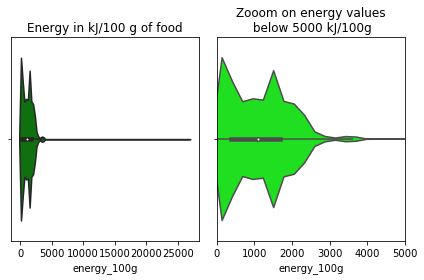

In [91]:
plt.subplot(1,2,1)
sns.violinplot(nutri_cleaned_df['energy_100g'], color='green')
plt.title('Energy in kJ/100 g of food')
plt.subplot(1,2,2)
sns.violinplot(nutri_cleaned_df['energy_100g'], color='lime')
plt.xlim(0,5000)
plt.title('Zooom on energy values\n below 5000 kJ/100g')
plt.tight_layout()
plt.show();

The variable `energy_100g` exhibits a kind of bimodal distribution around the mean.

### Plot the distribution of nutrition values 
Look more closely at some distributions with violinplots, being fully aware that some have less data (see .desribe() function above).
I didn't include vitamins and micronutrients in the plotted variables.

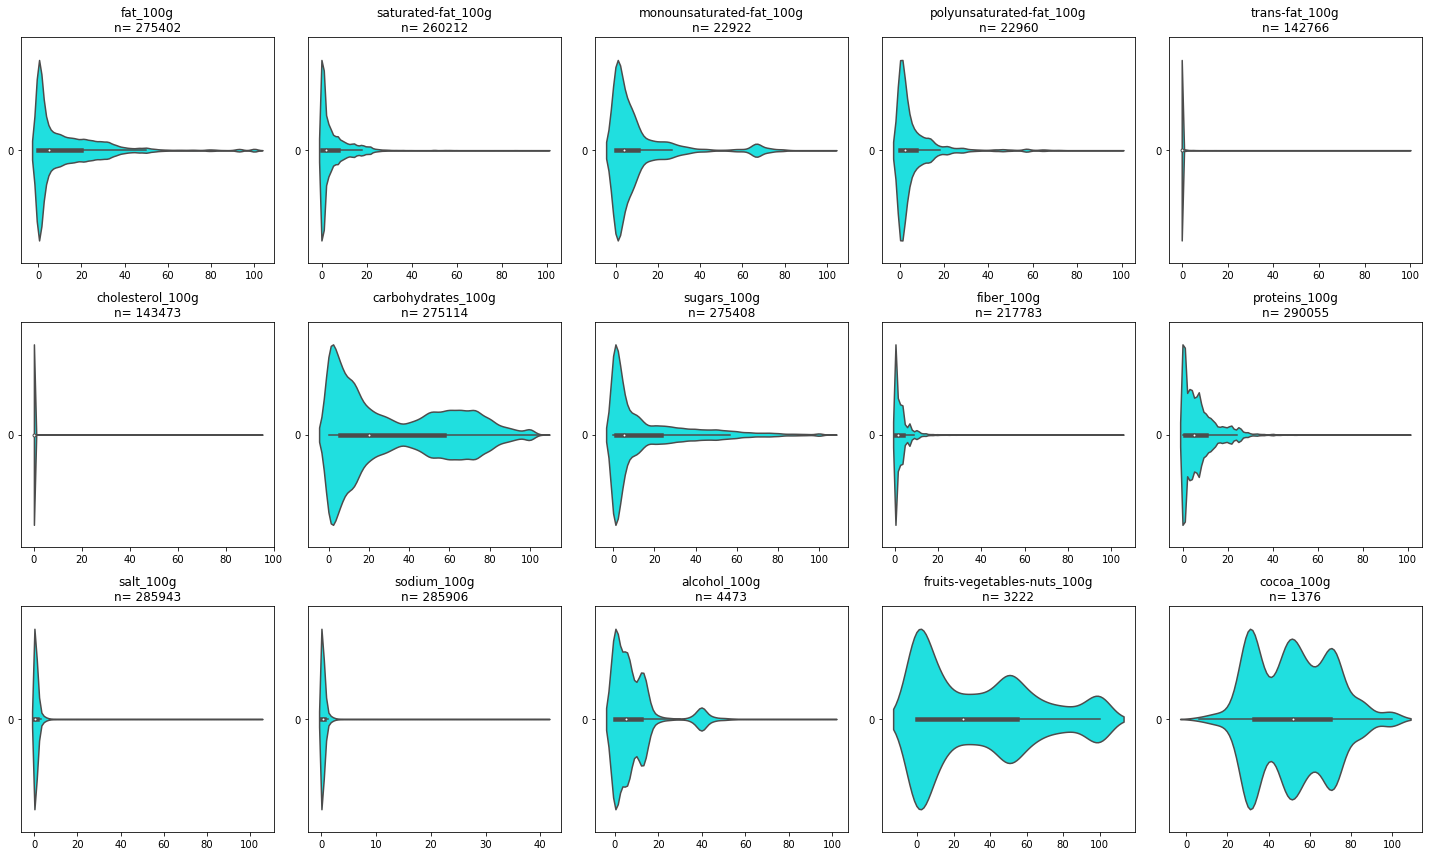

In [92]:
col_for_violin = ['fat_100g',
 'saturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'fruits-vegetables-nuts_100g',
 'cocoa_100g']
figsize2= (20, 12)
fig2, axes = plt.subplots(3,5, figsize=figsize2)
ax = axes.flatten()
for i, col in enumerate(col_for_violin):
    data = nutri_cleaned_df[col]
    sample_size = data.count()
    sns.violinplot(data=data, ax=ax[i], orient='h', color='cyan')
    ax[i].set_title(col+'\nn= '+str(sample_size))
plt.tight_layout()
plt.show;

`Carbohydrates_100g` also exhibit some kind of bimodal distribution around the mean, reminiscent of `energy_100g`

### Additives and ingredients from palm oil
Plot the distribution of the number `_n` variable for each of them.

!! they're still floats and not truly categorical variables, but going to trouble of converting before plotting didn't really make a big difference:
`arr = pd.array(nutri_cleaned_df['additives_n'], dtype=pd.Int64Dtype())
arr
additives_cat = pd.Series(arr)
additives_cat.dtypes`
Which gave this as Dtype: `Int64Dtype()`

C:\Users\Kerstin\anaconda3\envs\exts-ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Kerstin\anaconda3\envs\exts-ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


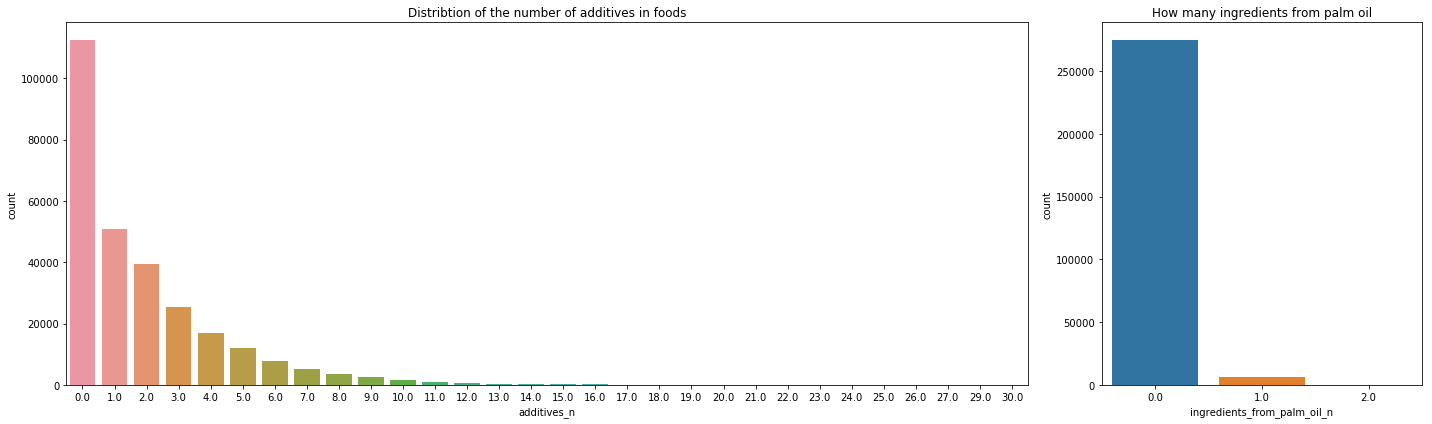

In [93]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6), gridspec_kw={'width_ratios': [3, 1]})
sns.countplot(nutri_cleaned_df['additives_n'], ax=ax1)
ax1.set_title('Distribtion of the number of additives in foods')
sns.countplot(nutri_cleaned_df['ingredients_from_palm_oil_n'], ax=ax2)
ax2.set_title('How many ingredients from palm oil')
fig.tight_layout()
plt.show();

- additives in food: a large proportion of the foods in the database has 0 additives, and we know (see above) that the n=30 value is a true outlier. **--> there's a large proportion of foods that has 1 to ~10 additives, enough to make an analysis of additives feasible.**

- ingredients from palm oil: as could be guessed from the statistics in `describe()`, most foods have n=0 ingredients from palm oil, so this is not a very exciting variable :-)



### Nutrition score UK and FR
Based on the `describe()` statistics, they should be almost identical *(the UK and FR scores are both derived from the same guidelines; sometimes small differences arise from the rounding up or down of nutrition points)*
--> do a quick visual check of the similarity/identity of both variables

C:\Users\Kerstin\anaconda3\envs\exts-ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Kerstin\anaconda3\envs\exts-ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


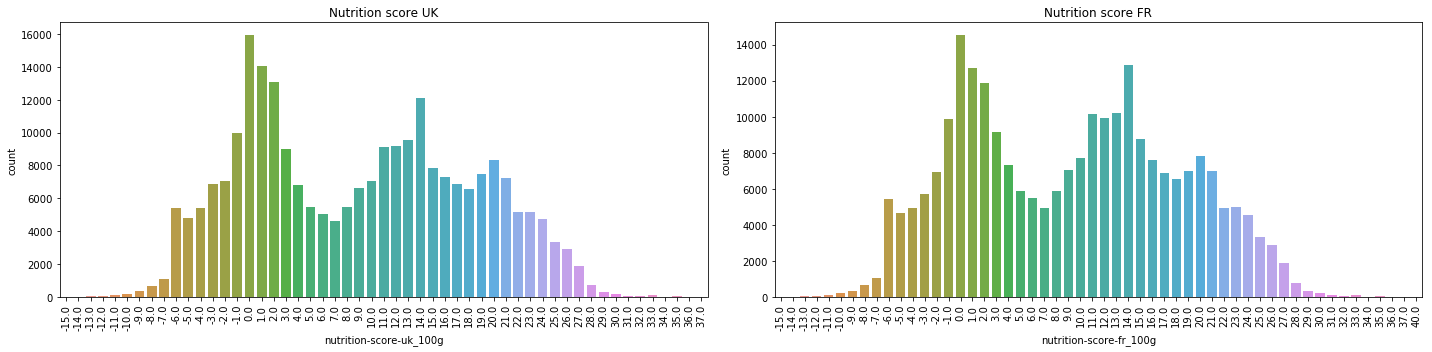

In [94]:
plt.subplots(1,2, figsize= (20,5))
plt.subplot(1,2,1)
sns.countplot(nutri_cleaned_df['nutrition-score-uk_100g'])
plt.title('Nutrition score UK')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(nutri_cleaned_df['nutrition-score-fr_100g'])
plt.title('Nutrition score FR')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

- it wasn't just a statistics artifact, the `nutrition-score` variables are quasi identical in their distributions
- the nutrition score also exhibits a bimodal distribution, much like carbs and energy.

# TASK B- MANIPULATING THE DATA: 3 INTERESTING QUESTIONS :-)

## MEGAQUESTION 1: Investigate the macronutrient breakdown across various foods

### What percentage of food energy comes from each main macronutrient group:

- fat
- carbohydrates
- proteins

--> create a new df with only product_name, energy_100g, the macronutrient columns, the nutrition-score-uk column and the country columns, **after removing data:**
- **where macronutrient total (`'fat_carbs_prot_100g'`)  == 0** (because that wouldn't tell us much about the breakdown of macronutrients :-) )
- **where macronutrient total (`fat_carbs_prot_100g`) == None/NaN** (see above: because that means that at least one of the 3 macronutrient variables for that observation = NaN- again, not very useful to look at breakdown).
- **and where `energy_100` is None(NaN) !** (those null values were conveniently ignored in EDA, but will be a problem when calculating energy ratios:-) )

In [95]:
nutri_cleaned_df.shape

(337623, 87)

In [96]:
macronutrients_df = nutri_cleaned_df.copy()
#(macronutrients_df[macronutrients_df['fat_carbs_prot_100g']==0]).index
macronutrients_df.drop((macronutrients_df[macronutrients_df['fat_carbs_prot_100g']==0]).index, inplace=True)
macronutrients_df.shape  
macronutrients_df.drop((macronutrients_df[macronutrients_df['fat_carbs_prot_100g'].isnull()]).index, inplace=True)
macronutrients_df.shape 
macronutrients_df.drop((macronutrients_df[macronutrients_df['energy_100g'].isnull()]).index, inplace=True) #this removes NaN values, but not energy_100g = 0
macronutrients_df.shape 

(263896, 87)

In [97]:
macro_cols=['product_name',
            'nutrition_grade_fr',
           'energy_100g',
           'fat_100g',
           'carbohydrates_100g',
           'proteins_100g',
            'fat_carbs_prot_100g',
           'country_1',
           'country_2']
#coltest = [col for col in macronutrients_df.columns if col not in macro_cols]
macronutrients_df.drop(columns = [col for col in macronutrients_df.columns if col not in macro_cols], inplace=True)
macronutrients_df.shape #(264012, 10)
macronutrients_df.head(3)

product_name nutrition_grade_fr  energy_100g  fat_100g  \
1  Banana Chips Sweetened (Whole)                  d       2243.0     28.57   
2                         Peanuts                  b       1941.0     17.86   
3          Organic Salted Nut Mix                  d       2540.0     57.14   

   carbohydrates_100g  proteins_100g      country_1      country_2  \
1               64.29           3.57  United States  United States   
2               60.71          17.86  United States  United States   
3               17.86          17.86  United States  United States   

   fat_carbs_prot_100g  
1                96.43  
2                96.43  
3                92.86

#### Convert macronutrients grams (per 100g food) to energy (kJ) :

To convert grams of macronutrients to energy in kJ, I used average energy values found here:
https://www.inspection.gc.ca/exigences-en-matiere-d-etiquetage-des-aliments/etiquetage/industrie/etiquetage-nutritionnel/elements-du-tableau-de-la-valeur-nutritive/fra/1389206763218/1389206811747?chap=1#s1c1
- fat: 37 kJ / g
- carbs: 17 kJ/ g *(if fibers not included in carbs, which seems to be the case in this dataset)*
- proteins: 17 kJ/ g

And then convert to energy contribution in % of total `energy_100g`.

**!! This will not work with "energy-free" (`energy_100g`==0) foods, because we will divide by 0 = Inf!!**

--> first split df into separate "no_energy" and "energy-rich" dfs

In [98]:
no_energy_df = macronutrients_df.copy()
no_energy_df.drop(no_energy_df[no_energy_df['energy_100g']!=0].index, inplace=True)
no_energy_df.shape #(1443, 10)
no_energy_df.describe() #hum, one would have expected foods with 0 kJ/100 g to contain 0 fat, carbs and proteins... probably due to errors.

energy_100g     fat_100g  carbohydrates_100g  proteins_100g  \
count       1443.0  1443.000000         1443.000000    1443.000000   
mean           0.0     0.743715           30.662432       0.902487   
std            0.0     6.710873           39.330068       6.066702   
min            0.0     0.000000            0.000000       0.000000   
25%            0.0     0.000000            1.980000       0.000000   
50%            0.0     0.000000            4.230000       0.000000   
75%            0.0     0.000000           60.000000       0.000000   
max            0.0   100.000000          100.000000     100.000000   

       fat_carbs_prot_100g  
count          1443.000000  
mean             32.308634  
std              39.631306  
min               0.001200  
25%               3.330000  
50%               6.670000  
75%              66.670000  
max             100.000000

In [99]:
no_energy_df.sample(40) #these products all seem to be indeed poor in kJ, but not necessarily 0... database entry error (kJ values on food labels is mandatory)

product_name nutrition_grade_fr  \
27625                                 Sour Garlic Puckles                  c   
157823        Classic Monkfruit Sweetener With Erythritol                NaN   
71621                                  Spear Dill Pickles                NaN   
66360                                Jerk Seasoning, Mild                NaN   
117300                       Hamburger Dill Chips Pickles                NaN   
152270                           Organic Stevia Sweetener                  c   
20246                                   Premium Black Tea                NaN   
106703                     Akiyama, Pickled Nappa Cabbage                  b   
53951                                  Kosher Dill Spears                NaN   
11558                                   Peruvian Barbeque                  c   
198131           St mamet, Fruitesse peche 1/2 , la boite                  b   
257                                             Green Tea                NaN   
46046                                     Fancy Pimientos                NaN   
107374                                   Grilling Seasons                  c   
7419                                       Habanero Sauce                NaN   
158894                      Zero Calorie Soda, Ginger Ale                NaN   
6900                            Super Green Tea, Tropical                NaN   
107434                                       Curry Powder                  b   
150732                                    Garlic Sea Salt                  c   
20752   Triple Leaf Tea, Jasmine Green Tea, Jasmine Fl...                NaN   
165110                           Enhanced Sparkling Water                NaN   
135305                                Spicy Brown Mustard                NaN   
91710                                   Poultry Seasoning                NaN   
129198                                    Coconut Vinegar                  b   
159149  Premium Organic Stevia, Powdered Sweetener Pac...                NaN   
133197         Zero Calorie Sweetener With Stevia Extract                NaN   
73568                              Bellino, Minced Garlic                NaN   
157822                Monkfruit Sweetener With Erythritol                NaN   
84824                        Fancy Imported Pepperrochini                NaN   
107562                   Diet sparkling fiery ginger beer                  b   
98042                                No Calorie Sweetener                  b   
3779                            Banana Pepper Rings, Mild                NaN   
158900                            Zero Calorie Soda, Cola                NaN   
150884                     True Orange, Drink Mix, Orange                NaN   
147703                                        Sweety Drop                  c   
11556                                      Tandoori Spice                  c   
37721   Luscious Herbal Tea, Berry Hibiscus Flavor Wit...                NaN   
53952                    Organic Kosher Dill Baby Pickles                NaN   
107377                                   Grilling Seasons                  c   
31746               Sparkling Water Beverage, Cherry Lime                NaN   

        energy_100g  fat_100g  carbohydrates_100g  proteins_100g  \
27625           0.0      0.00                3.33           0.00   
157823          0.0      0.00              100.00           0.00   
71621           0.0      0.00                3.57           0.00   
66360           0.0      0.00               25.00           0.00   
117300          0.0      0.00                3.57           0.00   
152270          0.0      0.00              100.00           0.00   
20246           0.0      0.00               62.50           0.00   
106703          0.0      0.00                3.53           3.53   
53951           0.0      0.00                3.57           0.00   
11558           0.0      0.00               40.00           0.00   
198131          

In [100]:
energy_rich_df = macronutrients_df.copy()
energy_rich_df.drop(energy_rich_df[energy_rich_df['energy_100g']<1].index, inplace=True) # <1 kJ instead of ==0 kJ filter, because with division small kJ values give large numbers... :-)
energy_rich_df.shape

(262449, 9)

In [101]:
#convert macronutrient grams to kJ
energy_rich_df['fat_kJ'] = energy_rich_df['fat_100g']*37
energy_rich_df['carbs_kJ'] = energy_rich_df['carbohydrates_100g']*17
energy_rich_df['proteins_kJ'] = energy_rich_df['proteins_100g']*17
energy_rich_df['%fat_energy'] = energy_rich_df['fat_kJ']/energy_rich_df['energy_100g']*100
energy_rich_df['%carbs_energy'] = energy_rich_df['carbs_kJ']/energy_rich_df['energy_100g']*100
energy_rich_df['%protein_energy'] = energy_rich_df['proteins_kJ']/energy_rich_df['energy_100g']*100

In [102]:
energy_rich_df.describe()


energy_100g       fat_100g  carbohydrates_100g  proteins_100g  \
count  262449.000000  262449.000000       262449.000000  262449.000000   
mean     1161.892152      13.184098           32.532541       7.362002   
std       784.326640      17.534949           28.766128       8.196472   
min         1.000000       0.000000            0.000000       0.000000   
25%       435.000000       0.400000            6.670000       1.000000   
50%      1143.000000       6.000000           21.430000       5.000000   
75%      1674.000000      21.000000           58.700000      10.530000   
max     26861.000000     101.000000          104.000000     100.000000   

       fat_carbs_prot_100g         fat_kJ       carbs_kJ    proteins_kJ  \
count        262449.000000  262449.000000  262449.000000  262449.000000   
mean             53.078641     487.811625     553.053191     125.154038   
std              32.653564     648.793118     489.024179     139.340021   
min               0.000100       0.000000       0.000000       0.000000   
25%              21.430000      14.800000     113.390000      17.000000   
50%              51.000000     222.000000     364.310000      85.000000   
75%              86.960000     777.000000     997.900000     179.010000   
max             110.000000    3737.000000    1768.000000    1700.000000   

         %fat_energy  %carbs_energy  %protein_energy  
count  262449.000000  262449.000000    262449.000000  
mean       34.906649      58.675864        15.112236  
std       314.389398     416.906713       151.454670  
min         0.000000       0.000000         0.000000  
25%         2.913386      27.958560         3.293864  
50%        29.455710      54.851816         8.282748  
75%        53.047791      81.389076        17.932018  
max     88245.000000   95625.000000     42500.000000

**!! Some %macronutrient_kJ energy values are off the chart!**

`fat_kJ` `carbs_kJ` `proteins_kJ` conversions should be reasonably ok, as nutritional values in g have been filtered to remove values above 105 g /100g, total macronutrient values have been filtered to remove values >110 g/100g (Task A) and NaN values have been removed (see above).

1. --> these absurdly high values must be due to mismatch with `energy_100g` values, cleaned in Task A and further filtered here to remove values <1 kJ / 100g, but obviously, not checked one by one :-) *(see above where `energy_100g` ==0 didn't match with macronutrient values)*

2. --> use a calculated total of kJ (`total_kJ`) instead of `energy_100g`, compiled from the sum of the converted energetic values of fat, carbs and proteins, keeping in mind that it's necessarily an approximation:

   - because the g -> kJ conversion factors are *averages* for the macronutrients (different fats have different energetic values, like carbohydrates)
   
   - because fat, carbs and proteins are *the main but not the only source of energy (eg fibers, alcohol, etc also contribute)*

In [103]:
energy_rich_df['total_kJ'] = energy_rich_df[['fat_kJ','carbs_kJ','proteins_kJ']].sum(axis=1)
energy_rich_df.head(5)

product_name nutrition_grade_fr  energy_100g  \
1     Banana Chips Sweetened (Whole)                  d       2243.0   
2                            Peanuts                  b       1941.0   
3             Organic Salted Nut Mix                  d       2540.0   
4                    Organic Polenta                NaN       1552.0   
5  Breadshop Honey Gone Nuts Granola                NaN       1933.0   

   fat_100g  carbohydrates_100g  proteins_100g      country_1      country_2  \
1     28.57               64.29           3.57  United States  United States   
2     17.86               60.71          17.86  United States  United States   
3     57.14               17.86          17.86  United States  United States   
4      1.43               77.14           8.57  United States  United States   
5     18.27               63.46          13.46  United States  United States   

   fat_carbs_prot_100g   fat_kJ  carbs_kJ  proteins_kJ  %fat_energy  \
1                96.43  1057.09   1092.93        60.69    47.128399   
2                96.43   660.82   1032.07       303.62    34.045337   
3                92.86  2114.18    303.62       303.62    83.235433   
4                87.14    52.91   1311.38       145.69     3.409149   
5                95.19   675.99   1078.82       228.82    34.971029   

   %carbs_energy  %protein_energy  total_kJ  
1      48.726259         2.705751   2210.71  
2      53.172076        15.642452   1996.51  
3      11.953543        11.953543   2721.42  
4      84.496134         9.387242   1509.98  
5      55.810657        11.837558   1983.63

In [104]:
# out of curiosity, look at entries with >20% difference between energy_100g and total_kJ
energy_rich_df[(abs(energy_rich_df['total_kJ']-energy_rich_df['energy_100g'])/energy_rich_df['total_kJ'])>0.2]

product_name nutrition_grade_fr  \
19                                     Organic Oat Groats                  a   
26                    Organic Unswt Berry Coconut Granola                  b   
126                                    Organic Wheat Bran                NaN   
130                           Organic Regular Rolled Oats                NaN   
133                                 Organic Spelt Berries                NaN   
145                                     Organic Wild Rice                NaN   
188                                        Pâté au poulet                NaN   
190                 Thé noir aromatisé violette et fleurs                  c   
278                                             Black Tea                NaN   
291                            Big Papa's, Southern Sauce                  e   
294               Between!, Dental Gum, Natural Cool Mint                NaN   
295     Eco-Dent, Between!, Sugar Free Dental Gum, Cin...                NaN   
300                                Oatmeal Raisin Cookies                  d   
337                                            Cornichons                NaN   
338     Too Tarts, Smartchoice, Sugar Free Spray Candy...                NaN   
342                                    Green Leaf Lettuce                  a   
345                              Quick Cook Sprout Halves                  a   
368        Lite, Fine Chocolate Candy Bar, Dark Chocolate                  c   
406                   Fruit Ninja, Fruit Snacks, Original                  d   
429                     Augason Farms, Vital Wheat Gluten                  a   
430                               Caperberries In Vinegar                NaN   
493                                       Salsa Autentica                NaN   
510                                   6 Ultimate Crumpets                  b   
523                                       Marinade, Cajun                NaN   
525     Marinade, Steak & Chop With Garlic & Cracked B...                NaN   
526                                 Fajitas Seasoning Mix                  d   
633                                        Barbecue Sauce                  d   
636                      Diet Sparkling Fiery Ginger Beer                  b   
684                                       Pineapple Salsa                NaN   
718                                        Crushed Garlic                NaN   
...                                                   ...                ...   
355165                                      Coconut Water                  a   
355187                Coconut and Macadamia Protein Bliss                  a   
355259                                     Mango Chia Pod                  b   
355268                  Ultra low carb choc mocha delight                  d   
355280                          Traditional Napoli Sauce                   c   
355346                                   Spaghetti konjac                  a   
355535                                 Red Seal Green Tea                NaN   
355537                                 Manuka Honey Blend                  d   
355538                              Crunchy Peanut Butter                  d   
355568                                Original Beef Jerky                  d   
355609  Chewy Fruit & Veggie Snacks, Berries Spinach A...                  a   
355610  Chewy Fruit & Veggie Snacks, Beets Apples Swee...                  b   
355637                       COEUR DE PALMIER BOCAL VERRE                  a   
355641                                   Cœurs de palmier                  a   
355642                                  Coeurs de palmier                  a   
355700                                              Salsa                NaN   
355741         Hot Can Gluten Free Cafe Latte Drink 210ml                  e   
355767                                               Milo                  d   
355853               Sun-up Mango Concentrate

**-->16932 observations exhibit a >20% difference between the `energy_100g` value (in kJ) in the database, and `total_kJ` calculated from the converted grams fat/carbs/proteins per 100g**

!!dearie me, someone at kiliweb got seriously bored! What a messy dataset!! Some entries are books, not to mention index 355977...
#fantasy_idx = [355970, 355971, 355972, 355974, 355977, 355978, 355979] 

--> we could look at these in another life, but for now I decided to trust the indicated grams of macronutrient/100 g food and work with that (and `total_kJ` to calculate % if needed).

In [105]:
#drop these % columns and calculate new ones below
energy_rich_df.drop(['%fat_energy','%carbs_energy','%protein_energy'], axis=1, inplace=True)

In [106]:
new_percent = [('fat_kJ','calc_fat%'),('carbs_kJ', 'calc_carbs%'),('proteins_kJ', 'calc_proteins%')]
for col, newcol in new_percent:
    energy_rich_df[newcol]= energy_rich_df[col]/energy_rich_df['total_kJ']*100
#energy_rich_df.head()    

C:\Users\Kerstin\anaconda3\envs\exts-ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Kerstin\anaconda3\envs\exts-ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


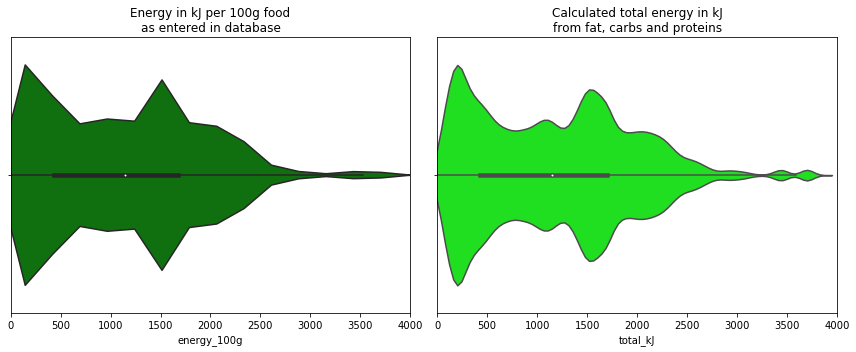

In [107]:
#compare total_kJ to energy_100g visually 
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
sns.violinplot(energy_rich_df['energy_100g'], color='green')
plt.title('Energy in kJ per 100g food\nas entered in database')
plt.xlim(0,4000)
plt.subplot(1,2,2)
sns.violinplot(energy_rich_df['total_kJ'], color='lime')
plt.title('Calculated total energy in kJ\nfrom fat, carbs and proteins')
plt.xlim(0,4000)
plt.tight_layout()
plt.show(); #this shows that the overall distribution hasn't been changed by calculations

In [108]:
energy_rich_df.describe() #shows that mean and quartiles of energy_100g and total_kJ are almost identical (as indicated by violin plots)

energy_100g       fat_100g  carbohydrates_100g  proteins_100g  \
count  262449.000000  262449.000000       262449.000000  262449.000000   
mean     1161.892152      13.184098           32.532541       7.362002   
std       784.326640      17.534949           28.766128       8.196472   
min         1.000000       0.000000            0.000000       0.000000   
25%       435.000000       0.400000            6.670000       1.000000   
50%      1143.000000       6.000000           21.430000       5.000000   
75%      1674.000000      21.000000           58.700000      10.530000   
max     26861.000000     101.000000          104.000000     100.000000   

       fat_carbs_prot_100g         fat_kJ       carbs_kJ    proteins_kJ  \
count        262449.000000  262449.000000  262449.000000  262449.000000   
mean             53.078641     487.811625     553.053191     125.154038   
std              32.653564     648.793118     489.024179     139.340021   
min               0.000100       0.000000       0.000000       0.000000   
25%              21.430000      14.800000     113.390000      17.000000   
50%              51.000000     222.000000     364.310000      85.000000   
75%              86.960000     777.000000     997.900000     179.010000   
max             110.000000    3737.000000    1768.000000    1700.000000   

            total_kJ      calc_fat%    calc_carbs%  calc_proteins%  
count  262449.000000  262449.000000  262449.000000   262449.000000  
mean     1166.018854      32.134193      54.123607       13.742200  
std       785.276683      28.688211      33.051025       16.644576  
min         0.001700       0.000000       0.000000        0.000000  
25%       429.300000       2.949088      28.610568        3.280587  
50%      1145.900000      29.306931      55.339806        8.343558  
75%      1700.000000      52.680862      83.003953       17.996219  
max      3821.380000     100.000000     100.000000      100.000000

**On _average_, the percentage of energy (in kJ or calories, it doesn't matter) that comes from each macronutrient:**
- from fat (all fats combined): 32%
- from carbohydrates (which includes sugars): 54%
- from proteins: 14%

This is, on average, very close to a balanced diet (see below). 

#### But **are some macronutrients over- or underrepresented in foods with different energy levels?** 
_(to be exact, not macronutrients but the energy provided by the macronutrients)_

*(As a reference point, the recommended daily total energy intake, on average, is about 7500 kJ/day...).*

:-) ideally I would have liked to produce a ternary/triangle heatmap plot, with 'calc_x%' values on axes, and density(or counts) as a heatmap...but that turned out to be a bit more complicated than expected :-) :-) :-) (I got as far as creating the (x, y, z) tuples for the values to be plotted, but then got stuck.. probably because the calculated % don't always add up to 100%!) **if you know how to do the heatmat density plotting part, I'd love to learn :-) **

So to try to answer (or at least visualize) this question, I did the following:
 1. discretization of `total_kJ` values into Q1, Q2, Q3 and Q4 categories (corresponding to quartiles)- *validated by violin plot*
 
     Q1 = 0 - 429 total kJ / 100g  *(not sure if the interval includes the max value or not?)*
     
     Q2 = 429- 1146 total kJ / 100g
     
     Q3 = 1146 - 1700 total kJ / 100g
     
     Q4 = 1700 - 3821 total kJ / 100 g
     
 2. group by quartile, before producing plots

In [109]:
energy_rich_df['energy_level'] = pd.qcut(energy_rich_df['total_kJ'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
grouped_by_Q = energy_rich_df.groupby(by='energy_level') #since the groups were defined as quartiles, they're all the same size

In [110]:
grouped_by_Q.agg({'calc_fat%':['min', 'median', 'std', 'mean','max'], 'calc_carbs%':['min', 'median','std', 'mean','max'],'calc_proteins%':['min', 'median','std', 'mean','max'] })

calc_fat%                                         calc_carbs%  \
                   min     median        std       mean    max         min   
energy_level                                                                 
Q1                 0.0   1.317664  18.207244  12.358057  100.0         0.0   
Q2                 0.0  36.195435  26.013937  36.175822  100.0         0.0   
Q3                 0.0  11.964448  29.764748  26.533440  100.0         0.0   
Q4                 0.0  50.414242  22.182342  53.755825  100.0         0.0   

                                                     calc_proteins%  \
                 median        std       mean    max            min   
energy_level                                                          
Q1            77.648202  29.000812  70.932490  100.0            0.0   
Q2            43.313778  33.145607  44.244647  100.0            0.0   
Q3            74.995336  35.258026  62.077737  100.0            0.0   
Q4            43.531082  22.550691  38.996348  100.0            0.0   

                                                           
                 median        std       mean         max  
energy_level                                               
Q1            10.000000  21.043499  16.709452  100.000000  
Q2            13.934426  20.031497  19.579531  100.000000  
Q3             8.856594  11.368441  11.388823  100.000000  
Q4             5.542692   6.613539   7.247827   96.921323

**The macronutrient breakdown is not identical in all energy-level categories!**

- Not suprisingly, the fat% tends to increase as the energy content of food increases: high-energy (Q4) foods are richer in fat calories.
- The protein% shows an inverse relationship: energy-rich foods tend to have less energy provided by proteins.
- Carbohydrate calories are present at medium/high levels in all food categories, but tend to be highest in the Q1 and Q3 categories (as suggested by EDA). 

*(The code below is something I tried after installing a newer version of the Seaborn package... I had fun, but it's a lot of computation for not much extra info (the aggregate calculations on `grouped_by_Q` are good enough)... it makes the notebook unnecessarily heavy, so I removed it from a Code cell but left it in a Markdown cell for future use :-) :-))*

`for q, group in grouped_by_Q:
    g = sns.PairGrid(group, vars=('calc_fat%', 'calc_carbs%', 'calc_proteins%'), hue="nutrition_grade_fr", hue_order=['a','b','c','d','e'])
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot, fill=False)
    g.map_diag(sns.histplot)
    g.add_legend()
    plt.suptitle('Pairplots for energy level '+q, y=1.02)
    plt.show();
    `

#### How are nutrition grades represented in different energy level quartiles?
*schematically: a=healthy ---> e=unhealthy*

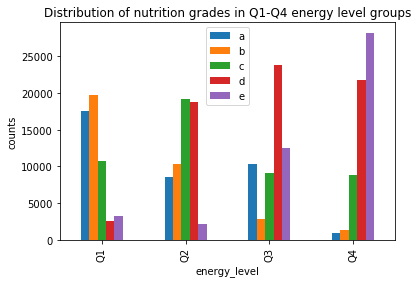

In [111]:
df = energy_rich_df.groupby(by=['energy_level', 'nutrition_grade_fr']).size().unstack()
df.plot.bar()
plt.legend(loc='best')
plt.title('Distribution of nutrition grades in Q1-Q4 energy level groups')
plt.ylabel('counts')
plt.show();

-- > not so surprisingly, **foods with a "bad" nutrition grade are clearly overrepresented in the energy-rich Q4 category**.

#### What kind of foods can we find in the "Top 20" of the "not so healthy" `Q4` category?
- get the Q4 group from the `grouped_by_Q` groupby object
- remove `product_name` duplicates
- show top 20 of foods with highest percentage of fat, carbs and proteins kJ, respectively

In [112]:
g4 = grouped_by_Q.get_group('Q4')
dupli_filter = g4.duplicated(subset='product_name')
g4_filtered = g4[~dupli_filter] #we kept duplicates earlier, but here they're a pain... it's bad enough with similar products populating the list:-)
for nutr in ['calc_fat%', 'calc_carbs%', 'calc_proteins%']:
    print('Top 20 products in '+'Q4'+' energy level quartile based on ', nutr)
    print(g4_filtered.nlargest(columns= nutr, n=20)['product_name'])

Top 20 products in Q4 energy level quartile based on  calc_fat%
264                           100% Pure Canola Oil
265                        Original Buttery Spread
266              Buttery Spread, With Flaxseed Oil
480                             Imported Olive Oil
482                         Extra Virgin Olive Oil
483                                      Olive Oil
552     Ventura, Soybean - Peanut Frying Oil Blend
736         Bunge, Clear Liquid Soybean Frying Oil
779                           100% Pure Sesame Oil
781                 Athena, Extra Virgin Olive Oil
1986                          Mayo Real Mayonnaise
1987                               Real Mayonnaise
2309                             Traditional Aioli
2310                             Aloli Salsa Brava
3040                                Greek Dressing
3311                                 Salted Butter
3329                               Unsalted Butter
3523              Kroeger, Olive Oil, Extra Virgin
3538              

#### What are the most balanced foods?

What is a balanced diet? :-) :-)
https://health.gov/our-work/food-nutrition/2015-2020-dietary-guidelines/guidelines/appendix-7/
* 25-35% of kJ from fat
* 45-65% of kJ from carbs
* 10-30% of kJ from protein 

Filter the groupby object again, so that we can show healthiest/most balanced foods in each energy level category (otherwise if we just sort for example by `total_kJ`, we only get teas, tisanes and other not so exciting foods / beverages as the less energetic products on top of the list.

In [113]:
for q, groupdf in grouped_by_Q:
    dupli_filter2 = groupdf.duplicated(subset='product_name')
    print('Top 10 most balanced products in '+q+' energy level quartile, ordered by increasing total_kJ')
    groupdf = groupdf[~dupli_filter2]
    print(groupdf[(energy_rich_df['calc_fat%']>25) & (energy_rich_df['calc_fat%']<35) & 
                  (energy_rich_df['calc_carbs%']>45)&(energy_rich_df['calc_carbs%']<65)&
               (energy_rich_df['calc_proteins%']>10)&(energy_rich_df['calc_proteins%']<30)].nsmallest(columns= 'total_kJ', n=10)['product_name'])

Top 10 most balanced products in Q1 energy level quartile, ordered by increasing total_kJ
29862                          Lemon & Lime Sparkling Water
105985               Diet sparkling pink cranberry lemonade
107981               Diet sparkling pink cranberry limonade
189864                               Westcliffe Lemon Juice
216877    Cotterley Infusion Relax Max les 25 sachets de...
216878                                 Infusion Après REPAS
223848                                           Cola Light
281728               Brodo - Bouillon aux Légumes en Poudre
355065                              Delight vegetable stock
286058                                      Gemüse Boullion
Name: product_name, dtype: object
Top 10 most balanced products in Q2 energy level quartile, ordered by increasing total_kJ
240429    Péchalou, yaourts au lait entier aromatisés 'c...
22564                    Rosemary Grilled Beef & Vegetables
207666                                      Crème anglaise 
305895

C:\Users\Kerstin\anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys



Top 10 most balanced products in Q4 energy level quartile, ordered by increasing total_kJ
143171        Think Thin, Chocolate Peanut Butter Toffee
287752    Bio Dinkel Sticks d'èpeautre pavot & sel marin
287769                        Crackers d'épeautre nature
314847                          Sesame Crispbread sticks
315968                             Orvita Tomate-basilic
319431              Qualité & Prix cracker multicéréales
325259                             Cracker multicéréales
135817                               Nutz Over Chocolate
135925                    Whole Nutrition Bar, Lemonzest
135932            Whole Nutrition Bar, Chocolate Cupcake
Name: product_name, dtype: object


## QUESTION 2: are there differences across countries(continents) ? 
As mentioned in Task A (EDA), most observations in dataset are for products sold in the US, France and Switzerland... to be kept in mind! :-) 

In [114]:
country_df = nutri_cleaned_df.copy()
country_df.head(2)

url  \
0  http://world-en.openfoodfacts.org/product/0000...   
1  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   

       brands_tags categories categories_tags categories_en origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   

  labels_tags labels_en                                   ingredients_text  \
0         NaN       NaN                                                NaN   
1         NaN       NaN  Bananas, vegetable oil (coconut oil, corn oil ...   

  allergens traces traces_tags traces_en  serving_size  additives_n  \
0       NaN    NaN         NaN       NaN           NaN          NaN   
1       NaN    NaN         NaN       NaN  28 g (1 ONZ)          0.0   

                                           additives additives_tags  \
0                                                NaN            NaN   
1   [ bananas -> en:bananas  ]  [ vegetable-oil -...            NaN   

  additives_en  ingredients_from_palm_oil_n ingredients_from_palm_oil_tags  \
0          NaN                          NaN                            NaN   
1          NaN                          0.0                            NaN   

   ingredients_that_may_be_from_palm_oil_n  \
0                                      NaN   
1                                      0.0   

  ingredients_that_may_be_from_palm_oil_tags nutrition_grade_fr  \
0                                        NaN                NaN   
1                                        NaN                  d   

                                              states  \
0  en:to-be-completed, en:nutrition-facts-to-be-c...   
1  en:to-be-completed, en:nutrition-facts-complet...   

                                         states_tags  \
0  en:to-be-completed,en:nutrition-facts-to-be-co...   
1  en:to-be-completed,en:nutrition-facts-complete...   

                                           states_en main_category  \
0  To be completed,Nutrition facts to be complete...           NaN   
1  To be completed,Nutrition facts completed,Ingr...           NaN   

  main_category_en  energy_100g  fat_100g  saturated-fat_100g  \
0              NaN          NaN       NaN                 NaN   
1              NaN       2243.0     28.57               28.57   

   monounsaturated-fat_100g  polyunsaturated-fat_100g  trans-fat_100g  \
0                       NaN                       NaN             NaN   
1                       NaN                       NaN             0.0   

   cholesterol_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0               NaN                 NaN          NaN         NaN   
1             0.018               64.29        14.29         3.6   

   proteins_100g  salt_100g  sodium_100g  alcohol_100g  vitamin-a_100g  \
0            NaN        NaN          NaN           NaN             NaN   
1           3.57        0.0          0.0           NaN             0.0   

   vitamin-d_100g  vitamin-e_100g  vitamin-c_100g  vitamin-b1_100g  \
0             NaN             NaN             NaN              NaN   
1             NaN             NaN     

In [115]:
#correct a few country names
def repl_str(df,col, str1, str2):
    df[col] = df[col].str.replace(str1, str2)
repl_str(country_df, 'country_1', 'fr:Quebec', 'Canada')   
repl_str(country_df, 'country_2', 'fr:Quebec', 'Canada') 
repl_str(country_df, 'country_3', 'fr:Quebec', 'Canada') 
repl_str(country_df, 'country_1', 'Belgie', 'Belgium')  
repl_str(country_df, 'country_2', 'Belgie', 'Belgium')  
repl_str(country_df, 'country_3', 'Belgie', 'Belgium') 
repl_str(country_df, 'country_1', 'fr:Deutschland', 'Germany')   
repl_str(country_df, 'country_2', 'fr:Deutschland', 'Germany')
repl_str(country_df, 'country_3', 'fr:Deutschland', 'Germany')

In [116]:
grouped_by_country = country_df.groupby('country_2') #to check what countries we get.. country_1 and -2 give very similar lists
grouped_by_country['salt_100g'].count().sort_values(ascending=False)[:50]

country_2
United States                170383
France                        91210
Switzerland                    9139
Germany                        5213
Spain                          2993
United Kingdom                 2076
Belgium                         656
Australia                       529
Italy                           469
Portugal                        420
Netherlands                     297
Sweden                          284
Serbia                          261
Canada                          230
Hungary                         130
Guadeloupe                      122
Denmark                          92
Mexico                           91
Russia                           89
Réunion                          81
Romania                          81
Austria                          81
Brazil                           81
New Zealand                      74
French Guiana                    60
Luxembourg                       59
Ireland                          59
Norway            

### Assign countries to continents and group by continent

In [117]:
#easier to create manual dictionary: (but only for the 50 or so most represented countries in grouped_by_country)
#NA = North America, EU = Europe, OC= Oceania/Pacific, SA= South America, AZ = Asia, AF = Africa... and yes, my choices are slightly biased (didn't want to install pycountry)
continent_dict = {'United States':'NA',
                  'France':'EU', 
                  'Switzerland':'EU',
                  'Germany':'EU',
                  'Spain':'EU',
                  'Belgium':'EU', 
                  'United Kingdom':'EU',
                  'Australia': 'OC',
                  'Italy':'EU',
                  'Portugal':'EU',
                  'Canada':'NA',
                  'Sweden':'EU',
                  'Netherlands':'EU',
                  'Serbia':'EU',
                  'Denmark':'EU',
                  'Hungary':'EU',
                  'Austria':'EU',
                  'Mexico':'SA',
                  'Brazil':'SA',
                  'Russia':'AZ',
                  'Romania':'EU',
                  'New Zealand': 'OC',
                  'Ireland':'EU',
                  'Poland':'EU',
                  'Norway':'EU',
                  'Guadeloupe':'SA',
                  'Luxembourg':'EU',
                  'Hong Kong':'AZ',
                  'Czech Republic':'EU',
                  'China':'AZ',
                  'Réunion': 'AF',
                  'Greece':'EU',
                  'Thailand':'AZ',
                  'Algeria':'AF',
                  'Tunisia':'AF',
                  'Taiwan':'AZ',
                  'European Union':'EU',
                  'French Guiana':'AF',
                  'Saint Pierre and Miquelon':'NA',
                  'Colombia':'SA',
                  'Turkey':'EU',
                  'Chile':'SA',
                  'Bosnia and Herzegovina':'EU',
                  'Argentina':'SA',
                  'South Africa':'AF',
                  'Japan':'AZ',
                  'Croatia':'EU',
                  'Azerbaijan':'AZ',
                  'French Polynesia': 'OC',
                  'Madagascar' :'AF',
                 'Martinique': 'SA',
                 'New Caledonia': 'OC',
                 'Senegal': 'AF'}   

In [118]:
country_df['continent_1'] = country_df['country_1'].map(continent_dict)
country_df['continent_2'] = country_df['country_2'].map(continent_dict)
country_df.groupby('continent_1')['product_name'].count().sort_values(ascending=False)
#there are not enough observations for all continents -> as expected, we're largely comparing North America to Europe :-)

continent_1
NA    172841
EU    158280
OC      1994
AZ      1987
SA       799
AF       581
Name: product_name, dtype: int64

### Are there differences between foods sold on different continents? *(Or should we say "on both sides of the Atlantic")*
The analysis was narrowed to a few variables, and especially looking at:
- the ratio of grams of sugars/total carbohydrates.
- the salt content of foods
- vitamin-c (as some foods seem to be supplemented with vitamins (cf Task A), can we see a difference in distribution?

_...in other words, is there a difference in "taste" between North America and Europe? (yes the question is biased :-) )_

In [119]:
country_df = country_df[['product_name', 'energy_100g','nutrition_grade_fr', 'carbohydrates_100g', 'sugars_100g','salt_100g', 'vitamin-c_100g', 'continent_1', 'continent_2']]
country_df['%sugar/carbs'] = np.where(country_df['carbohydrates_100g']>0, country_df['sugars_100g']/country_df['carbohydrates_100g']*100, np.nan) #otherwise we get Inf because of div 0
country_df.shape

C:\Users\Kerstin\anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(337623, 10)

In [120]:
gp_by_cont1 = country_df.groupby('continent_1')
gp_by_cont2 = country_df.groupby('continent_2')

In [121]:
gp_by_cont1.describe()
# gp_by_cont2.describe() makes no difference!

energy_100g                                                       \
                  count         mean         std  min    25%     50%     75%   
continent_1                                                                    
AF                201.0  1308.363612  852.134749  0.0  418.0  1526.0  2026.0   
AZ               1135.0  1011.703753  804.047358  0.0  279.5   856.0  1470.0   
EU             117970.0  1113.138589  786.394313  0.0  414.0  1032.0  1653.0   
NA             170719.0  1128.244319  807.642253  0.0  356.0  1142.0  1674.0   
OC                703.0  1020.170526  788.178769  0.0  310.0   883.0  1520.5   
SA                269.0  1017.374610  825.453571  0.0  230.0   931.0  1690.0   

                     carbohydrates_100g                                    \
                 max              count       mean        std  min    25%   
continent_1                                                                 
AF            3358.0              188.0  40.331824  29.525229  0.0  10.15   
AZ            3764.0              993.0  29.642007  28.018751  0.0   4.70   
EU            6276.0           101881.0  27.799979  27.380875  0.0   4.20   
NA           26861.0           170869.0  33.654553  29.664727  0.0   6.67   
OC            3700.0              696.0  27.936478  27.328667  0.0   5.40   
SA            3760.0              271.0  33.162768  29.164937  0.0   5.02   

                                   sugars_100g                             \
               50%      75%    max       count       mean        std  min   
continent_1                                                                 
AF           53.25  65.5275   86.0       105.0  18.343838  21.275868  0.0   
AZ           14.90  55.5000  100.0       166.0  15.368022  20.383705  0.0   
EU           14.80  53.0000  105.0    114403.0  13.535204  19.218588  0.0   
NA           23.33  60.5300  100.0    159705.0  17.114538  21.955231  0.0   
OC           15.00  49.0050  100.0       678.0  15.238996  21.523873  0.0   
SA           18.20  60.8000   94.7       188.0  15.153122  20.383554  0.0   

                                        salt_100g                            \
                25%   50%    75%    max     count      mean        std  min   
continent_1                                                                   
AF           2.0000  9.50  35.00   82.1     114.0  0.814251   3.445031  0.0   
AZ           1.1425  6.40  18.95  100.0     196.0  2.896707  12.940091  0.0   
EU           1.0000  4.20  18.00  105.0  114227.0  1.150309   4.419381  0.0   
NA           1.6700  6.67  26.00  100.0  170305.0  1.836850   7.209450  0.0   
OC           1.5000  5.00  18.60  100.0     673.0  1.111741   3.001552  0.0   
SA           1.6000  5.52  17.85   90.9     258.0  1.733541   6.866658  0.0   

                                                    vitamin-c_100g            \
                  25%      50%       75%        max          count      mean   
continent_1                                                                    
AF           0.014195  0.10795  0.490000   35.56000            9.0  0.015847   
AZ           0.019238  0.15240  0.929005  100.00000           26.0  0.458898   
EU           0.050800  0.49000  1.200000  100.00000         1994.0  0.098946   
NA           0.060960  0.61722  1.468120  104.86644       138216.0  0.012448   
OC           0.063500  0.40640  1.049020   54.35600           40.0  0.011328   
SA           0.076200  0.21445  1.098050   81.70000           21.0  0.024519   

                                                                        \
                  std       min       25%       50%       75%      max   
continent_1                                                              
AF           0.024428  0.000121  0.000831  0.000947  0.015000   0.0650   
AZ           1.955395  0.000000  0.004800  0.012500  0.044625  10.0000   
EU           1.530453  0.000000  0.012000  0.020000  0.032000  63.2000   
NA           0.329840  0.0

**!!well aware that these conclusions have not been statistically tested _(and that the std values are huge...)_, we could say the following:**
- There might be slightly more salt in NA than in EU products.Outliers in salt values make it more difficult to visualize.
- The sugars/total carbs % doesn't exhibit obvious differences.
- There's possibly a slight difference in sugar content (in g) between NA and EU products (see boxplot below).

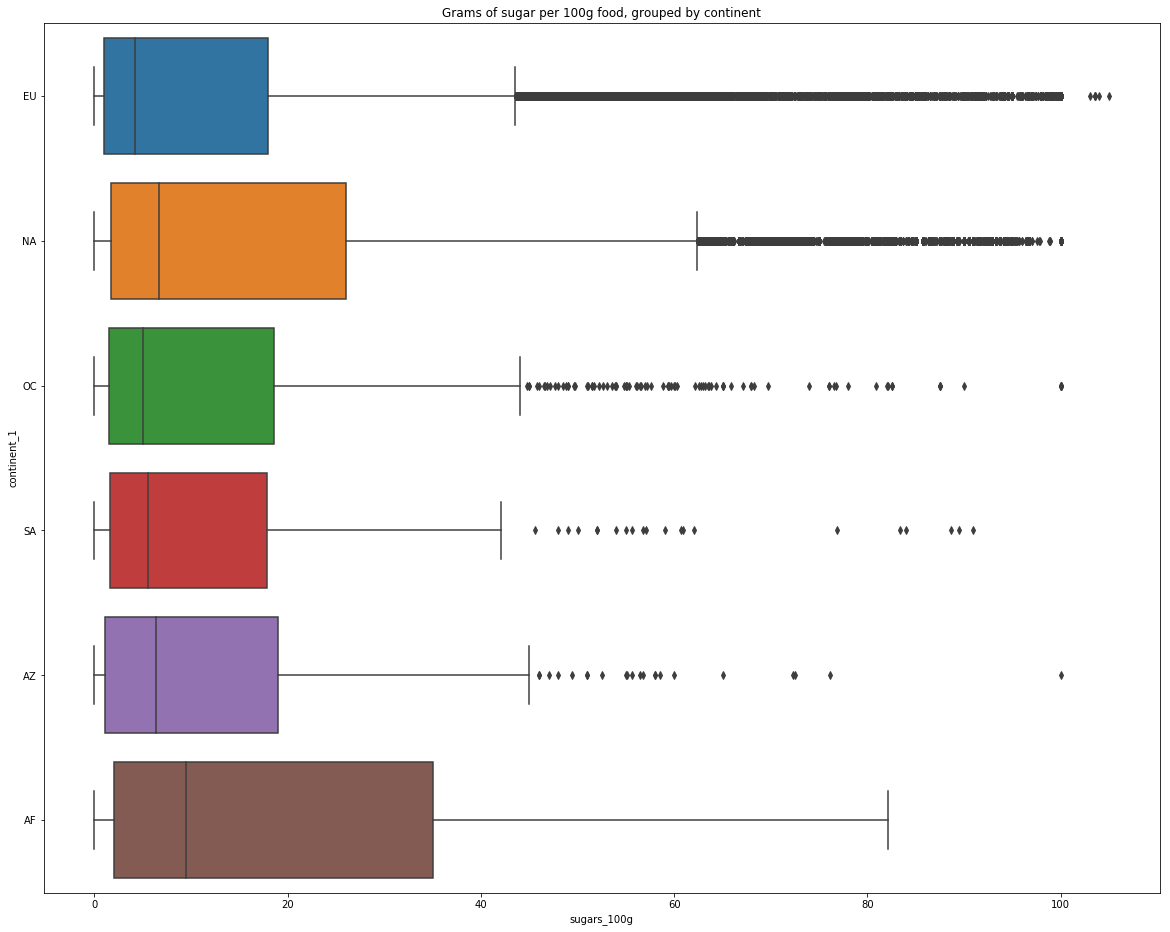

In [122]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.boxplot(y="continent_1", x='sugars_100g', orient='h', data=country_df)
plt.title('Grams of sugar per 100g food, grouped by continent')
plt.show();
#!! the sample sizes after grouping are very different! Only more or less comparable for EU and NA.

## QUESTION 3: Additives in food

- What kind of foods have the most additives? (Any difference between continents?)
- Which foods have the most colour additives?
- Can we say anything about the sugar content of these foods?

E additives numbered according to category: (E stands for Europe, but the E numbers are used in the US as well)
https://en.wikipedia.org/wiki/E_number
All food colours have number E1xx --> we'll use that to specifically spot products containing these E preservatives.

If parents worried about food colours and hyperactivity (https://www.nhs.uk/conditions/food-colours-and-hyperactivity/) , which foods should they avoid?
As high sugar content is also a possible culprit in attention deficit in children (ask any parent... :-) ), what's the sugar content of additive-rich foods?

Online database of E food additives approved in the EU:
https://webgate.ec.europa.eu/foods_system/main/?event=substances.search&substances.pagination=1

### What kind of foods have the most additives?
And is there a relationship with their sugar content?

In [123]:
nutri_cleaned_df['additives_n'].unique() #cf the distribution plot in Task A

array([nan,  0.,  1.,  2.,  3.,  6.,  5.,  8.,  4., 10., 11.,  9.,  7.,
       14., 12., 18., 22., 13., 20., 23., 17., 26., 21., 25., 15., 24.,
       16., 19., 27., 29., 30.])

In [124]:
nutri_cleaned_df.nlargest(20, columns=['additives_n'])[['product_name','additives_n', 'sugars_100g']] #they do look like candy/confiserie etc

product_name  additives_n  \
158332                            Italian Style Pinwheels         30.0   
188267                                         Confiserie         30.0   
188268                                         Confiserie         30.0   
188269                                         Confiserie         30.0   
16702           Ice Cream Cake, Vanilla & Chocolate Swirl         29.0   
91855                     Caramel Pecan Danish Coffeecake         29.0   
91863                                 Mackinaw Fudge Cake         29.0   
13289   Carvel, The Original Ice Cream Cake, Chocolate...         27.0   
21590                                 Star Crunch Cookies         27.0   
61519          Jon Donaire, Red Velvet Ice Cream Cupcakes         27.0   
79551           Ice Cream Cake, Chocolate & Vanilla Swirl         27.0   
1725                               Mini Confetti Cupcakes         26.0   
91870                           Special Occasion Cupcakes         26.0   
144984                            Cheese & Berries Danish         26.0   
144985                       Danish, Blueberries & Cheese         26.0   
162501      Sweet Espresso Caramel Cake, Sea Salt Caramel         26.0   
214304                                    Framboisier X 2         26.0   
298329                Gâteau 16 parts M&M's Chocolate RED         26.0   
2115                                        Cheese Danish         25.0   
21554   Cosmic Snacks, Cookies With Caramel And Crisp ...         25.0   

        sugars_100g  
158332         2.35  
188267        83.20  
188268        83.20  
188269        83.20  
16702         26.74  
91855         23.53  
91863         40.00  
13289         22.35  
21590         40.32  
61519         25.76  
79551         20.00  
1725          43.66  
91870         28.21  
144984        15.49  
144985        14.08  
162501        38.71  
214304          NaN  
298329        53.30  
2115          30.36  
21554         41.94

In [125]:
additive_rich = nutri_cleaned_df[nutri_cleaned_df['additives_n']>= 10] # those are the total additives
additive_rich.shape

(4823, 87)

--> there does not appear to be an obvious relationship between high additive numbers and sugar content/ nutrition grade. (see all graphs below)

###  What kind of foods have the most colour additives?

In [126]:
E100_regex = '(e1\d\d)' # see above: the E100 numbers are food coloring additives

In [127]:
nutri_cleaned_df['E100_n'] = nutri_cleaned_df['additives_tags'].str.count(E100_regex)
nutri_cleaned_df['continent_1'] = nutri_cleaned_df['country_1'].map(continent_dict)

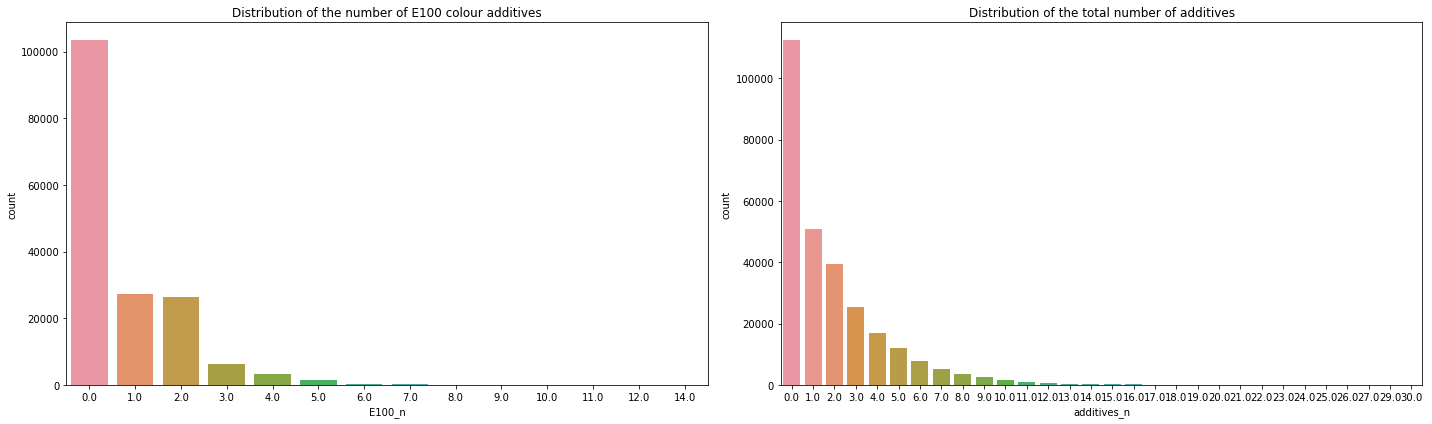

In [128]:
#what's the distribution of E100 additives? (compare to tot.number of additives)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.countplot(x='E100_n', data=nutri_cleaned_df, ax=ax1)
ax1.set_title('Distribution of the number of E100 colour additives')
sns.countplot(x='additives_n', data=nutri_cleaned_df, ax=ax2)
ax2.set_title('Distribution of the total number of additives')
plt.tight_layout()
plt.show();

In [129]:
E100_rich = nutri_cleaned_df[nutri_cleaned_df['E100_n']>= 4]
E100_rich.shape

(5337, 89)

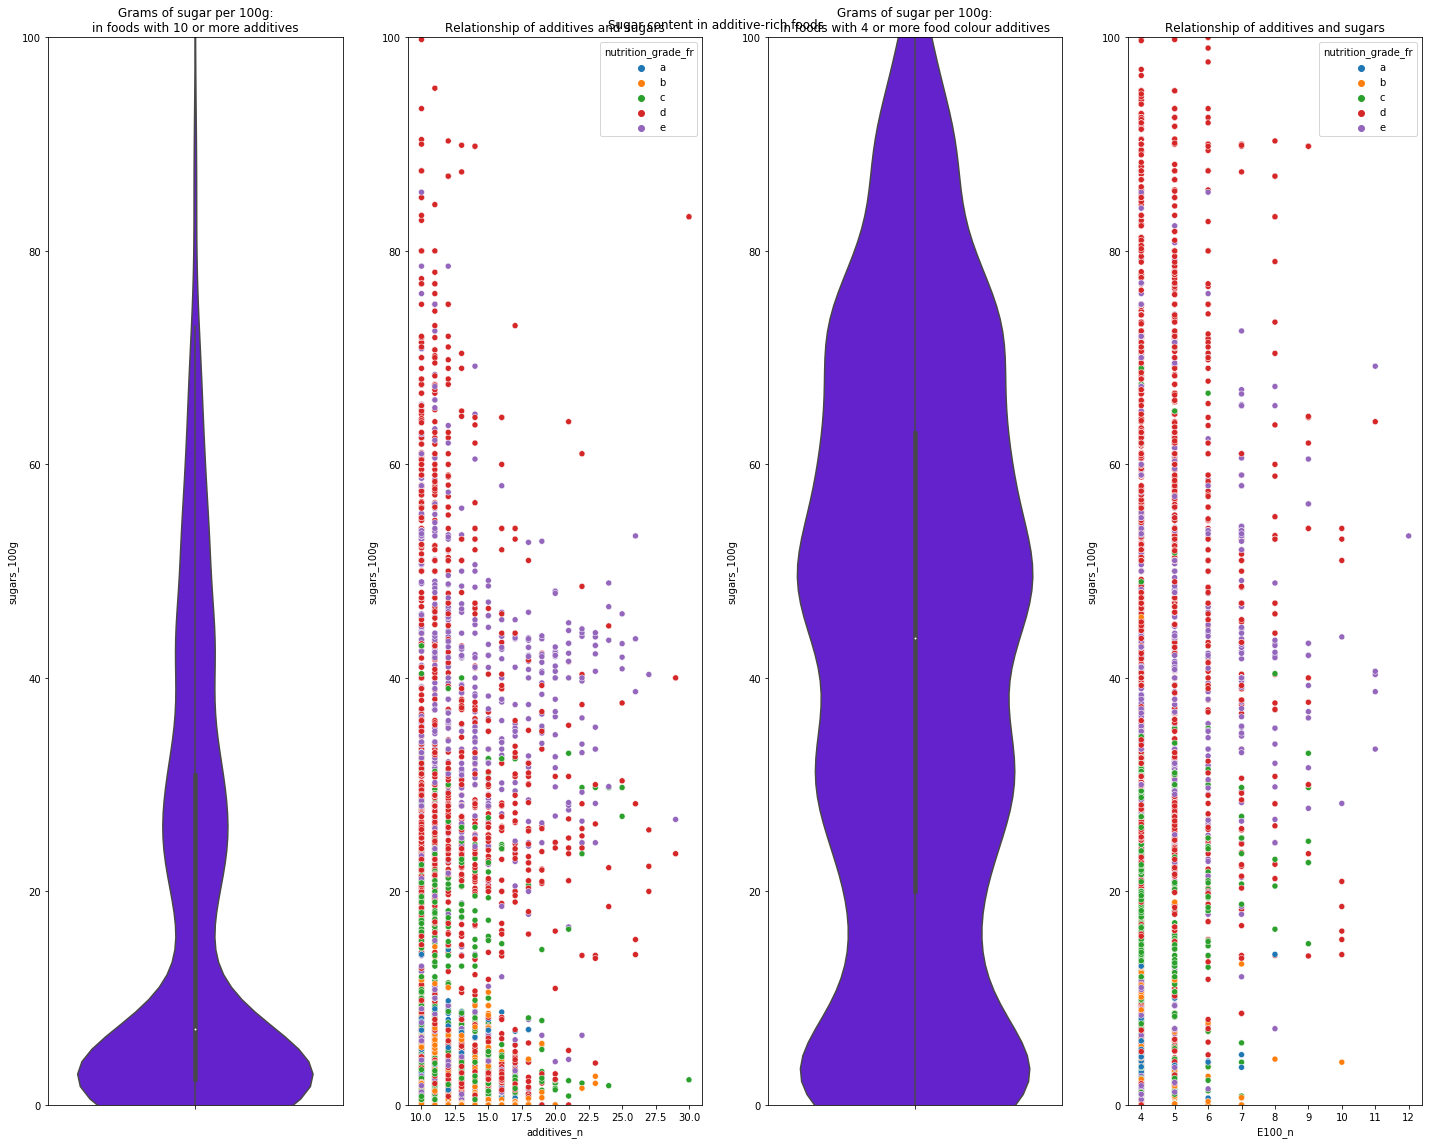

In [130]:
fig, ax = plt.subplots(1,4, figsize= (20,16))
plt.suptitle('Sugar content in additive-rich foods')
sns.violinplot(y='sugars_100g', data=additive_rich, color='#5d06e9', ax=ax[0])
ax[0].set_title('Grams of sugar per 100g:\nin foods with 10 or more additives')
ax[0].set_ylim(0,100)
sns.scatterplot(y='sugars_100g', x='additives_n', data=additive_rich, hue= 'nutrition_grade_fr',hue_order=['a','b','c','d','e'], ax=ax[1])
ax[1].set_title('Relationship of additives and sugars')
ax[1].set_ylim(0,100)
sns.violinplot(y='sugars_100g', data=E100_rich, color='#5d06e9', ax=ax[2])
ax[2].set_title('Grams of sugar per 100g:\nin foods with 4 or more food colour additives')
ax[2].set_ylim(0,100)
sns.scatterplot(y='sugars_100g', x='E100_n', data=E100_rich, hue= 'nutrition_grade_fr',hue_order=['a','b','c','d','e'], ax=ax[3])
ax[3].set_title('Relationship of additives and sugars')
ax[3].set_ylim(0,100)
plt.tight_layout()
plt.show();

--> the more E100 additives, the less healthy foods... and a certain tendency towards higher sugar levels.

Print a few **examples of foods with >8 E100 additives and high sugar content** that parents would try to avoid giving to their kids in the evening :-)

In [131]:
E100_rich_noduplis = E100_rich.drop_duplicates(subset='product_name')
E100_rich_noduplis[(E100_rich_noduplis['E100_n']>8) & (E100_rich_noduplis['sugars_100g']>40)].sort_values(by='nutrition_grade_fr', ascending=False)['product_name']

1590                                 Red Velvet Roll
328601                                   Choco Jelly
87556                             Gold Mini Cupcakes
87558                        Chocolate Mini Cupcakes
104924                    Pink Frosted Sugar Cookies
131394               Patriotic Frosted Sugar Cookies
131410    Frosted Sugar Cookies, Happy Birthday Cake
162504                             Cake Bites, Lemon
310729                                     M&M'S Mix
21590                            Star Crunch Cookies
310727                                     m&m's Mix
298329           Gâteau 16 parts M&M's Chocolate RED
298309      The Sprinkles Factory Classic Ice Cream 
283331                               Skittles Fruits
312274                                Lutti BESTFIZZ
199695                                     World Mix
200662                                Lutti Bestfizz
200636                                      Bestfizz
199908                             Bonbons Wor

#### "E100 rich foods": is there a difference between continents?

In [132]:
E100_grouby_cont = E100_rich_noduplis.groupby(by=['continent_1', 'E100_n'])

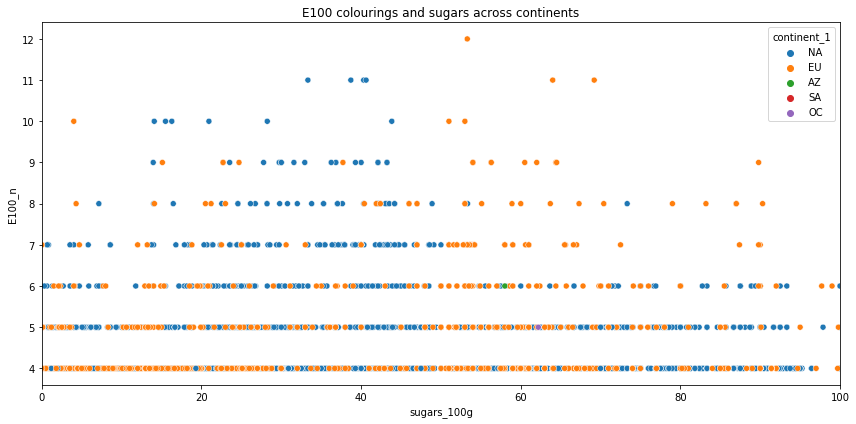

In [133]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='sugars_100g', y='E100_n', data=E100_rich_noduplis, hue= 'continent_1')
plt.title('E100 colourings and sugars across continents')
plt.xlim(0,100)
plt.tight_layout()
plt.show();

--> it looks like sugar-rich and E100-rich foods are more likely to be from NA than EU...? Let's try to get some numbers on this.

In [134]:
t = pd.DataFrame(E100_grouby_cont.size()).unstack()
t['tot'] = t.sum(axis=1, skipna=True)
t['ref'] =nutri_cleaned_df.groupby('continent_1').size()[1:7] #total number of products per continent
t['%colored products'] = t.tot/t.ref*100 #percentage of total products that have 4 or more E100 colour additives
t

0                                                      \
E100_n          4.0    5.0    6.0   7.0   8.0   9.0 10.0 11.0 12.0 14.0   
continent_1                                                               
AZ              1.0    NaN    1.0   1.0   NaN   NaN  NaN  NaN  NaN  NaN   
EU            407.0  191.0   94.0  62.0  33.0  15.0  4.0  2.0  1.0  1.0   
NA           2237.0  887.0  217.0  96.0  34.0  17.0  6.0  4.0  NaN  NaN   
OC              NaN    1.0    NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN   
SA              NaN    NaN    NaN   1.0   NaN   NaN  NaN  NaN  NaN  NaN   

                tot     ref %colored products  
E100_n                                         
continent_1                                    
AZ              3.0    1987          0.150981  
EU            810.0  158255          0.511832  
NA           3498.0  172828          2.023978  
OC              1.0    1994          0.050150  
SA              1.0     799          0.125156

**-->yes, seen like this _(but !! without proper statistical testing)_, a higher percentage of foods from North America (2%) contain E100 food colouring additives than EU products (0.5%)**

#### Extract a list of all the E100 additives in each product, and save it as a new variable

In [135]:
nutri_cleaned_df['E100_list'] = nutri_cleaned_df['additives_tags'].str.findall(E100_regex).tolist()

*To be honest, what I would have liked to do is:*
- take each list of E100s in the `E100_list` series (where available) and check whether any e100 string in the list was in the suspicious food colouring list (see above):
`bad_guys = set(['e102', 'e104', 'e110', 'e122', 'e124', 'e129'])`
...but I couldn't get the iteration to work, because of floats? I figured it was because NaNs in the `E100_list` series are considered floats, but even after adding a condition for that, it didn't work... **I'd love to solve that though!** :-)

# TASK C: TEXT DATA

In [136]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string
import re
from collections import Counter
import operator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kerstin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Cleaning the strings `ingredients_text` variable
The `ingredients_text` is messy, with most entries in English, but not all of them! 
It's a column with type "object", ie strings, which is as expected.

Try a rough estimate of number of anglophone entries, and rum "sample" a few times to check that we can conclude they're indeed in English.
Also, estimate number of empty entries (`isnull()`)

In [137]:
#going back to using first data frame:
first_df[(first_df['country_1']== 'United States')|(first_df['country_1']== 'United Kingdom')].shape # result is (176344, 163)
first_df[(first_df['country_1']== 'United States')|(first_df['country_1']== 'United Kingdom')]['ingredients_text'].isnull().sum()

2672

**This indicates that 50% of the data should have ingredients_text column in English.**
...that's a good deal, but it's not 100%, far from it! So this has to be taken into account when counting the most common ingredients.
We knew from Task A that there were NaN entries, these will have to be cleaned out.

In [138]:
random_eng = first_df[(first_df['country_1']== 'United States')|(first_df['country_1']== 'United Kingdom')]['ingredients_text'].sample(frac=0.01)
random_idx_eng = random_eng.index
#this shows it's ok to consider that the US and UK entries have ingredients_text in English
#let's print a few ingredients list completely to see what should be cleaned.
for index in random_idx_eng:
    print(random_eng[index])

Rice flour, white kindly beans, water, sugar, kiwifruit puree, maltose rice syrup, baking soda, citric acid.
Gravy: water,salt, dextrose, beef fat, hydrolyzed soy protein, maltodextrin, sugar, onion powder, hydrolyzed corn, torula and brewers yeast protein, caramel color, spices, natural flavor, disodium inosinate and disodium guanylate. contains 2% or less of spices (including basil and oregano), red bell pepper, corn starch, citric acid, garlic, soybean oil, polysorbate 80, ethyl alcohol, extractive of garlic., seasoned cooked roast beef: water, seasoning [salt, hydrolyzed soy protein, sodium phosphate, sugar, sodium citrate, hydrolyzed corn protein, sodium diacetate, onion powder, natural flavors (including oregano, basil and garlic).
Milk, vitamin d3
Spices (including chili pepper, cumin, paprika, oregano), onion, whey (milk), salt, garlic, sugar, potato starch, and natural flavor.
Almonds, dried cranberries (cranberries, sugar), macadamias, honey, non gmo glucose, crisp rice, chic

The `ingredients_text` entries in English need to be cleaned, but they don't look too bad :-)

Can the same be said of the "non-English" entries?

In [139]:
first_df[(first_df['country_1']!= 'United States')&(first_df['country_1']!= 'United Kingdom')]['ingredients_text'].isnull().sum() #53681!!
first_df[(first_df['country_1']!= 'United States')&(first_df['country_1']!= 'United Kingdom')]['ingredients_text'].shape #161893

(161893,)

In [140]:
random_not_eng = first_df[(first_df['country_1']!= 'United States')&(first_df['country_1']!= 'United Kingdom')]['ingredients_text'].sample(frac=0.01)
random_idx_not_eng = random_not_eng.index
for index in random_idx_not_eng:
    print(random_not_eng[index])

yogourt maigre (lait écrémé, protéines du lait ), mélange de céréales et fruits 11.1% (flocons d'avoine, sucre brut, huile de tournesol, crispies [maïs, riz, sucre brut, farine complète (blé, seigle, orge), malte d'orge, sel de cuisine, poudre de cacao], farine de blé et seigle, flocons de coco, fraise et framboise lyophilisées, germes de blé, dextrose, noisette grillée, miel, sel de cuisine), fibres alimentaires (inuline), édulcorant: aspartame. Contient une source de phénylalanine.
nan
Olives noires à la grecque, herbes de Provence, huile de colza, sel.
nan
jus de coing, sucre, eau, gélifiant E 440, acidifiant: E 330
_Lait_ et _crème_ pasteurisée.
nan
NUTRITIONNELLES POUR G Ewqie dont Glucides dont Protéx
Céréales 58 % [semoule de riz, farine de _blé_, farine d'_avoine_, farine complète de _blé_], fourrage au chocolat au _lait_ 35 % [sucre, graisses végétales (tournesol, coco), chocolat au _lait_ 5,3 % (pâte de cacao, _lait_ entier en poudre, cacao maigre en poudre, sucre), _lait_ éc

**these "non-english" entries are considerably messier!**

- most of the NaN entries are among them (53681) ; 53681 + 2672 (NaN for English entries) = tot. 56353
- more generally: ?? character encoding? is everything that messy from the start, or did parsing affect the representation of odd characters/ accents `é` etc? 
*`encoding='utf-8'` is the default for parsing of strings in csv file, so I don't think the parsing per se was a problem..?*

### What can be normalized and cleaned in `ingredients_text`:

- remove NaN entries
- transform everything to lowercase
- remove Exxx additives (or E xxx with space)
- remove &quot (from wrong encoding I guess)
- remove _ - * () {} [] , : ; 
- remove % numbers? In that case, remove 0%, 00%, 0,0%, 00,0% (and for good measure, also 0,00% and 00,00%)
- remove x(x) g.. or remove all digits \d+ (after cleaning % above) and \bg\b separately 
- remove #digit (found in English food colorings: ex red #smth) ---> can be done by adding # to symbols/punct above, and then removing the rest with the digit regex
- remove hyperlinks www.smth.xxx (regex www\.\S+)

In [141]:
ingr_df = first_df[['num_code', 'product_name', 'country_1', 'ingredients_text']].copy()
ingr_df.shape
ingr_df = ingr_df[ingr_df['ingredients_text'].notnull()]
ingr_df.shape #(281884, 4)
ingr_df.head()

num_code                       product_name      country_1  \
1    4530.0     Banana Chips Sweetened (Whole)  United States   
2    4559.0                            Peanuts  United States   
3   16087.0             Organic Salted Nut Mix  United States   
4   16094.0                    Organic Polenta  United States   
5   16100.0  Breadshop Honey Gone Nuts Granola  United States   

                                    ingredients_text  
1  Bananas, vegetable oil (coconut oil, corn oil ...  
2  Peanuts, wheat flour, sugar, rice flour, tapio...  
3  Organic hazelnuts, organic cashews, organic wa...  
4                                    Organic polenta  
5  Rolled oats, grape concentrate, expeller press...

In [142]:
ingr_df['ingredients_text'] = ingr_df['ingredients_text'].str.lower()

In [143]:
#define patterns / regex that we want to clean from `ingredients_text`:
patterns = ['(E\s?\d\d\d)',# E xxx additives
            '(\d{1,3}[,\.]?\d{0,2}\s?%)', # percentages
            '(&quot)', #encoding problem spotted
            '(www\.\S+)', #hyperlinks (there are very few)
            '([*_@#-.(){}&:])', #all extra symbols- order matters! otherwise hyperlink pattern doesn't work 
            '(kJ|kcal)',
            '(\d+)', # all remaining digits
            '(organic)',
            '(agriculture biologique)',
            '(ingr[ée]diente?s?)',
            '(natur[ea]l)',
            '(artifici[ea]l)',
            '(powder)',
            '(poudre)',
            '(\s)(?=acid)' #the idea is to glue acid to whatever comes before, for word count below (otherwise we just get anonymous "acid")
            ]

In [144]:
ingr_text = ingr_df['ingredients_text']
for i in range(len(patterns)):
        ingr_text = ingr_text.str.replace(patterns[i], '')
ingr_text

1         bananas vegetable oil coconut oil corn oil and...
2         peanuts wheat flour sugar rice flour tapioca s...
3          hazelnuts  cashews  walnuts almonds  sunflowe...
4                                                   polenta
5         rolled oats grape concentrate expeller pressed...
7         org oats org hemp granola org oats evaporated ...
8          chocolate liquor  raw cane sugar  cocoa butte...
9          expeller pressed refined high oleic sunflower...
10                                             adzuki beans
11                       refined durum semolina wheat flour
12        roasted peanuts peanuts peanut or canola oil s...
13                                        golden flax seeds
14         dry roasted pumpkin seeds tamari soybeans wat...
15         rolled oats honey raisins almonds sunflower s...
16                                            raw hazelnuts
17                              bananas  coconut oil  sugar
18                                      

### Manually define a `repl_dict` dictionary that replaces:
- frequently occurring non-English words (basically as they appeared in an initial "top 20" of most frequent words)
- "sodium" with "salt", because the sodium values are contained within the "salt" values in nutritional value descriptions

In [145]:
repl_dict = {'sel': 'salt', 'sucre': 'sugar', 'blé':'wheat', 'sodium': 'salt', 'eau': 'water', 'lait': 'milk', 'huile': 'oil'} #sodium replaced with "salt"
for k,v in repl_dict.items():
    ingr_text = ingr_text.str.replace(k, v)
ingr_text

1         bananas vegetable oil coconut oil corn oil and...
2         peanuts wheat flour sugar rice flour tapioca s...
3          hazelnuts  cashews  walnuts almonds  sunflowe...
4                                                   polenta
5         rolled oats grape concentrate expeller pressed...
7         org oats org hemp granola org oats evaporated ...
8          chocolate liquor  raw cane sugar  cocoa butte...
9          expeller pressed refined high oleic sunflower...
10                                             adzuki beans
11                       refined durum semolina wheat flour
12        roasted peanuts peanuts peanut or canola oil s...
13                                        golden flax seeds
14         dry roasted pumpkin seeds tamari soybeans wat...
15         rolled oats honey raisins almonds sunflower s...
16                                            raw hazelnuts
17                              bananas  coconut oil  sugar
18                                      

In [146]:
ingr_df['ingredients_text'] = ingr_text
ingr_df.head()
ingr_df.shape #(281884, 4)

(281884, 4)

## 1. Split and count words without translation
- split the strings
- make a list from split strings
- create a flattened list from all string lists in series
- count word occurrences in flattened list

In [147]:
stopwords_english = stopwords.words('english')
stopwords_french = stopwords.words('french') #that's because, if I remember correctly, some french stopword-like short word appeared early in the top occurring ingredients... :-) So this was an easy "fix".
some_ingr_list = ingr_text.str.split().values.tolist()
some_ingr_list
some_ingr_flat_list = [ingr for sublist in some_ingr_list for ingr in sublist if ingr not in stopwords_english if ingr not in stopwords_french]
some_ingr_flat_list
c1 = Counter(some_ingr_flat_list).most_common(5)

In [148]:
c1

[('salt', 263824),
 ('sugar', 158116),
 ('water', 134230),
 ('oil', 129981),
 ('milk', 116955)]

In [149]:
# what kind of oil? (we could have done the same as for "acid") --> there are many different kinds of oil, and I believe it's justified to count several occurrences of "oil" in the same ingredients list... :-)
ingr_text.str.findall('(\w+)(?=\soil)')

1         [vegetable, coconut, corn, palm]
2                                       []
3                              [sunflower]
4                                       []
5                                 [canola]
7                                 [canola]
8                                       []
9                              [sunflower]
10                                      []
11                                      []
12                     [canola, sunflower]
13                                      []
14                                      []
15                             [safflower]
16                                      []
17                               [coconut]
18                                      []
19                                      []
20                                      []
21          [canola, sunflower, sunflower]
22                                [canola]
23                                [canola]
24                                  [palm]
25         

In [150]:
c2 = dict(Counter(some_ingr_flat_list).most_common(5))
c2
c3 = pd.DataFrame(c2.items(), columns = ['ingredient', 'count'])
c3['percentage'] = c3['count']/ingr_df.shape[0]*100 #in other words: what's the percentage of products (ingredients list) that contain this ingredient?
c3

ingredient   count  percentage
0       salt  263824   93.593109
1      sugar  158116   56.092577
2      water  134230   47.618879
3        oil  129981   46.111521
4       milk  116955   41.490471

**--> from these results we can conclude:**
- we pay for a lot of salt, sugar and water :-)
- it seems unnecessary to go to trouble of translating non-english entries**

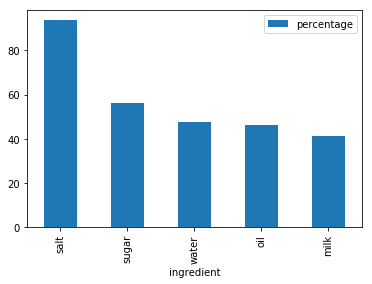

In [151]:
c3.plot.bar(x='ingredient', y='percentage')
plt.show;

## 2. Just for fun: what if we translate "non-english" entries...?

In [152]:
ingr_non_en = first_df[(first_df['country_1']!='United States') & (first_df['country_1']!='United Kingdom')]['ingredients_text']

In [153]:
ingr_non_en.shape #(177776,)
ingr_non_en = ingr_non_en[ingr_non_en.notnull()]
ingr_non_en.shape

(108212,)

In [154]:
ingr_non_en = ingr_non_en.str.lower()
for i in range(len(patterns)):
        ingr_non_en = ingr_non_en.str.replace(patterns[i], '')
ingr_non_en

176         laitue vinaigrette huile de canola eau ail j...
177        pâte farine eau beurre sucre cassonade levure...
182         pâte farine margarines dhuile de palme et de...
183                        farine eau sel levure orge malté
184                                        lentilles vertes
185       eau gazéifiée sirop de maïs à haute teneur en ...
186       sucre farine de blé graisse et huiles végétale...
187         garniture substances laitières jambon porc b...
190       thé noir aromatisé à la fleur de violette et p...
191       thé noir de chine zestes doranges  arômes s ca...
192       sirop saveur pistache  cl  sirop  sucre crista...
193       farine de blé gluten sucre de canne pépites de...
199                     vin rouge sec contient des sulfites
223       zucker kakaomasse kakaobutter vollmilchpulver ...
226                                                        
231       eau gazéifiée sucre colorant caramel edacidifi...
238       eau azéifiée ; sucre  colorant

In [155]:
stopwords_german = stopwords.words('german')
stopwords_french = stopwords.words('french')
non_en_ingr_list = ingr_non_en.str.split().values.tolist()
non_en_ingr_list
non_en_ingr_flat_list = [ingr for sublist in non_en_ingr_list for ingr in sublist if ingr not in stopwords_german if ingr not in stopwords_french]
#len(non_en_ingr_flat_list) result 2647310

In [156]:
import googletrans
from googletrans import Translator
translator = Translator()
ingr_non_en_sample = non_en_ingr_flat_list[0:1000]

**!!** The code below sometimes results in following error message:

**ReadTimeout: The read operation timed out**

This step can definitely be skipped without creating a problem, it was a "proof of principle" to show that it didn't change the results for the most common ingredients.

In [157]:
#this sometimes results in 
sample_non_en_translated = [translator.translate(word).text for word in ingr_non_en_sample]

In [158]:
c1 = Counter(sample_non_en_translated).most_common(6)
c1

[('e', 24),
 ('cell', 22),
 ('sugar', 22),
 ('aroma', 18),
 ('sodium', 17),
 ('syrup', 17)]

This was just a sample, and translation's not optimal (cell = sel :-) ), but basically it shows that it doesn't radically change result without translation.

# TASK D: TIME-SERIES ANALYSIS

In [159]:
df_times = first_df[['num_code', 'creator','created_t','created_datetime','last_modified_t', 'last_modified_datetime', 'product_name']].copy()
df_times.shape #356027, 8
df_times.head()


num_code                     creator   created_t      created_datetime  \
0    3087.0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1    4530.0             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2    4559.0             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3   16087.0             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4   16094.0             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir  
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)  
2      1489069957   2017-03-09T14:32:37Z                         Peanuts  
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix  
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta

In [160]:
df_times.dtypes

num_code                  float64
creator                    object
created_t                  object
created_datetime           object
last_modified_t            object
last_modified_datetime     object
product_name               object
dtype: object

In [161]:
df_times.isnull().sum()

num_code                  0
creator                   2
created_t                 0
created_datetime          1
last_modified_t           0
last_modified_datetime    0
product_name              0
dtype: int64

## Times (in Unix units) and Datetimes: convert to datetime data type

Based on "isnull" analysis, there are none or very few (in 'created_datetime' column) empty entries. 
But!!!! **dtype for these columns is "object" and not Datetime!**

Which must mean that there are erroneous entries/wrong data type (other than the 10 NaNs below).

--> set out to check that all valid datetimes are in same format and then use regex/string pattern recognition to keep only these.
Format is: yyyy-mm-ddThh:mm:ssZ

So here is more on the presence of "Z" at the end of these dates:

    (found on StackOverflow): Maybe the "K" format specifier would be of some use. This is the only one that seems to mention the use of capital "Z".

    "Z" is kind of a unique case for DateTimes. The literal "Z" is actually part of the ISO 8601 datetime standard for UTC times. When "Z" (Zulu) is tacked on the end of a time, it indicates that that time is UTC, so really the literal Z is part of the time. This probably creates a few problems for the date format library in .NET, since it's actually a literal, rather than a format specifier.


In [162]:
df_times[df_times['created_datetime'].isnull()]

num_code   creator created_t created_datetime last_modified_t  \
192048  3.017760e+12  marianne         0              NaN      1488992055   

       last_modified_datetime                product_name  
192048   2017-03-08T16:54:15Z  Lulu la barquette (Fraise)

In [163]:
datetime_regex = '\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}Z'

In [164]:
datetime_sample = df_times.sample(n=300)
datetime_sample['last_modified_datetime'].str.contains(datetime_regex).sum() #proof of principle for big filter below :-)

300

We want to keep only:

- datetime entries that correspond to identified format yyyy-mm-dd etc (see above)
- records with **both** creation and modification datetimes (otherwise we can't complete CP task)

In [165]:
df_times = df_times[(df_times['created_datetime'].str.contains(datetime_regex)) & (df_times['last_modified_datetime'].str.contains(datetime_regex))]
df_times.shape #356000, 7
df_times.dtypes #still "object" type, of course, we'll need to convert that
df_times.head(50)
df_times.tail(50)

num_code                     creator   created_t  \
355961  9.780017e+12                      k13b3r  1492101528   
355963  9.780201e+12                  agamitsudo  1462029181   
355964  9.780201e+12                          hg  1488617055   
355965  9.780221e+12                  jerem26260  1504378030   
355966  9.780546e+12  openfoodfacts-contributors  1500226083   
355967  9.780546e+12                  jerem26260  1504378175   
355968  9.780804e+12             usda-ndb-import  1489069944   
355970  9.782012e+12                     kiliweb  1499810845   
355971  9.782092e+12                     kiliweb  1496600202   
355972  9.782203e+12                     kiliweb  1495985920   
355973  9.782211e+12                     kiliweb  1489003558   
355974  9.782226e+12                     kiliweb  1505392509   
355975  9.782401e+12                     kiliweb  1491508021   
355977  9.782746e+12                     kiliweb  1504285120   
355978  9.782804e+12                     kiliweb  1505503122   
355979  9.782812e+12                     kiliweb  1503745692   
355980  9.782812e+12                     kiliweb  1499617591   
355981  9.782816e+12                     kiliweb  1500917476   
355982  9.782849e+12                     kiliweb  1492812441   
355983  9.782915e+12                 fabienne411  1495015860   
355984  9.786144e+12                     tacinte  1501610767   
355985  9.787461e+12             usda-ndb-import  1489092300   
355988  9.788468e+12  openfoodfacts-contributors  1504710599   
355989  9.788470e+12  openfoodfacts-contributors  1504710441   
355990  9.788470e+12  openfoodfacts-contributors  1504710581   
355991  9.788470e+12  openfoodfacts-contributors  1504710482   
355992  9.788490e+12  openfoodfacts-contributors  1504707364   
355994  9.789023e+12  openfoodfacts-contributors  1502274885   
355995  9.789962e+12  openfoodfacts-contributors  1493651075   
355997  9.791464e+12                    scailyna  1395513393   
356003  9.820111e+12  openfoodfacts-contributors  1432669316   
356004  9.836654e+12             usda-ndb-import  1489055289   
356005  9.847548e+12                   drmalabar  1437817626   
356008  9.876568e+12  openfoodfacts-contributors  1472253428   
356010  9.900000e+12                     kiliweb  1491079938   
356011  9.900010e+12                    jeanbono  1375778997   
356012  9.901198e+12  openfoodfacts-contributors  1450594133   
356013  9.901942e+12               gaspardbenoit  1493544769   
356014  9.904417e+07             date-limite-app  1421873458   
356015  9.906410e+12                  agamitsudo  1373480408   
356016  9.908279e+12                       andre  1360585770   
356017  9.911125e+07                    balooval  1367163039   
356018  9.918000e+03                  woshilapin  1430167954   
356019  9.935010e+12                    sebleouf  1446293229   
356021  9.948283e+12  openfoodfacts-contributors  1490631299   
356022  9.956745e+07             usda-ndb-import  1489059076   
356023  9.970230e+12                      tomato  1422099377   
356024  9.977472e+12  openfoodfacts-contributors  1497018549   
356025  9.980283e+12  openfoodfacts-contributors  1492340089   
356026  9.999900e+11             usda-ndb-import  1489072709   

            created_datetime last_modified_t last_modified_datetime  \
355961  2017-04-13T16:38:48Z      1492101769   2017-04-13T16:42:49Z   
355963  2016-04-30T15:13:01Z      1462425498   2016-05-05T05:18:18Z   
355964  2017-03-04T08:44:15Z      1488617103   2017-03-04T08:45:03Z   
355965  2017-09-02T18:47:10Z      1504379557   2017-09-02T19:12:37Z   
355966  2017-07-16T17:28:03Z      1500228496   2017-07-16T18:08:16Z   
355967  2017-09-02T18:49:35Z      1504379474   2017-09-02T19:11:14Z   
355968  2017-03-09T14:32:24Z      1489069945   2017-03-09T14:32:25Z   
355970  2017-07-11T22:07:25Z      1499810850   2017-07-11T22:07:30Z   
355971  2017-06-04T18:16:42Z      1496600206   2017-06-04T18:16:46Z   
355972  2017-05-28T15:38:40Z      149

In [166]:
df_times['created_datetime'] = pd.to_datetime(df_times['created_datetime'])
df_times['last_modified_datetime'] = pd.to_datetime(df_times['last_modified_datetime'])
df_times.dtypes ### youpiiiie, ça marche! Z means it's UTC

num_code                              float64
creator                                object
created_t                              object
created_datetime          datetime64[ns, UTC]
last_modified_t                        object
last_modified_datetime    datetime64[ns, UTC]
product_name                           object
dtype: object

## Time difference between creation of entry and last modification?

In [167]:
df_times['time_delta'] = df_times['last_modified_datetime'] - df_times['created_datetime']
df_times.tail()

num_code                     creator   created_t  \
356022  9.956745e+07             usda-ndb-import  1489059076   
356023  9.970230e+12                      tomato  1422099377   
356024  9.977472e+12  openfoodfacts-contributors  1497018549   
356025  9.980283e+12  openfoodfacts-contributors  1492340089   
356026  9.999900e+11             usda-ndb-import  1489072709   

                created_datetime last_modified_t    last_modified_datetime  \
356022 2017-03-09 11:31:16+00:00      1491244499 2017-04-03 18:34:59+00:00   
356023 2015-01-24 11:36:17+00:00      1491244499 2017-04-03 18:34:59+00:00   
356024 2017-06-09 14:29:09+00:00      1500730305 2017-07-22 13:31:45+00:00   
356025 2017-04-16 10:54:49+00:00      1492340089 2017-04-16 10:54:49+00:00   
356026 2017-03-09 15:18:29+00:00      1491244499 2017-04-03 18:34:59+00:00   

                                             product_name        time_delta  
356022  Mint Melange Tea A Blend Of Peppermint, Lemon ...  25 days 07:03:43  
356023                                            乐吧泡菜味薯片 800 days 06:58:42  
356024                                      Biscottes bio  42 days 23:02:36  
356025                           Tomates aux Vermicelles    0 days 00:00:00  
356026                    Sugar Free Drink Mix, Peach Tea  25 days 03:16:30

In [168]:
df_times.dtypes

num_code                              float64
creator                                object
created_t                              object
created_datetime          datetime64[ns, UTC]
last_modified_t                        object
last_modified_datetime    datetime64[ns, UTC]
product_name                           object
time_delta                    timedelta64[ns]
dtype: object

In [169]:
df_times.describe()

num_code                time_delta
count  3.382360e+05                    338236
mean   3.348184e+32  111 days 04:41:03.279370
std    1.947044e+35  288 days 07:12:30.596682
min    1.000000e+00           0 days 00:00:00
25%    7.003864e+10           0 days 00:00:00
50%    8.462260e+11           0 days 00:00:01
75%    3.560071e+12    8 days 19:23:01.250000
max    1.132363e+38        2033 days 13:40:59

In [170]:
df_times['time_delta'].median()

Timedelta('0 days 00:00:01')

**--> the mean time difference is 108 days 03:35:07.638426... **

But **!!! it doesn't mean much**, as shown by the std (283 days....), and the median (=0!).
The mean is heavily affected by outliers (see violin plot below).**

In [171]:
df_times['creator'].value_counts(dropna=False)[:20]

usda-ndb-import               169707
openfoodfacts-contributors     39128
kiliweb                        36341
date-limite-app                10488
openfood-ch-import              8468
tacite                          7866
sebleouf                        6282
tacinte                         3339
javichu                         2766
stephane                        2336
twoflower                       1980
agamitsudo                      1970
teolemon                        1878
jeanbono                        1843
miles67off                      1425
segundo                         1408
foodorigins                     1267
kakao                           1059
aleene                          1028
bleakpatch                      1001
Name: creator, dtype: int64

### Plotting of timedelta values
!! timedelta values cannot be plotted as is (or at least, it creates problems with the 0 values).
Found solution on Stackoverflow... (not sure I understand why this is radically different from the timedelta values in [ns] that have been calculated... :-)

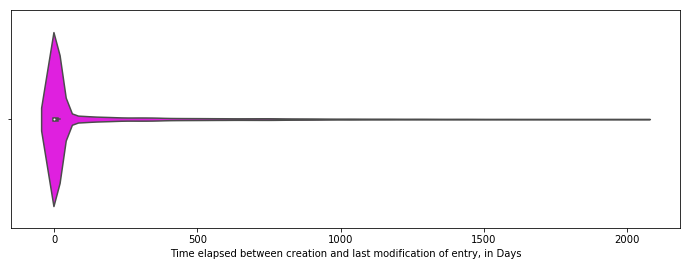

In [172]:
plt.figure(figsize=(12,4))
sns.violinplot(x=df_times['time_delta'].astype('timedelta64[D]'), color='magenta')
plt.xlabel('Time elapsed between creation and last modification of entry, in Days')
plt.show;

This shows that the very large majority of entries (>75%) have not been modified after the first creation of the entry.

--> filter values for timedelta >250, and look at distribution and contributors

In [173]:
time_delta_250 = df_times[df_times['time_delta'].astype('timedelta64[D]') >= 250]
time_delta_250.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46144 entries, 108 to 356023
Data columns (total 8 columns):
num_code                  46144 non-null float64
creator                   46143 non-null object
created_t                 46144 non-null object
created_datetime          46144 non-null datetime64[ns, UTC]
last_modified_t           46144 non-null object
last_modified_datetime    46144 non-null datetime64[ns, UTC]
product_name              46144 non-null object
time_delta                46144 non-null timedelta64[ns]
dtypes: datetime64[ns, UTC](2), float64(1), object(4), timedelta64[ns](1)
memory usage: 3.2+ MB


In [174]:
len(time_delta_250['creator'].unique())

1996

**So this means that the entries updated 8 months and more after creation are not from just a few sources.**

Let's do the same for the unmodified entries.

In [175]:
time_delta_0 = df_times[df_times['time_delta'].astype('timedelta64[D]')<1]
time_delta_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239565 entries, 0 to 356025
Data columns (total 8 columns):
num_code                  239565 non-null float64
creator                   239565 non-null object
created_t                 239565 non-null object
created_datetime          239565 non-null datetime64[ns, UTC]
last_modified_t           239565 non-null object
last_modified_datetime    239565 non-null datetime64[ns, UTC]
product_name              239565 non-null object
time_delta                239565 non-null timedelta64[ns]
dtypes: datetime64[ns, UTC](2), float64(1), object(4), timedelta64[ns](1)
memory usage: 16.4+ MB


In [176]:
len(time_delta_0['creator'].unique())

2055

**This means that it's not just a few "mega-contributors" that have uploaded loads of data in one go and then never bothered modifying the entries again**


## What's the full timeline of the data? (In terms of creation date, to answer second part of task question).

if we want to convert created_datetime to datetime index, use df=df.set_index('datetime_col')

In [177]:
df_times['created_datetime'].min()

Timestamp('2012-01-31 14:43:58+0000', tz='UTC')

In [178]:
df_times['created_datetime'].max()

Timestamp('2017-09-18 01:35:39+0000', tz='UTC')

So this means that full timeline of data is:

- start: jan 2012 (although partial.. cuz it started on Jan 31)
- end: sept 2017

In [179]:
df_times_index = df_times.set_index('created_datetime')
df_times_index.head()
df_times_index.tail()

num_code                     creator  \
created_datetime                                                      
2017-03-09 11:31:16+00:00  9.956745e+07             usda-ndb-import   
2015-01-24 11:36:17+00:00  9.970230e+12                      tomato   
2017-06-09 14:29:09+00:00  9.977472e+12  openfoodfacts-contributors   
2017-04-16 10:54:49+00:00  9.980283e+12  openfoodfacts-contributors   
2017-03-09 15:18:29+00:00  9.999900e+11             usda-ndb-import   

                            created_t last_modified_t  \
created_datetime                                        
2017-03-09 11:31:16+00:00  1489059076      1491244499   
2015-01-24 11:36:17+00:00  1422099377      1491244499   
2017-06-09 14:29:09+00:00  1497018549      1500730305   
2017-04-16 10:54:49+00:00  1492340089      1492340089   
2017-03-09 15:18:29+00:00  1489072709      1491244499   

                             last_modified_datetime  \
created_datetime                                      
2017-03-09 11:31:16+00:00 2017-04-03 18:34:59+00:00   
2015-01-24 11:36:17+00:00 2017-04-03 18:34:59+00:00   
2017-06-09 14:29:09+00:00 2017-07-22 13:31:45+00:00   
2017-04-16 10:54:49+00:00 2017-04-16 10:54:49+00:00   
2017-03-09 15:18:29+00:00 2017-04-03 18:34:59+00:00   

                                                                product_name  \
created_datetime                                                               
2017-03-09 11:31:16+00:00  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
2015-01-24 11:36:17+00:00                                            乐吧泡菜味薯片   
2017-06-09 14:29:09+00:00                                      Biscottes bio   
2017-04-16 10:54:49+00:00                           Tomates aux Vermicelles    
2017-03-09 15:18:29+00:00                    Sugar Free Drink Mix, Peach Tea   

                                 time_delta  
created_datetime                             
2017-03-09 11:31:16+00:00  25 days 07:03:43  
2015-01-24 11:36:17+00:00 800 days 06:58:42  
2017-06-09 14:29:09+00:00  42 days 23:02:36  
2017-04-16 10:54:49+00:00   0 days 00:00:00  
2017-03-09 15:18:29+00:00  25 days 03:16:30

In [180]:
df_times_index_sorted = df_times_index.sort_index() #actually the sorting is not necessary for groupby, originally I did it for rolling window solution...
entries_by_month = df_times_index_sorted.groupby(pd.Grouper(freq='1M')).size()

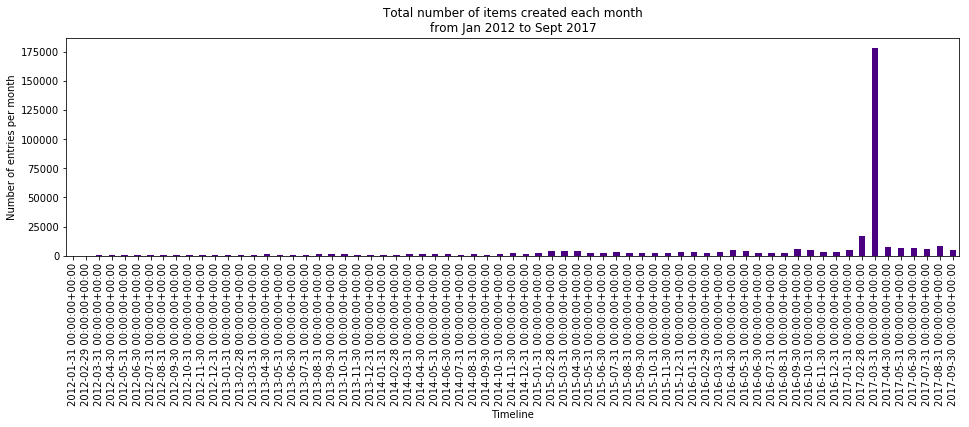

In [181]:
ax = entries_by_month.plot(kind='bar', figsize=(16,4), color='indigo')
ax.set_ylabel('Number of entries per month')
ax.set_title('Total number of items created each month\nfrom Jan 2012 to Sept 2017')
ax.set_xlabel('Timeline')
plt.show;

**--> the highest rate of entry creation was in February and March 2017.**

We can zoom in on the rest of the entries (dwarfed by the first trimester of 2017), by changing ylim:

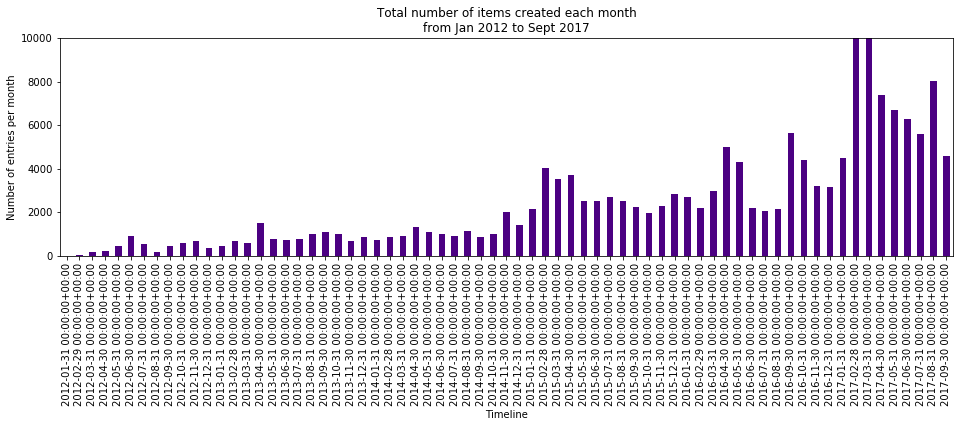

In [182]:
ax = entries_by_month.plot(kind='bar', figsize=(16,4), color='indigo')
ax.set_ylabel('Number of entries per month')
ax.set_title('Total number of items created each month\nfrom Jan 2012 to Sept 2017')
ax.set_xlabel('Timeline')
plt.ylim([0, 10000])
plt.xlabel('Timeline')
plt.show;

**--> this "zoom in" shows that the database somewhat "took off" as of Feb 2015.**

### Out of curiosity: is there one very active contributor in March 2017?

- filter dataset for March 2017
- count values for `creator` column

In [183]:
len(df_times_index_sorted['March 2017'].creator.unique()) #202 contributors active
df_times_index_sorted['March 2017'].creator.value_counts()[:4]

usda-ndb-import               169707
kiliweb                         5411
openfoodfacts-contributors      1279
date-limite-app                  724
Name: creator, dtype: int64

In [184]:
#just to check these entries are "true" ones and not a pile of empty rubbish
df_times_index_sorted['March 2017']['product_name'].isnull().sum() #result 597
df_times_index_sorted_march2017= df_times_index_sorted['March 2017']
df_times_index_sorted_march2017[df_times_index_sorted_march2017['product_name'].isnull()].creator.value_counts()

Series([], Name: creator, dtype: int64)

The quick check above showed that the "entry burst" in March 2017 was largely due to one creator (openfoodfacts-contributors), and yes some "empty entries" seem to have been created.


#### Just "for fun", try **`resample()`** with 1 Month sample size.

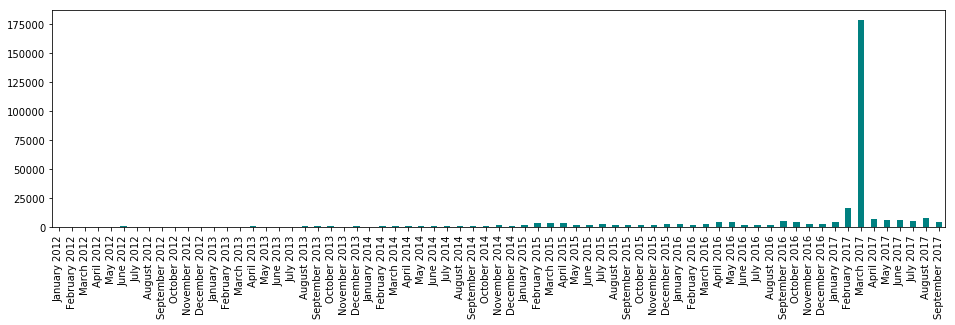

In [185]:
#try plotting resampled data, also to try to reformat index to more legible dates!
resampled_monthly = df_times_index_sorted.resample('1M').size()
resampled_monthly.index = resampled_monthly.index.strftime('%B %Y')
resampled_monthly.plot(kind='bar', figsize=(16,4), color='teal')
plt.show(); #these ticks and labels look nicer :-)

# TASK E: BUILD A DATABASE

In [186]:
import sqlite3

In [187]:
sql_df = nutri_cleaned_df.copy()
sql_df.drop(nutri_cleaned_df[nutri_cleaned_df.duplicated(subset='num_code')].index, inplace=True) #since we want to use the product bar code as a unique primary key, we need to remove duplicates first
sql_df = sql_df.sample(1000)[['num_code','created_datetime','product_name','nutrition-score-uk_100g']]
sql_df.rename(columns = {'num_code':'code','nutrition-score-uk_100g': 'nutrition_score'}, inplace = True) 
sql_df.shape

(1000, 4)

In [188]:
db = sqlite3.connect("nutridatabase1.db")

In [189]:
query= "CREATE TABLE first_table (code INTEGER PRIMARY KEY, created_datetime TEXT, product_name TEXT, nutrition_score INTEGER);"

In [190]:
cursor = db.cursor()

In [191]:
cursor.execute(query)

In [192]:
sql_df.to_sql(name='first_table', con=db, if_exists='append', index=False)

In [193]:
query1 = '''
SELECT * FROM first_table
WHERE nutrition_score < -4;
'''

In [194]:
cursor.execute(query1)
results = cursor.fetchall()
pd.DataFrame(results)

0                     1  \
0        20083601  2013-10-12T21:03:07Z   
1      7203671651  2017-03-09T20:21:11Z   
2     41318301342  2017-03-09T12:48:27Z   
3     41331024716  2017-03-09T13:50:50Z   
4     41415076532  2017-03-09T20:18:07Z   
5     52603094665  2017-03-09T12:30:15Z   
6     64721151205  2017-03-09T12:55:12Z   
7     73416508705  2017-03-09T12:49:54Z   
8     74333374305  2017-03-09T09:54:07Z   
9     77890336571  2017-03-10T08:29:56Z   
10   708820385184  2017-03-09T11:04:27Z   
11   742287605560  2017-03-09T17:12:16Z   
12   855019000745  2017-03-09T10:43:06Z   
13   879147003409  2017-03-10T08:38:36Z   
14  3038350013200  2016-03-01T17:28:32Z   
15  3222474221638  2014-01-30T21:46:58Z   
16  3273120027265  2017-09-06T08:22:18Z   
17  3350033197596  2015-01-24T17:49:09Z   
18  3380380077920  2017-07-09T09:25:44Z   
19  3560070322817  2014-05-18T16:15:52Z   
20  3564700586600  2013-06-30T17:47:58Z   
21  3564707103428  2015-06-10T20:40:02Z   
22  3580282816607  2016-07-21T17:02:12Z   
23  3596710449477  2017-09-16T14:29:54Z   
24  4250085778790  2016-06-02T20:56:30Z   
25  5013531000611  2017-03-09T12:54:59Z   
26  7617027953146  2016-04-11T12:46:48Z   
27  8032891769324  2017-08-06T10:52:10Z   
28  8076802085851  2015-02-28T04:18:14Z   

                                                    2  3  
0          Ensaladilla congelada &quot;Barnetti&quot; -8  
1                                     Baby Lima Beans -5  
2                                 Bronze Die Linguine -6  
3                                    Red Kidney Beans -6  
4                                     Baby Lima Beans -8  
5                               Burmese Tofu Chipotle -5  
6                         Zirsun Idaho Heirloom Beans -6  
7                      Family Farms, Tri- Color Blend -6  
8                      Quinoa Rica & Shine Hot Cereal -6  
9                                          Sweet Peas -7  
10                          True Goodness, Quick Oats -5  
11                                    Cranberry Beans -7  
12                                Rigatoni Fine Pasta -6  
13                                Minnesota Wild Rice -6  
14                                     Nouilles fines -6  
15                   Semoule semi-complète Bio Casino -5  
16                                 Flocons 4 céréales -6  
17     Cassoulet de Castelnaudary au confit de canard -5  
18  Epicerie / Céréales, Graines, Pâtes, Riz / Pât... -6  
19    Petits pois et carottes à l'étuvée (Extra-fins) -5  
20           Quinoa & Boulgour Duo céréale et graines -5  
21                             Ail Semoule Biologique -5  
22                           Champignons noirs séchés -6  
23                              Poêlée Thaï au Poulet -5  
24                            Pizza Tomaten gewürfelt -5  
25                                       Garam Masala -6  
26                                             Poires -7  
27                                      Spirale Blanc -5  
28                                    Barilla Gnocchi -5

In [195]:
query2 = '''
SELECT * FROM first_table
WHERE created_datetime < date('2017-01-01')
ORDER BY created_datetime;
'''

In [196]:
cursor.execute(query2)
results2 = cursor.fetchall()
pd.DataFrame(results2)

0                     1  \
0    8886303221012  2012-03-27T22:21:50Z   
1    5601721830034  2012-04-09T21:09:23Z   
2    3155250002575  2012-06-18T20:53:50Z   
3    3263850801617  2012-06-19T17:26:05Z   
4    8410036009090  2012-06-20T11:10:39Z   
5    3700311800722  2012-07-01T16:26:24Z   
6    3033710084913  2012-07-10T21:20:18Z   
7    3297386000213  2012-07-20T17:33:39Z   
8    2000000000377  2012-08-10T07:16:54Z   
9    8410199002402  2012-09-03T18:18:46Z   
10   8437009074787  2012-09-18T21:23:41Z   
11     66721010827  2012-10-14T18:10:01Z   
12   7290004915018  2012-10-20T20:25:38Z   
13   3250390243632  2012-11-04T12:49:11Z   
14   3396410151447  2012-11-30T18:28:32Z   
15   8437009386033  2012-12-21T00:31:59Z   
16   8423207000086  2013-01-16T20:33:39Z   
17   3229820763798  2013-01-25T21:36:27Z   
18   5413428049509  2013-03-02T22:24:20Z   
19   3564700010143  2013-03-11T17:47:23Z   
20   3564709002859  2013-03-11T19:09:06Z   
21   3222472194538  2013-04-15T01:25:16Z   
22   3080216004983  2013-04-25T17:29:11Z   
23   4710784962475  2013-04-28T16:31:25Z   
24   3760013550479  2013-05-19T20:10:12Z   
25   6001506900973  2013-06-13T16:33:21Z   
26   3564700586600  2013-06-30T17:47:58Z   
27   3560070532872  2013-07-10T10:16:06Z   
28   8002470010444  2013-07-10T17:38:14Z   
29         5514100  2013-07-22T01:06:34Z   
..             ...                   ...   
263  8002503403168  2016-09-23T18:15:08Z   
264  2000000036057  2016-09-24T22:18:25Z   
265  4062800000471  2016-09-25T12:37:08Z   
266  3021690026481  2016-09-26T13:46:11Z   
267  2110001649745  2016-09-29T10:17:37Z   
268  3518681007814  2016-09-29T11:02:00Z   
269  7614800277000  2016-10-03T11:42:00Z   
270  3264050268330  2016-10-04T11:16:45Z   
271  4000186014507  2016-10-04T14:48:53Z   
272  3250391151523  2016-10-14T09:19:15Z   
273  4029261003007  2016-10-14T19:21:52Z   
274  8056518031007  2016-10-16T10:33:52Z   
275  6070829902643  2016-10-17T18:06:16Z   
276  3760130560597  2016-10-21T11:13:11Z   
277  7616600712705  2016-10-22T16:39:14Z   
278  3116740032021  2016-10-29T10:34:40Z   
279  3071502161336  2016-11-02T15:20:38Z   
280       23685352  2016-11-03T21:34:16Z   
281       90424403  2016-11-05T17:26:02Z   
282  9300645111231  2016-11-09T03:50:49Z   
283  3503730052433  2016-11-12T16:16:27Z   
284  3700483800353  2016-11-19T09:37:26Z   
285  3144550010489  2016-11-20T20:09:41Z   
286  5060107460133  2016-11-23T17:01:11Z   
287  7614800235000  2016-12-02T11:18:03Z   
288    66188003103  2016-12-06T12:42:01Z   
289  3248650059963  2016-12-09T20:48:40Z   
290  3450970106436  2016-12-16T22:36:48Z   
291  3760062940641  2016-12-19T06:13:39Z   
292       20564858  2016-12-24T13:44:06Z   

                                                     2     3  
0                                        Crème de coco   NaN  
1                            Sardines à l'huile épicée   NaN  
2                                       Crème Anglaise   3.0  
3                       Muesli Croustillant aux fruits  13.0  
4                                         Cordon negro   NaN  
5            Vinaigre cristal (8% d'acidité) 1,5 litre   0.0  
6                                                Arome  12.0  
7                           Haricots rouges au boucané   NaN  
8                                        Hogaza de pan   NaN  
9    Aperitivo de patatas &quot;El Horno de Lay's&q...   8.0  
10                             Espinacas con garbanzos   2.0  
11                          Chapelure de Graham Crumbs  14.0  
12                          Guacamole - Crème d'avocat   NaN  
13                                      16 mini blinis  11.0  
14                                         Ours'o'choc   8.0  
15          Higos secos &quot;Frutas Los Galayos&quot;   NaN  
16     Tortitas de arroz con chocolate negro - 4 Packs  15.0  
17                             Sirop d'Agave Blond Bio  13.0  
18            Râble de saumon Atlantique fumé Lax Rygg  14.0  
19                          

In [197]:
query3 = '''
SELECT product_name FROM
(SELECT * FROM first_table
WHERE created_datetime < date('2017-01-01')) ;
'''

In [198]:
cursor.execute(query3)
results3 = cursor.fetchall()
pd.DataFrame(results3)

0
0                                     Chicken pad thaï
1                   Reduced Fat Creamy Caesar Dressing
2                              Chocolate peanut butter
3                              Simple mixed leaf salad
4                        chocolat  dessert  52% cacao 
5                              Riz soufflé au chocolat
6                                          Bami Goreng
7                  Sol & Mar olives noires dénoyautées
8           Ensaladilla congelada &quot;Barnetti&quot;
9             10 Pains au lait aux pépites de chocolat
10                      Smoothie pomme, banane, mangue
11                                Vollmilch-schokolade
12                                       Sésamo pelado
13                  Le Moelleux à Partager au Chocolat
14                               Vitelle Fruit & Fibre
15                                          Mandelinis
16                               Kalifornische Mandeln
17                               Grana Padano gerieben
18                                  Sirop de Grenadine
19         10 hachés ultra tendres (15 % MG), Surgelés
20                                  Mexican Salsa Tuna
21                                                 Zoo
22                                         Donauwellen
23                                 Miel de Chataignier
24                          Double concentré de tomate
25                                      Aceto di Miele
26                                      RedBull Orange
27                                               Cacao
28                                 Le décadent inversé
29                                       Smoked Turkey
..                                                 ...
263                                    Barilla Gnocchi
264                                       Cordon negro
265                       Tortilla Chips Crema y Onion
266  Aperitivo de patatas &quot;El Horno de Lay's&q...
267                         Galletas dibus Angry Birds
268                                   Risotto al curry
269                                             Callos
270    Tortitas de arroz con chocolate negro - 4 Packs
271                                    Sirope de agave
272                            Espinacas con garbanzos
273         Higos secos &quot;Frutas Los Galayos&quot;
274                                  Chocolate Postres
275                                       Sauce Burger
276                                    Szalámi és sajt
277                                Bugles nacho cheese
278                   Asian Gourmet Chips Lime & Onion
279                                       Sauce Burger
280                                   Mayonnaise calvé
281                                          Choco Pie
282                                       if fruitamin
283                                      Crème de coco
284  Coop Frische Tortelli mit Spinat-Mascarpone Fü...
285                                     Lime Marmalade
286          Roasted Garlic with Chunky Tomato & Onion
287                                       Tomato Juice
288            Mini 1 More Chocolate Coated Wafer Roll
289           quaker 100% natural oat and honey cereal
290                                            Attiéké
291                                            乐吧泡菜味薯片
292                                en: mince pork meat

[293 rows x 1 columns]

In [199]:
db.close()

# TASK F: FINDING CORRELATIONS

I'll compare the variables representing nutrition facts (`nutrient_100g`), which are continuous variables.
We'll also add the `nutrition-score-uk_100g` variable, which in practice is a discrete (ordered) variable, but is represented by a float value in the data frame and can in this context be considered as a continuous variable.

Use the `nutri_cleaned_df` cleaned data frame generated in Task A, where outliers have been removed.

1. compute a correlation matrix, using the Pearson method to compute a standard correlation coefficient (pairwise between all variables): 

   **!! this correlation coefficient only captures linear relationships!**
   visualize correlation coeff with ranked bar chart



In [200]:
#list of data frame columns that we want to analyse
corr_col = ['fat_100g',
 'saturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g', 
 'sodium_100g', 
 'alcohol_100g',
 'folates_100g',
 'fruits-vegetables-nuts_100g',
 'cocoa_100g',
 'nutrition-score-uk_100g']
len(corr_col)

17

In [201]:
corr_df = nutri_cleaned_df.copy()[corr_col]
corr_df.shape
corr_df.describe()

fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
count  275402.000000       260212.000000              22922.000000   
mean       12.736954            5.065384                 10.463155   
std        17.465763            7.861291                 16.736145   
min         0.000000            0.000000                  0.000000   
25%         0.100000            0.000000                  0.000000   
50%         5.200000            1.790000                  4.000000   
75%        20.000000            7.140000                 10.710000   
max       101.000000          100.000000                100.000000   

       polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count              22960.000000   142766.000000     143473.000000   
mean                   6.354720        0.067148          0.019634   
std                   10.895285        0.945670          0.318649   
min                    0.000000        0.000000          0.000000   
25%                    0.000000        0.000000          0.000000   
50%                    2.270000        0.000000          0.000000   
75%                    7.320000        0.000000          0.020000   
max                   98.000000      100.000000         95.238000   

       carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g  \
count       275114.000000  275408.000000  217783.000000  290055.000000   
mean            31.461082      15.620462       2.845218       7.141996   
std             28.965841      20.931783       4.670540       8.226842   
min              0.000000       0.000000       0.000000       0.000000   
25%              5.600000       1.200000       0.000000       0.710000   
50%             20.000000       5.400000       1.500000       4.800000   
75%             57.500000      23.330000       3.600000      10.000000   
max            105.000000     105.000000     105.000000     100.000000   

           salt_100g    sodium_100g  alcohol_100g  folates_100g  \
count  285943.000000  285906.000000   4473.000000   3032.000000   
mean        1.560670       0.614515      8.190867      0.014892   
std         6.250525       2.460970     10.934407      0.703245   
min         0.000000       0.000000      0.000000      0.000000   
25%         0.060000       0.023622      0.000000      0.000042   
50%         0.560000       0.220472      5.000000      0.000114   
75%         1.353820       0.533000     12.000000      0.000214   
max       104.866440      41.286000     97.900000     38.460000   

       fruits-vegetables-nuts_100g   cocoa_100g  nutrition-score-uk_100g  
count                  3222.000000  1376.000000            251435.000000  
mean                     33.430965    52.138009                 8.951256  
std                      32.917510    18.992122                 9.143371  
min                       0.000000     6.000000               -15.000000  
25%                       0.000000    33.000000                 1.000000  
50%                      25.000000    52.000000                 9.000000  
75%                      55.000000    70.000000                16.000000  
max                     100.000000   100.000000                37.000000

In [202]:
corr_matrix = corr_df.corr(method='pearson')
corr_matrix

fat_100g  saturated-fat_100g  \
fat_100g                     1.000000            0.692436   
saturated-fat_100g           0.692436            1.000000   
monounsaturated-fat_100g     0.866638            0.329219   
polyunsaturated-fat_100g     0.699681            0.226575   
trans-fat_100g               0.044856            0.023991   
cholesterol_100g             0.024483            0.048182   
carbohydrates_100g          -0.095212           -0.054583   
sugars_100g                 -0.055933            0.098192   
fiber_100g                   0.129674           -0.000687   
proteins_100g                0.222739            0.151651   
salt_100g                   -0.048180           -0.020943   
sodium_100g                 -0.048192           -0.020958   
alcohol_100g                -0.114648           -0.097956   
folates_100g                -0.000167            0.016701   
fruits-vegetables-nuts_100g -0.238821           -0.262726   
cocoa_100g                   0.538504            0.565628   
nutrition-score-uk_100g      0.595360            0.646536   

                             monounsaturated-fat_100g  \
fat_100g                                     0.866638   
saturated-fat_100g                           0.329219   
monounsaturated-fat_100g                     1.000000   
polyunsaturated-fat_100g                     0.423225   
trans-fat_100g                               0.036154   
cholesterol_100g                            -0.030344   
carbohydrates_100g                          -0.424844   
sugars_100g                                 -0.164127   
fiber_100g                                   0.073616   
proteins_100g                               -0.154383   
salt_100g                                   -0.116144   
sodium_100g                                 -0.116144   
alcohol_100g                                 0.125270   
folates_100g                                 0.016097   
fruits-vegetables-nuts_100g                 -0.282899   
cocoa_100g                                   0.328358   
nutrition-score-uk_100g                      0.358411   

                             polyunsaturated-fat_100g  trans-fat_100g  \
fat_100g                                     0.699681        0.044856   
saturated-fat_100g                           0.226575        0.023991   
monounsaturated-fat_100g                     0.423225        0.036154   
polyunsaturated-fat_100g                     1.000000        0.024950   
trans-fat_100g                               0.024950        1.000000   
cholesterol_100g                            -0.052031       -0.000722   
carbohydrates_100g                          -0.326898        0.015832   
sugars_100g                                 -0.184632        0.011128   
fiber_100g                                   0.103285        0.000011   
proteins_100g                               -0.112346       -0.013762   
salt_100g                                   -0.073556        0.002962   
sodium_100g                                 -0.073556        0.002962   
alcohol_100g                                -0.029656       -0.063240   
folates_100g                                -0.010006       -0.001352   
fruits-vegetables-nuts_100g                 -0.278504        0.497486   
cocoa_100g                                   0.030760       -0.298671   
nutrition-score-uk_100g                      0.294873        0.045221   

                             cholesterol_100g  carbohydrates_100g  \
fat_100g                             0.024483           -0.095212   
saturated-fat_100g                   0.048182           -0.054583   
monounsaturated-fat_100g            -0.030344           -0.424844   
polyunsaturated-fat_100g            -0.052031           -0.326898   
trans-fat_100g                      -0.000722            0.015832   
cholesterol_100g                     1.000000           -0.039651   
carbohydrates_100g                  -0.039651            1.000000   
sugars_100g                         

In [203]:
corr_matrix['rank'] = abs(corr_matrix['nutrition-score-uk_100g']).rank(axis=0, method='first', na_option='bottom')
corr_matrix

fat_100g  saturated-fat_100g  \
fat_100g                     1.000000            0.692436   
saturated-fat_100g           0.692436            1.000000   
monounsaturated-fat_100g     0.866638            0.329219   
polyunsaturated-fat_100g     0.699681            0.226575   
trans-fat_100g               0.044856            0.023991   
cholesterol_100g             0.024483            0.048182   
carbohydrates_100g          -0.095212           -0.054583   
sugars_100g                 -0.055933            0.098192   
fiber_100g                   0.129674           -0.000687   
proteins_100g                0.222739            0.151651   
salt_100g                   -0.048180           -0.020943   
sodium_100g                 -0.048192           -0.020958   
alcohol_100g                -0.114648           -0.097956   
folates_100g                -0.000167            0.016701   
fruits-vegetables-nuts_100g -0.238821           -0.262726   
cocoa_100g                   0.538504            0.565628   
nutrition-score-uk_100g      0.595360            0.646536   

                             monounsaturated-fat_100g  \
fat_100g                                     0.866638   
saturated-fat_100g                           0.329219   
monounsaturated-fat_100g                     1.000000   
polyunsaturated-fat_100g                     0.423225   
trans-fat_100g                               0.036154   
cholesterol_100g                            -0.030344   
carbohydrates_100g                          -0.424844   
sugars_100g                                 -0.164127   
fiber_100g                                   0.073616   
proteins_100g                               -0.154383   
salt_100g                                   -0.116144   
sodium_100g                                 -0.116144   
alcohol_100g                                 0.125270   
folates_100g                                 0.016097   
fruits-vegetables-nuts_100g                 -0.282899   
cocoa_100g                                   0.328358   
nutrition-score-uk_100g                      0.358411   

                             polyunsaturated-fat_100g  trans-fat_100g  \
fat_100g                                     0.699681        0.044856   
saturated-fat_100g                           0.226575        0.023991   
monounsaturated-fat_100g                     0.423225        0.036154   
polyunsaturated-fat_100g                     1.000000        0.024950   
trans-fat_100g                               0.024950        1.000000   
cholesterol_100g                            -0.052031       -0.000722   
carbohydrates_100g                          -0.326898        0.015832   
sugars_100g                                 -0.184632        0.011128   
fiber_100g                                   0.103285        0.000011   
proteins_100g                               -0.112346       -0.013762   
salt_100g                                   -0.073556        0.002962   
sodium_100g                                 -0.073556        0.002962   
alcohol_100g                                -0.029656       -0.063240   
folates_100g                                -0.010006       -0.001352   
fruits-vegetables-nuts_100g                 -0.278504        0.497486   
cocoa_100g                                   0.030760       -0.298671   
nutrition-score-uk_100g                      0.294873        0.045221   

                             cholesterol_100g  carbohydrates_100g  \
fat_100g                             0.024483           -0.095212   
saturated-fat_100g                   0.048182           -0.054583   
monounsaturated-fat_100g            -0.030344           -0.424844   
polyunsaturated-fat_100g            -0.052031           -0.326898   
trans-fat_100g                      -0.000722            0.015832   
cholesterol_100g                     1.000000           -0.039651   
carbohydrates_100g                  -0.039651            1.000000   
sugars_100g                         

In [204]:

corr_matrix['neg_pos_corr'] = np.where((corr_matrix['nutrition-score-uk_100g'] < 0), 'red', 'lime')
corr_matrix.sort_values(by='rank', axis=0, inplace=True)
corr_matrix

fat_100g  saturated-fat_100g  \
folates_100g                -0.000167            0.016701   
alcohol_100g                -0.114648           -0.097956   
cholesterol_100g             0.024483            0.048182   
trans-fat_100g               0.044856            0.023991   
salt_100g                   -0.048180           -0.020943   
sodium_100g                 -0.048192           -0.020958   
proteins_100g                0.222739            0.151651   
fiber_100g                   0.129674           -0.000687   
carbohydrates_100g          -0.095212           -0.054583   
polyunsaturated-fat_100g     0.699681            0.226575   
monounsaturated-fat_100g     0.866638            0.329219   
fruits-vegetables-nuts_100g -0.238821           -0.262726   
sugars_100g                 -0.055933            0.098192   
cocoa_100g                   0.538504            0.565628   
fat_100g                     1.000000            0.692436   
saturated-fat_100g           0.692436            1.000000   
nutrition-score-uk_100g      0.595360            0.646536   

                             monounsaturated-fat_100g  \
folates_100g                                 0.016097   
alcohol_100g                                 0.125270   
cholesterol_100g                            -0.030344   
trans-fat_100g                               0.036154   
salt_100g                                   -0.116144   
sodium_100g                                 -0.116144   
proteins_100g                               -0.154383   
fiber_100g                                   0.073616   
carbohydrates_100g                          -0.424844   
polyunsaturated-fat_100g                     0.423225   
monounsaturated-fat_100g                     1.000000   
fruits-vegetables-nuts_100g                 -0.282899   
sugars_100g                                 -0.164127   
cocoa_100g                                   0.328358   
fat_100g                                     0.866638   
saturated-fat_100g                           0.329219   
nutrition-score-uk_100g                      0.358411   

                             polyunsaturated-fat_100g  trans-fat_100g  \
folates_100g                                -0.010006       -0.001352   
alcohol_100g                                -0.029656       -0.063240   
cholesterol_100g                            -0.052031       -0.000722   
trans-fat_100g                               0.024950        1.000000   
salt_100g                                   -0.073556        0.002962   
sodium_100g                                 -0.073556        0.002962   
proteins_100g                               -0.112346       -0.013762   
fiber_100g                                   0.103285        0.000011   
carbohydrates_100g                          -0.326898        0.015832   
polyunsaturated-fat_100g                     1.000000        0.024950   
monounsaturated-fat_100g                     0.423225        0.036154   
fruits-vegetables-nuts_100g                 -0.278504        0.497486   
sugars_100g                                 -0.184632        0.011128   
cocoa_100g                                   0.030760       -0.298671   
fat_100g                                     0.699681        0.044856   
saturated-fat_100g                           0.226575        0.023991   
nutrition-score-uk_100g                      0.294873        0.045221   

                             cholesterol_100g  carbohydrates_100g  \
folates_100g                        -0.003950            0.005088   
alcohol_100g                        -0.080590           -0.119168   
cholesterol_100g                     1.000000           -0.039651   
trans-fat_100g                      -0.000722            0.015832   
salt_100g                            0.002605           -0.077249   
sodium_100g                          0.002605           -0.077272   
proteins_100g                        0.050620           -0.102811   
fiber_100g                          

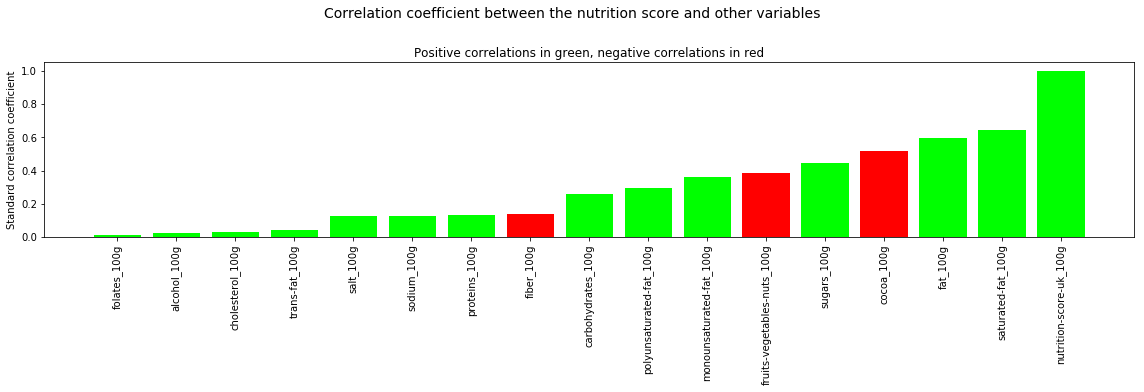

In [205]:
plt.figure(figsize=(16,5))
plt.bar(x=corr_matrix.index, height=abs(corr_matrix['nutrition-score-uk_100g']), color=corr_matrix['neg_pos_corr'])
plt.xticks(rotation = 90)
plt.ylabel('Standard correlation coefficient')
plt.suptitle('Correlation coefficient between the nutrition score and other variables', y=1.08, fontsize=14)
plt.title('Positive correlations in green, negative correlations in red')
plt.tight_layout()
plt.show();

**--> High positive correlations in this case mean high nutrition scores: like with the letter scale, a higher score = food with worse nutritional value.**

- Variables correlated with a high score:
 
 - fat in general, saturated fat in particular (unsaturated fats don't correlate as much with a high nutrition score)
 
 - sugars, of course :-) (as we've seen in Task B).

- Variables correlated with a low (good) nutritional score:

 - cocoa (? this is surprising... is it an artifact? we only have n=1376 for the cocoa feature
 
 - fruits, vegetables and nuts
 

# CONCLUDING REMARKS
I guess there is so much more than one could have done:-)
Apart from using the skills learned in this course, one of the things that I particularly enjoyed, was being truly put in situations where I could experience first hand what it's like to make decisions (especially in the wrangling and cleaning part) and inevitably... introduce some sort of bias (my pet passion in the world of data). 
I'd read or heard once that data wrangling was at least 80% of a data scientist's job, and I'm starting to see why :-)